In [1]:
from scipy.integrate import *
import pandas as pd
from numpy import *
from pylab import *
from scipy import *
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt

import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [2]:
#import data from Lake Erie from bouys between 2012 to 2018
#HABs occur in Western Basin
df = pd.read_csv('lake_erie_habs_field_sampling_results_2012_2018_v2.csv', encoding = 'latin1')

#change date to year first for sorting purposes
df['Date'] = pd.to_datetime(df['Date'])

In [3]:
df.head()

Date Site  Station Depth (m)  Sample Depth (m)  \
0 2012-05-15  WE2                5.1              0.75   
1 2012-05-15  WE4               10.0              0.75   
2 2012-05-15  WE6                2.7              0.75   
3 2012-05-15  WE8                4.5              0.75   
4 2012-05-31  WE2                8.2              0.75   

  Sample Depth (category) Local Time (Eastern Time Zone)  \
0                 Surface                          10:40   
1                 Surface                          10:08   
2                 Surface                          11:02   
3                 Surface                          11:31   
4                 Surface                          11:15   

   Latitude (decimal deg)  Longitude (decimal deg) Wind speed (knots)  \
0                 41.0127                 -83.0055                NaN   
1                 41.8267                 -83.1933                NaN   
2                 41.7052                 -83.3853                NaN   
3                 41.8339                 -83.3640                NaN   
4                 41.7625                 -83.3286                NaN   

   Wave Height (ft)  ... Soluble Reactive Phosphorus (µg P/L)  \
0               NaN  ...                                 3.23   
1               NaN  ...                                 2.02   
2               NaN  ...                                 2.97   
3               NaN  ...                                 3.02   
4               NaN  ...                                 5.15   

  Ammonia (µg N/L)  Nitrate + Nitrite (mg N/L)  Urea (µg N/L)  \
0            10.22                       0.459            NaN   
1            28.79                       0.325            NaN   
2             35.7                       0.515            NaN   
3            11.28                       0.513            NaN   
4            14.68                       0.466            NaN   

   Particulate Organic Carbon (mg/L) Particulate Organic Nitrogen (mg/L)  \
0                                NaN                                 NaN   
1                               0.34                                0.05   
2                               0.40                                0.08   
3                               0.49                                0.12   
4                               0.50                                0.07   

  Dissolved Organic Carbon (mg/L)  \
0                            2.88   
1                            1.80   
2                            4.35   
3                            2.53   
4                            2.80   

  Colored Dissolved Organic Material absorbance (m-1) at 400nm   \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

   Total Suspended Solids (mg/L)  Volatile Suspended Solids (mg/L)  
0                           3.47                              1.11  
1                           3.15                              1.01  
2                           2.90                              0.98  
3                           4.32                              1.06  
4                          21.42                              2.40  

[5 rows x 36 columns]

In [33]:
# Drop all unneeded columns and drop rows where relevant columns are missing information (NaN)
relevant_df = df.copy()
relevant_df.drop(columns=['Local Time (Eastern Time Zone)','Wind speed (knots)',
                    'Wave Height (ft)','Sky','Secchi Depth (m)','CTD Specific Conductivity (µS/cm)',
                    'CTD Beam Attenuation (m-1)','CTD Tramission (%)','CTD Dissolved Oxygen (mg/L)',
                    'CTD Photosynthetically Active Radiation (µE/m2/s)','Turbidity (NTU)','Total Dissolved Phosphorus (µg P/L)',
                    'Soluble Reactive Phosphorus (µg P/L)','Urea (µg N/L)','Particulate Organic Carbon (mg/L)',
                    'Particulate Organic Nitrogen (mg/L)','Dissolved Organic Carbon (mg/L)',
                    'Colored Dissolved Organic Material absorbance (m-1) at 400nm ',
                    'Total Suspended Solids (mg/L)','Volatile Suspended Solids (mg/L)','Dissolved Microcystin (µg/L)',
                    'Particulate Microcystin (µg/L)','CTD Temperature (°C)'])
#list(relevant_df.columns)

Date  Site  Station Depth (m)  Sample Depth (m)  \
0    2012-05-15   WE2               5.10              0.75   
1    2012-05-15   WE4              10.00              0.75   
2    2012-05-15   WE6               2.70              0.75   
3    2012-05-15   WE8               4.50              0.75   
4    2012-05-31   WE2               8.20              0.75   
...         ...   ...                ...               ...   
1239 2018-10-01  WE13               9.07              0.75   
1240 2018-10-01  WE13                NaN              8.30   
1241 2018-10-01  WE16               6.30              0.75   
1242 2018-10-09   WE6                NaN              0.75   
1243 2018-10-09   WE9                NaN              0.75   

     Sample Depth (category)  Latitude (decimal deg)  Longitude (decimal deg)  \
0                    Surface                 41.0127                 -83.0055   
1                    Surface                 41.8267                 -83.1933   
2                    Surface                 41.7052                 -83.3853   
3                    Surface                 41.8339                 -83.3640   
4                    Surface                 41.7625                 -83.3286   
...                      ...                     ...                      ...   
1239                 Surface                 41.7444                 -83.1359   
1240                  Bottom                     NaN                      NaN   
1241                 Surface                 41.6592                 -83.1431   
1242                 Surface                 41.7047                 -83.3840   
1243                 Surface                 41.7170                 -83.4236   

      Sample Temperature (°C) Extracted Phycocyanin (µg/L)  \
0                        17.9                         0.28   
1                        16.3                         0.17   
2                        19.3                         0.45   
3                        19.0                         0.52   
4                        20.7                         0.61   
...                       ...                          ...   
1239                      NaN                         0.13   
1240                      NaN                         0.19   
1241                      NaN                         0.23   
1242                      NaN                         0.97   
1243                      NaN                         1.29   

      Extracted Chlorophyll a (µg/L)  Total Phosphorus (µg P/L)  \
0                               3.67                    16.2100   
1                               3.05                     8.2500   
2                               2.24                    22.5200   
3                               5.73                    23.1600   
4                               6.07                    42.0100   
...                              ...                        ...   
1239                            6.11                    23.8200   
1240                            5.86                        NaN   
1241                            7.65                    50.9145   
1242                           15.40                    98.7435   
1243                           14.56                   133.0200   

     Ammonia (µg N/L) Nitrate + Nitrite (mg N/L)  
0               10.22                      0.459  
1               28.79                      0.325  
2                35.7                      0.515  
3               11.28                      0.513  
4               14.68                      0.466  
...               ...                        ...  
1239             1.72                      0.269  
1240              NaN                        NaN  
1241            22.69                      0.105  
1242            78.41                      0.635  
1243           145.34                      0.979  

[1244 rows x 13 columns]

In [34]:
# Add year and day of year columns
relevant_df['Year'] = pd.DatetimeIndex(relevant_df['Date']).year
relevant_df['DayofYear'] = pd.DatetimeIndex(relevant_df['Date']).dayofyear



In [35]:
#sort data by site and date
site_date_sorted = relevant_df.sort_values(by =['Site', 'Date'])



In [36]:
site_date_sorted.head()


Date    Site  Station Depth (m)  Sample Depth (m)  \
208 2014-08-04   1-Aug                2.9              0.75   
209 2014-08-04   2-Aug                5.0              0.75   
900 2017-07-31  2017.1                NaN              0.00   
914 2017-08-07  2017.2                NaN              0.00   
992 2017-09-18  2017.3                NaN              0.00   

    Sample Depth (category) Local Time (Eastern Time Zone)  \
208                 Surface                          12:00   
209                 Surface                          13:25   
900                    Scum                          12:20   
914                    Scum                          13:42   
992                    Scum                          13:33   

     Latitude (decimal deg)  Longitude (decimal deg) Wind speed (knots)  \
208                 41.7152                 -83.3287                NaN   
209                 41.6760                 -83.2388                NaN   
900                 41.7100                 -83.2720                NaN   
914                 41.7706                 -83.3365                NaN   
992                 41.8151                 -83.3895                NaN   

     Wave Height (ft)  ... Nitrate + Nitrite (mg N/L) Urea (µg N/L)  \
208               NaN  ...                      0.579           NaN   
209               NaN  ...                      0.542           NaN   
900               NaN  ...                        NaN           NaN   
914               NaN  ...                        NaN           NaN   
992               NaN  ...                        NaN           NaN   

     Particulate Organic Carbon (mg/L)  Particulate Organic Nitrogen (mg/L)  \
208                               3.76                                 0.56   
209                               5.10                                 0.74   
900                                NaN                                  NaN   
914                                NaN                                  NaN   
992                                NaN                                  NaN   

     Dissolved Organic Carbon (mg/L)  \
208                             4.91   
209                             4.72   
900                              NaN   
914                              NaN   
992                              NaN   

    Colored Dissolved Organic Material absorbance (m-1) at 400nm   \
208                                                NaN              
209                                                NaN              
900                                                NaN              
914                                                NaN              
992                                                NaN              

    Total Suspended Solids (mg/L) Volatile Suspended Solids (mg/L)  Year  \
208                          22.1                             9.43  2014   
209                          18.5                            14.23  2014   
900                           NaN                              NaN  2017   
914                           NaN                              NaN  2017   
992                           NaN                              NaN  2017   

     DayofYear  
208        216  
209        216  
900        212  
914        219  
992        261  

[5 rows x 38 columns]

In [17]:
# drop SB2013.1 and SB2013.2 because of one data point
#site_date_sorted = site_date_sorted[site_date_sorted['Site'] != 'SB2013.1']
#site_date_sorted = site_date_sorted[site_date_sorted['Site'] != 'SB2013.2']

In [18]:
# drop years 2012, 2013, 2018 due to lack of data
#site_date_sorted = site_date_sorted[site_date_sorted['Year'] != 2012]
#site_date_sorted = site_date_sorted[site_date_sorted['Year'] != 2013]
#site_date_sorted = site_date_sorted[site_date_sorted['Year'] != 2018]

In [19]:
# drop site SB4 due to lack of data
#site_date_sorted = site_date_sorted[site_date_sorted['Site'] != 'SB4']

In [20]:
site_date_sorted.dtypes



Date                                                             datetime64[ns]
Site                                                                     object
Station Depth (m)                                                       float64
Sample Depth (m)                                                        float64
Sample Depth (category)                                                  object
Local Time (Eastern Time Zone)                                           object
Latitude (decimal deg)                                                  float64
Longitude (decimal deg)                                                 float64
Wind speed (knots)                                                       object
Wave Height (ft)                                                        float64
Sky                                                                      object
Secchi Depth (m)                                                         object
Sample Temperature (°C)                 

In [12]:
site_date_sorted.Site.unique()

array(['1-Aug', '2-Aug', 'WE 2012.1', 'WE 2012.2', 'WE 2012.4',
       'WE 2012.5', 'WE 2012.6', 'WE 2012.7', 'WE 2013.1', 'WE 2013.10',
       'WE 2013.11', 'WE 2013.12', 'WE 2013.14', 'WE 2013.15',
       'WE 2013.17', 'WE 2013.18', 'WE 2013.19', 'WE 2013.4', 'WE 2013.5',
       'WE 2013.6', 'WE 2013.7', 'WE 2013.8', 'WE 2013.9', 'WE12', 'WE13',
       'WE14', 'WE15', 'WE16', 'WE2', 'WE4', 'WE6', 'WE8', 'WE9'],
      dtype=object)

In [13]:
site_date_sorted.Year.unique()

array([2014, 2012, 2013, 2015, 2016, 2017, 2018])

In [14]:
site_date_sorted.head()

Date       Site  Station Depth (m)  Sample Depth (m)  \
208 2014-08-04      1-Aug                2.9              0.75   
209 2014-08-04      2-Aug                5.0              0.75   
27  2012-07-31  WE 2012.1                3.1              0.75   
28  2012-07-31  WE 2012.2                9.0              0.75   
34  2012-08-06  WE 2012.4                5.8              0.75   

     Latitude (decimal deg)  Longitude (decimal deg)  \
208                 41.7152                 -83.3287   
209                 41.6760                 -83.2388   
27                  41.6315                 -83.1521   
28                  41.7394                 -83.1144   
34                  41.8361                 -83.3373   

    Extracted Phycocyanin (mug/L)  Extracted Chlorophyll a (mug/L)  \
208                         34.93                            51.20   
209                         64.57                            69.44   
27                           1.94                             6.72   
28                           1.04                             8.38   
34                          76.26                            69.80   

     Total Phosphorus (mug P/L) Ammonia (mug N/L) Nitrate + Nitrite (mg N/L)  \
208                       60.24              2.58                       0.58   
209                       53.01              2.66                       0.54   
27                        20.94             <0.04                       0.39   
28                        30.41             <0.04                       0.41   
34                        60.64              0.23                       0.43   

     Year  DayofYear  
208  2014        216  
209  2014        216  
27   2012        213  
28   2012        213  
34   2012        219

In [15]:
site_date_sorted['Extracted Phycocyanin (mug/L)'] = site_date_sorted['Extracted Phycocyanin (mug/L)'].str.replace(r'<', '')
site_date_sorted['Extracted Phycocyanin (mug/L)'] = pd.to_numeric(site_date_sorted['Extracted Phycocyanin (mug/L)'])

In [16]:
float(site_date_sorted['Nitrate + Nitrite (mg N/L)'][0])
#type(site_date_sorted['Total Phosphorus (mug P/L)'][0])

0.46

In [17]:
site_date_sorted['Nitrate + Nitrite (mg N/L)'] = site_date_sorted['Nitrate + Nitrite (mg N/L)'].str.replace(r'<', '')

site_date_sorted = site_date_sorted.astype({'Nitrate + Nitrite (mg N/L)': 'float64'})

In [18]:
site_date_sorted['Ammonia (mug N/L)'] = site_date_sorted['Ammonia (mug N/L)'].str.replace(r'<', '')
site_date_sorted = site_date_sorted.astype({'Ammonia (mug N/L)': 'float64'})

In [19]:
site_date_sorted[0:20]

Date        Site  Station Depth (m)  Sample Depth (m)  \
208 2014-08-04       1-Aug                2.9              0.75   
209 2014-08-04       2-Aug                5.0              0.75   
27  2012-07-31   WE 2012.1                3.1              0.75   
28  2012-07-31   WE 2012.2                9.0              0.75   
34  2012-08-06   WE 2012.4                5.8              0.75   
43  2012-08-20   WE 2012.5                2.8              0.75   
52  2012-09-05   WE 2012.6                5.5              0.75   
53  2012-09-05   WE 2012.7                5.0              0.75   
90  2013-07-15   WE 2013.1                5.9              0.75   
127 2013-08-26  WE 2013.10                6.3              0.75   
132 2013-09-03  WE 2013.11                7.5              0.75   
133 2013-09-03  WE 2013.12                7.7              0.75   
138 2013-09-10  WE 2013.14                4.2              0.75   
143 2013-09-17  WE 2013.15                4.6              0.75   
153 2013-10-15  WE 2013.17                4.4              0.75   
154 2013-10-15  WE 2013.18                8.0              0.75   
155 2013-10-15  WE 2013.19                4.5              0.75   
105 2013-08-02   WE 2013.4                5.9              0.75   
110 2013-08-05   WE 2013.5                4.8              0.75   
111 2013-08-05   WE 2013.6                4.0              0.75   

     Latitude (decimal deg)  Longitude (decimal deg)  \
208                 41.7152                 -83.3287   
209                 41.6760                 -83.2388   
27                  41.6315                 -83.1521   
28                  41.7394                 -83.1144   
34                  41.8361                 -83.3373   
43                  41.7039                 -83.3860   
52                  41.4833                 -82.6983   
53                  41.5606                 -82.9072   
90                  41.8330                 -83.3220   
127                 41.8352                 -83.2909   
132                 41.9209                 -83.1980   
133                 41.8739                 -83.2000   
138                 41.7088                 -83.3034   
143                 41.7100                 -83.2914   
153                 41.6439                 -83.1294   
154                 41.7415                 -83.1514   
155                 41.7166                 -83.3072   
105                 41.8660                 -83.3003   
110                 41.7171                 -83.3041   
111                 41.9272                 -83.3097   

     Extracted Phycocyanin (mug/L)  Extracted Chlorophyll a (mug/L)  \
208                          34.93                            51.20   
209                          64.57                            69.44   
27                            1.94                             6.72   
28                            1.04                             8.38   
34                           76.26                            69.80   
43                          592.55                            95.98   
52                           32.87                            65.84   
53                            2.61                             5.21   
90                          192.52                           147.51   
127                          42.01                            54.34   
132                           0.09                             4.04   
133                           0.91                             4.06   
138                          70.10                           152.76   
143                          16.07                            79.25   
153                           1.53                            16.60   
154                          11.34                            41.05   
155                           1.12                            36.53   
105                          46.80                            31.79   
110                         105.42                            75.40   
111  

In [20]:
site_date_sorted.dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
dtype: object

In [21]:
# Sorting the data by uniques site and making a list of the unique sites
site_df = []
for i in range(len(site_date_sorted.Site.unique())):
    site_df.append(site_date_sorted.loc[site_date_sorted['Site'] == df.Site.unique()[i]])
    
#print(site_df)

In [22]:
# Plotting the locations of the sample sites (buoy locations) using longitude and latitude from the data
#site_date_sorted.plot(kind="scatter", x='Longitude (decimal deg)', y='Latitude (decimal deg)')
fig = px.density_mapbox(site_date_sorted, lat='Latitude (decimal deg)', lon='Longitude (decimal deg)', radius=10,
                        center=dict(lat=41.55, lon=-83.25), zoom=8,
                        mapbox_style="stamen-terrain")
fig.show()

NameError: name 'px' is not defined

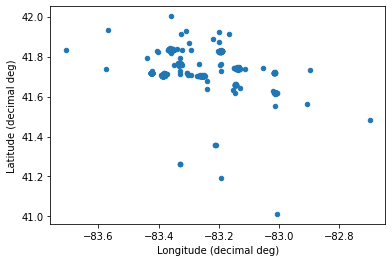

In [23]:
site_date_sorted.plot(kind="scatter", x='Longitude (decimal deg)', y='Latitude (decimal deg)')

In [24]:
# for each site, get data of just that year
site_year_df = []
for i in range(len(site_date_sorted.Site.unique())):
    year_df = []
    for j in range(len(site_date_sorted.Year.unique())):
        year_df.append(site_date_sorted.loc[(site_date_sorted['Site'] == site_date_sorted.Site.unique()[i]) & (site_date_sorted['Year'] == site_date_sorted.Year.unique()[j])])
    site_year_df.append(year_df)

In [25]:
#site_date_sorted.loc[site_date_sorted.Site == 'WE16', :]

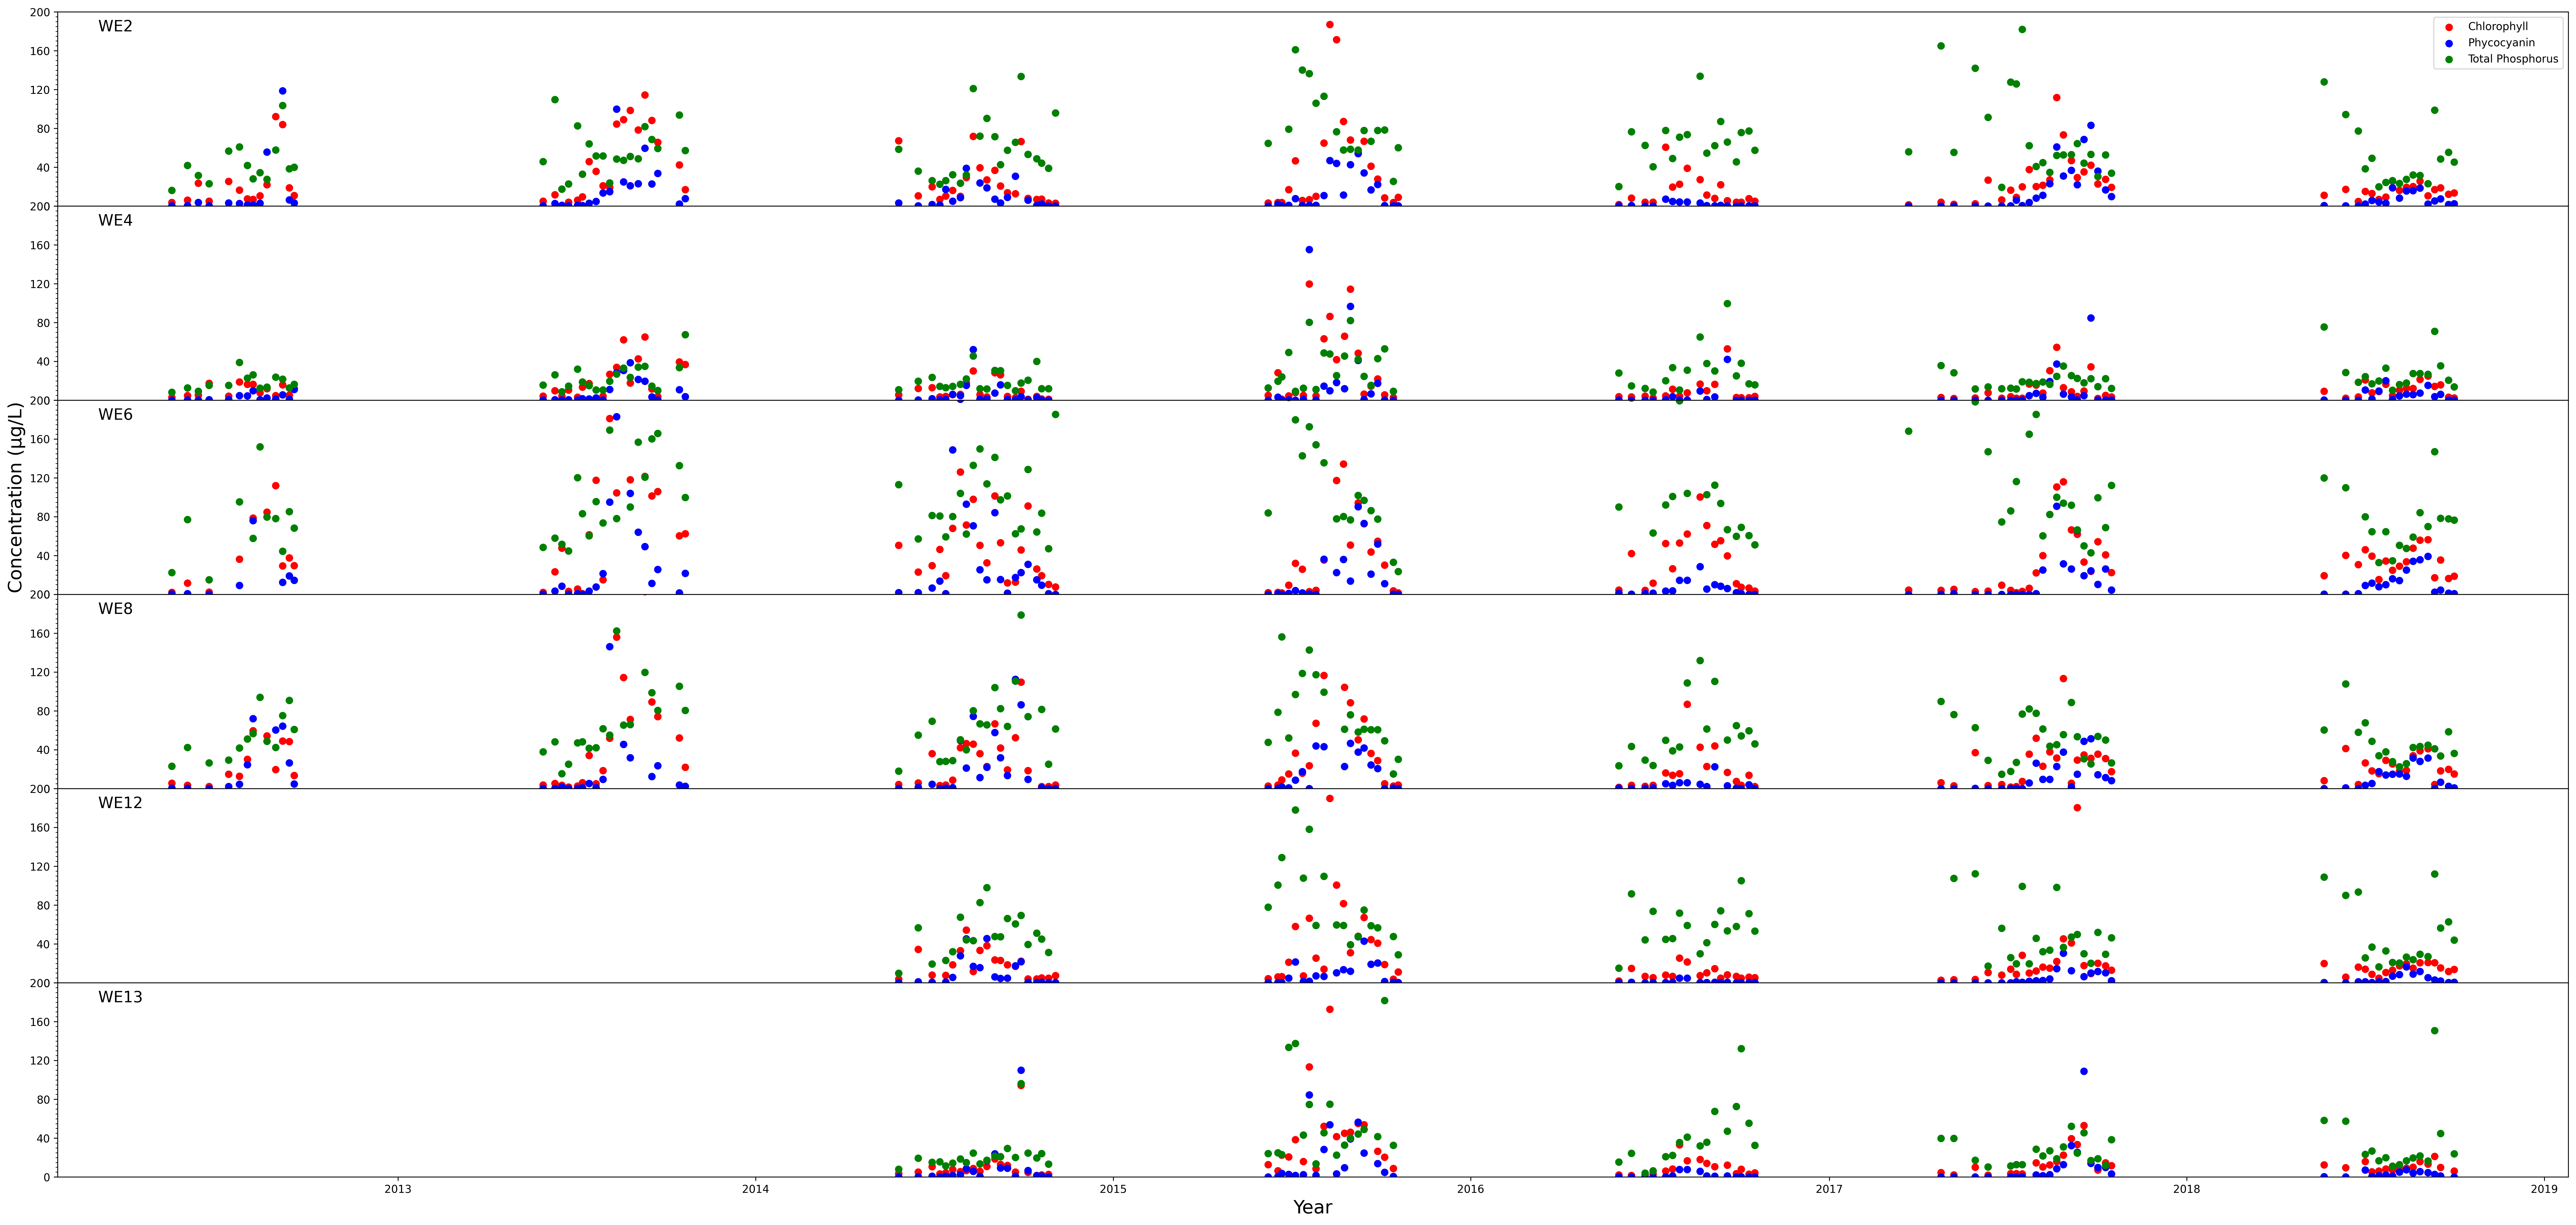

In [26]:
# Plot on the chlorophyll, phycocyanin, and total phosphorus concentrations at each site and for each year together.
# This will help look for an obvious correlations or patterns that might be present.
fig, axs = plt.subplots(6, sharex=True, sharey=True, gridspec_kw={'hspace': 0}, figsize=(42, 20), dpi=300)

#print(site_df[3])
axs[0].scatter(site_df[0]['Date'], site_df[0]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[0].scatter(site_df[0]['Date'], site_df[0]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[0].scatter(site_df[0]['Date'], site_df[0]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE2'
axs[0].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[0].set_ylim([0,200])
axs[0].yaxis.set_major_locator(MultipleLocator(40))
axs[0].yaxis.set_minor_locator(MultipleLocator(5))

axs[1].scatter(site_df[1]['Date'], site_df[1]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[1].scatter(site_df[1]['Date'], site_df[1]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[1].scatter(site_df[1]['Date'], site_df[1]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE4'
axs[1].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[1].set_ylim([0,200])
axs[1].yaxis.set_major_locator(MultipleLocator(40))
axs[1].yaxis.set_minor_locator(MultipleLocator(5))

axs[2].scatter(site_df[2]['Date'], site_df[2]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[2].scatter(site_df[2]['Date'], site_df[2]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[2].scatter(site_df[2]['Date'], site_df[2]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE6'
axs[2].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[2].set_ylim([0,200])
axs[2].yaxis.set_major_locator(MultipleLocator(40))
axs[2].yaxis.set_minor_locator(MultipleLocator(5))

axs[3].scatter(site_df[3]['Date'], site_df[3]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[3].scatter(site_df[3]['Date'], site_df[3]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[3].scatter(site_df[3]['Date'], site_df[3]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE8'
axs[3].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[3].set_ylim([0,200])
axs[3].yaxis.set_major_locator(MultipleLocator(40))
axs[3].yaxis.set_minor_locator(MultipleLocator(5))

axs[4].scatter(site_df[29]['Date'], site_df[29]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[4].scatter(site_df[29]['Date'], site_df[29]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[4].scatter(site_df[29]['Date'], site_df[29]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE12'
axs[4].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[4].set_ylim([0,200])
axs[4].yaxis.set_major_locator(MultipleLocator(40))
axs[4].yaxis.set_minor_locator(MultipleLocator(5))

axs[5].scatter(site_df[30]['Date'], site_df[30]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[5].scatter(site_df[30]['Date'], site_df[30]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[5].scatter(site_df[30]['Date'], site_df[30]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE13'
axs[5].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[5].set_ylim([0,200])
axs[5].yaxis.set_major_locator(MultipleLocator(40))
axs[5].yaxis.set_minor_locator(MultipleLocator(5))

axs[5].set_xlabel('Year', fontsize='xx-large')
axs[2].set_ylabel('Concentration (µg/L)', fontsize='xx-large')
axs[0].legend(['Chlorophyll','Phycocyanin','Total Phosphorus'], loc = 'best')
plt.show()
fig.savefig("concentrations", bbox_inches='tight', dpi=80)

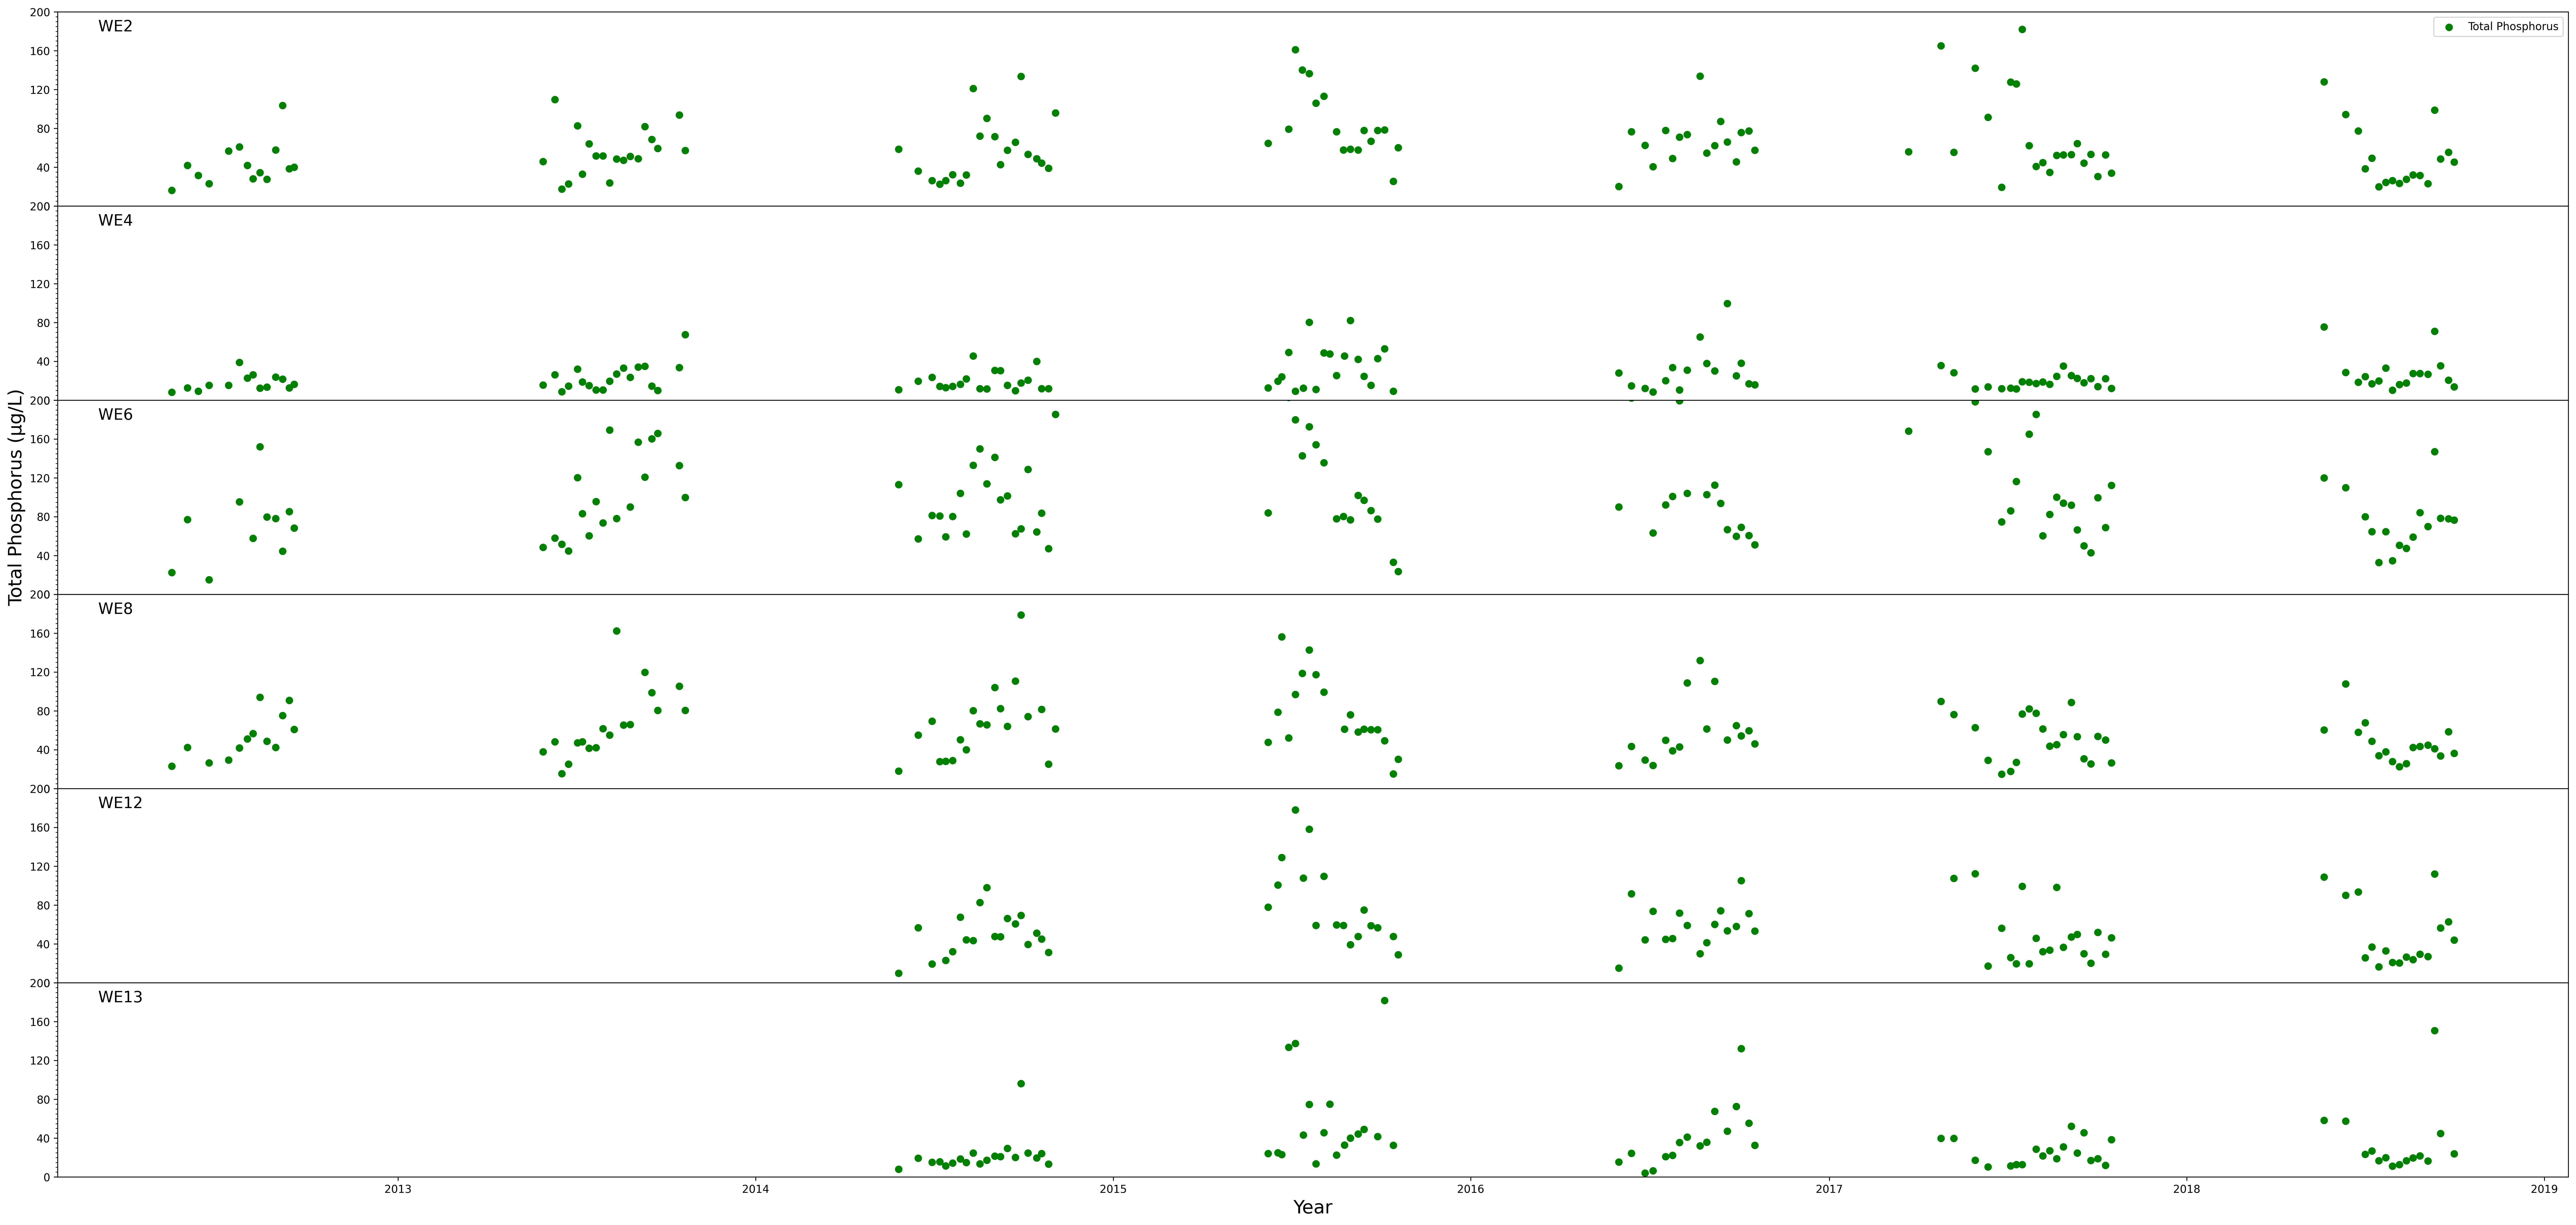

In [27]:
# Plotting the phosphorus levels per site location and individual year.
fig, axs = plt.subplots(6, sharex=True, sharey=True, gridspec_kw={'hspace': 0}, figsize=(42, 20), dpi=300)

axs[0].scatter(site_df[0]['Date'], site_df[0]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE2'
axs[0].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[0].set_ylim([0,200])
axs[0].yaxis.set_major_locator(MultipleLocator(40))
axs[0].yaxis.set_minor_locator(MultipleLocator(5))

axs[1].scatter(site_df[1]['Date'], site_df[1]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE4'
axs[1].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[1].set_ylim([0,200])
axs[1].yaxis.set_major_locator(MultipleLocator(40))
axs[1].yaxis.set_minor_locator(MultipleLocator(5))

axs[2].scatter(site_df[2]['Date'], site_df[2]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE6'
axs[2].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[2].set_ylim([0,200])
axs[2].yaxis.set_major_locator(MultipleLocator(40))
axs[2].yaxis.set_minor_locator(MultipleLocator(5))

axs[3].scatter(site_df[3]['Date'], site_df[3]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE8'
axs[3].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[3].set_ylim([0,200])
axs[3].yaxis.set_major_locator(MultipleLocator(40))
axs[3].yaxis.set_minor_locator(MultipleLocator(5))

axs[4].scatter(site_df[29]['Date'], site_df[29]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE12'
axs[4].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[4].set_ylim([0,200])
axs[4].yaxis.set_major_locator(MultipleLocator(40))
axs[4].yaxis.set_minor_locator(MultipleLocator(5))

axs[5].scatter(site_df[30]['Date'], site_df[30]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE13'
axs[5].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[5].set_ylim([0,200])
axs[5].yaxis.set_major_locator(MultipleLocator(40))
axs[5].yaxis.set_minor_locator(MultipleLocator(5))

axs[5].set_xlabel('Year', fontsize='xx-large')
axs[2].set_ylabel('Total Phosphorus (µg/L)', fontsize='xx-large')
axs[0].legend(['Total Phosphorus'], loc = 'best')
plt.show()
fig.savefig("total_phosphorus", bbox_inches='tight', dpi=80)

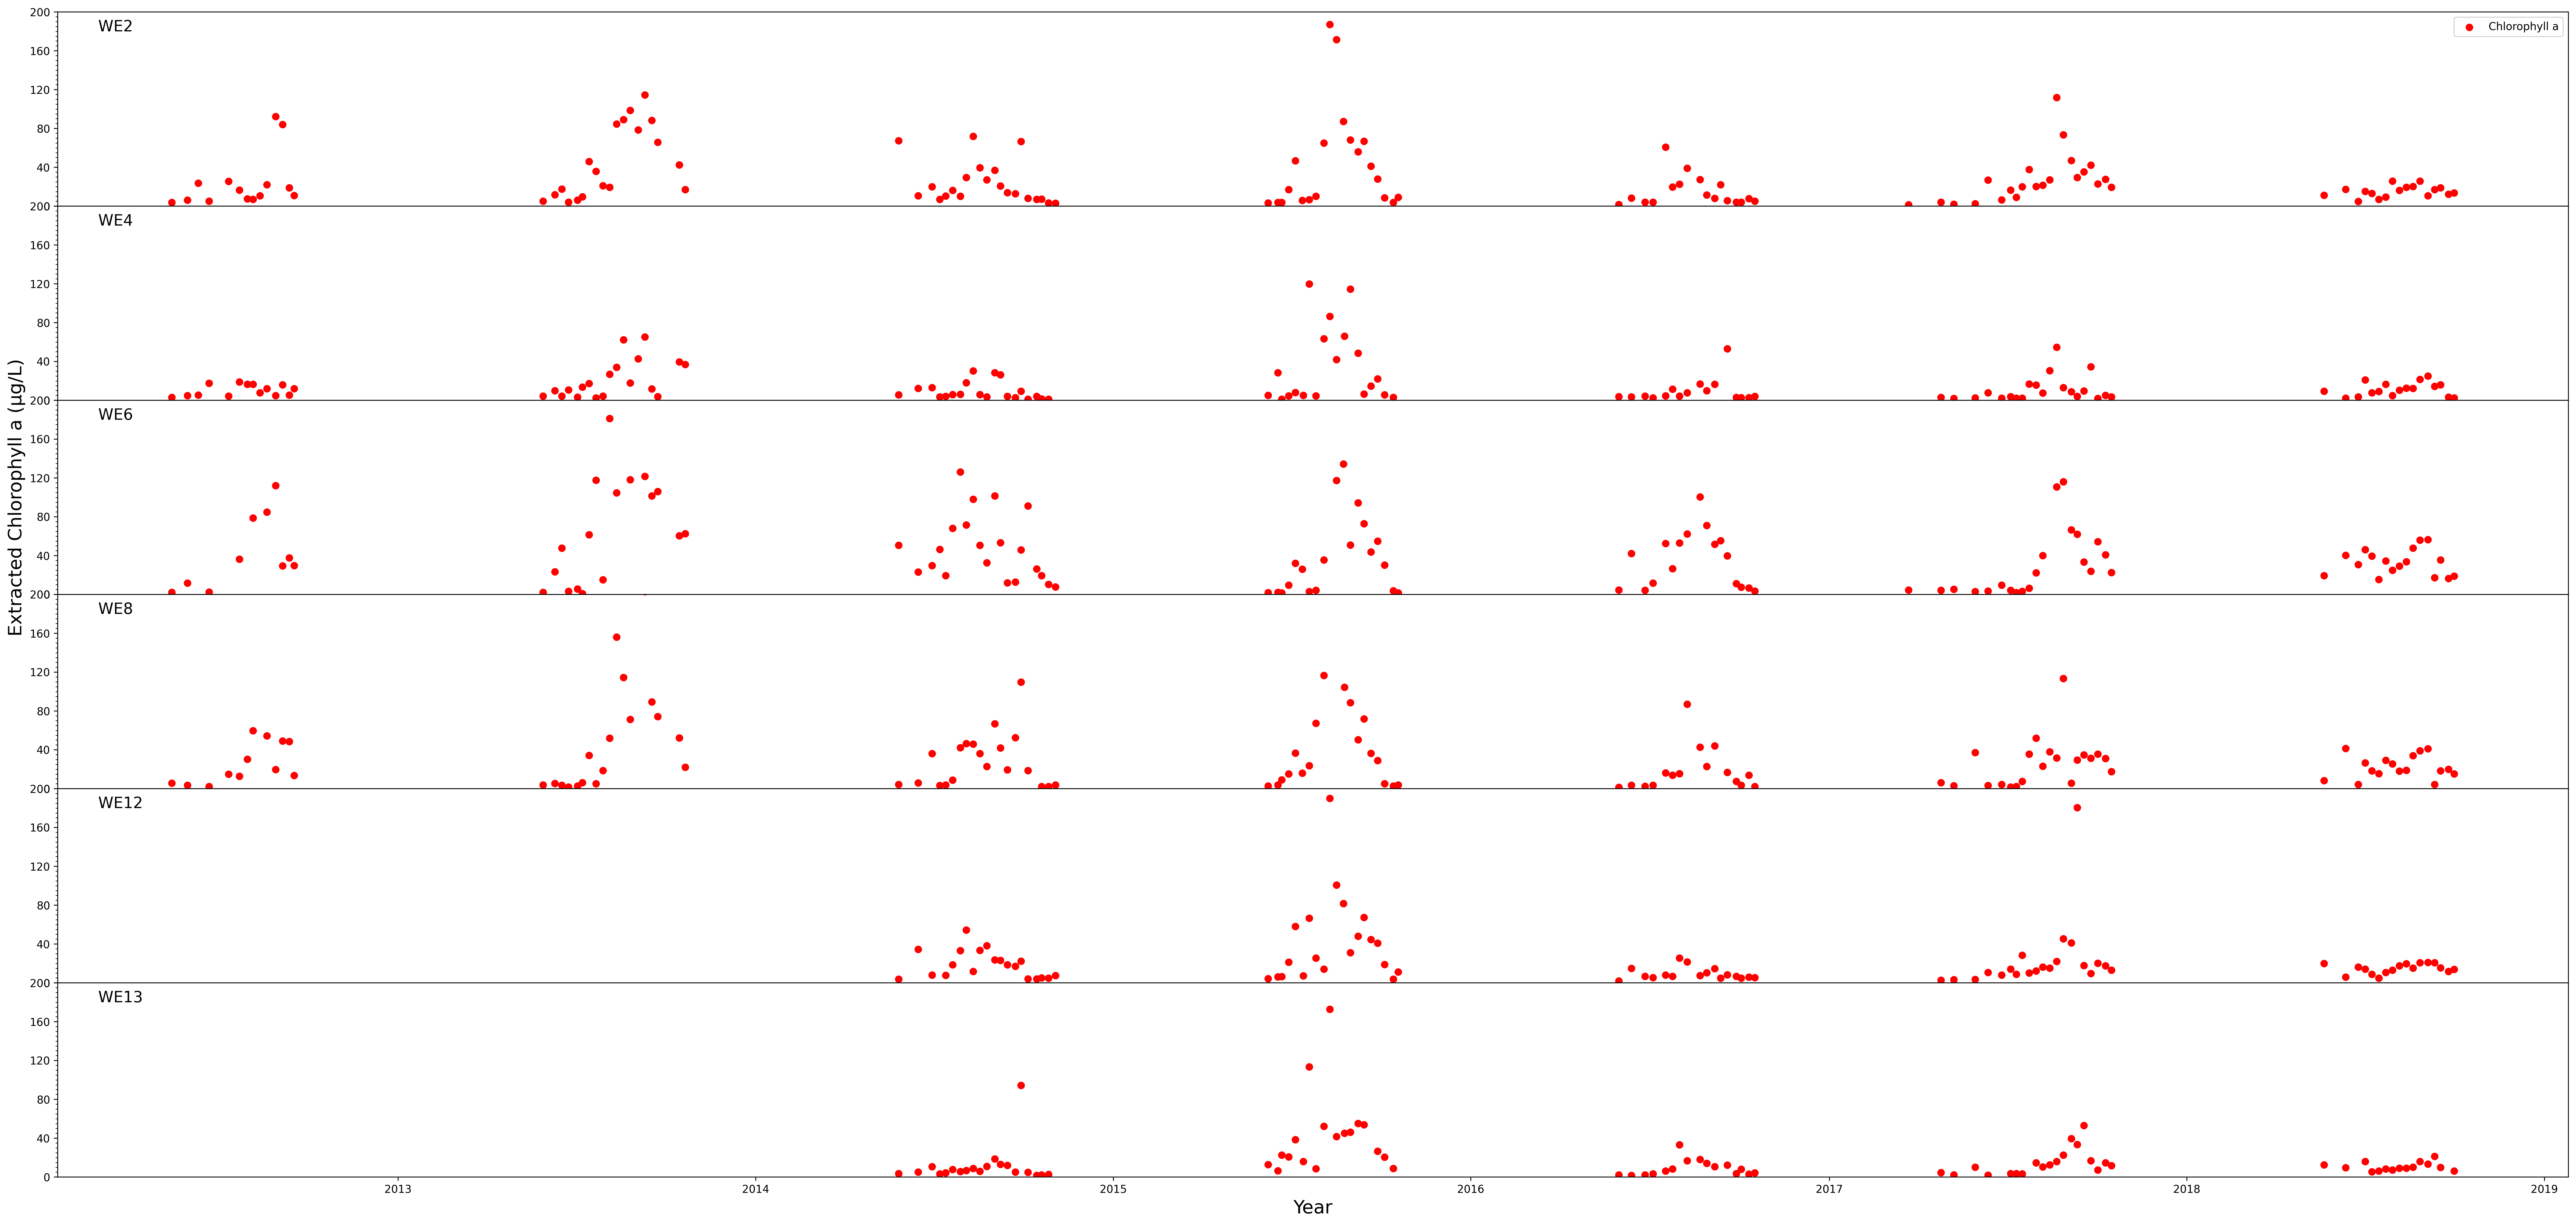

In [28]:
# Plotting the extracted chlorophyll concentrations per site location and individual year.
fig, axs = plt.subplots(6, sharex=True, sharey=True, gridspec_kw={'hspace': 0}, figsize=(42, 20), dpi=300)

axs[0].scatter(site_df[0]['Date'], site_df[0]['Extracted Chlorophyll a (mug/L)'], color = 'red')
site_name = 'WE2'
axs[0].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[0].set_ylim([0,200])
axs[0].yaxis.set_major_locator(MultipleLocator(40))
axs[0].yaxis.set_minor_locator(MultipleLocator(5))

axs[1].scatter(site_df[1]['Date'], site_df[1]['Extracted Chlorophyll a (mug/L)'], color = 'red')
site_name = 'WE4'
axs[1].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[1].set_ylim([0,200])
axs[1].yaxis.set_major_locator(MultipleLocator(40))
axs[1].yaxis.set_minor_locator(MultipleLocator(5))

axs[2].scatter(site_df[2]['Date'], site_df[2]['Extracted Chlorophyll a (mug/L)'], color = 'red')
site_name = 'WE6'
axs[2].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[2].set_ylim([0,200])
axs[2].yaxis.set_major_locator(MultipleLocator(40))
axs[2].yaxis.set_minor_locator(MultipleLocator(5))

axs[3].scatter(site_df[3]['Date'], site_df[3]['Extracted Chlorophyll a (mug/L)'], color = 'red')
site_name = 'WE8'
axs[3].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[3].set_ylim([0,200])
axs[3].yaxis.set_major_locator(MultipleLocator(40))
axs[3].yaxis.set_minor_locator(MultipleLocator(5))

axs[4].scatter(site_df[29]['Date'], site_df[29]['Extracted Chlorophyll a (mug/L)'], color = 'red')
site_name = 'WE12'
axs[4].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[4].set_ylim([0,200])
axs[4].yaxis.set_major_locator(MultipleLocator(40))
axs[4].yaxis.set_minor_locator(MultipleLocator(5))

axs[5].scatter(site_df[30]['Date'], site_df[30]['Extracted Chlorophyll a (mug/L)'], color = 'red')
site_name = 'WE13'
axs[5].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[5].set_ylim([0,200])
axs[5].yaxis.set_major_locator(MultipleLocator(40))
axs[5].yaxis.set_minor_locator(MultipleLocator(5))

axs[5].set_xlabel('Year', fontsize='xx-large')
axs[2].set_ylabel('Extracted Chlorophyll a (µg/L)', fontsize='xx-large')
axs[0].legend(['Chlorophyll a'], loc = 'best')
plt.show()
fig.savefig("extracted_chlorophyll", bbox_inches='tight', dpi=80)

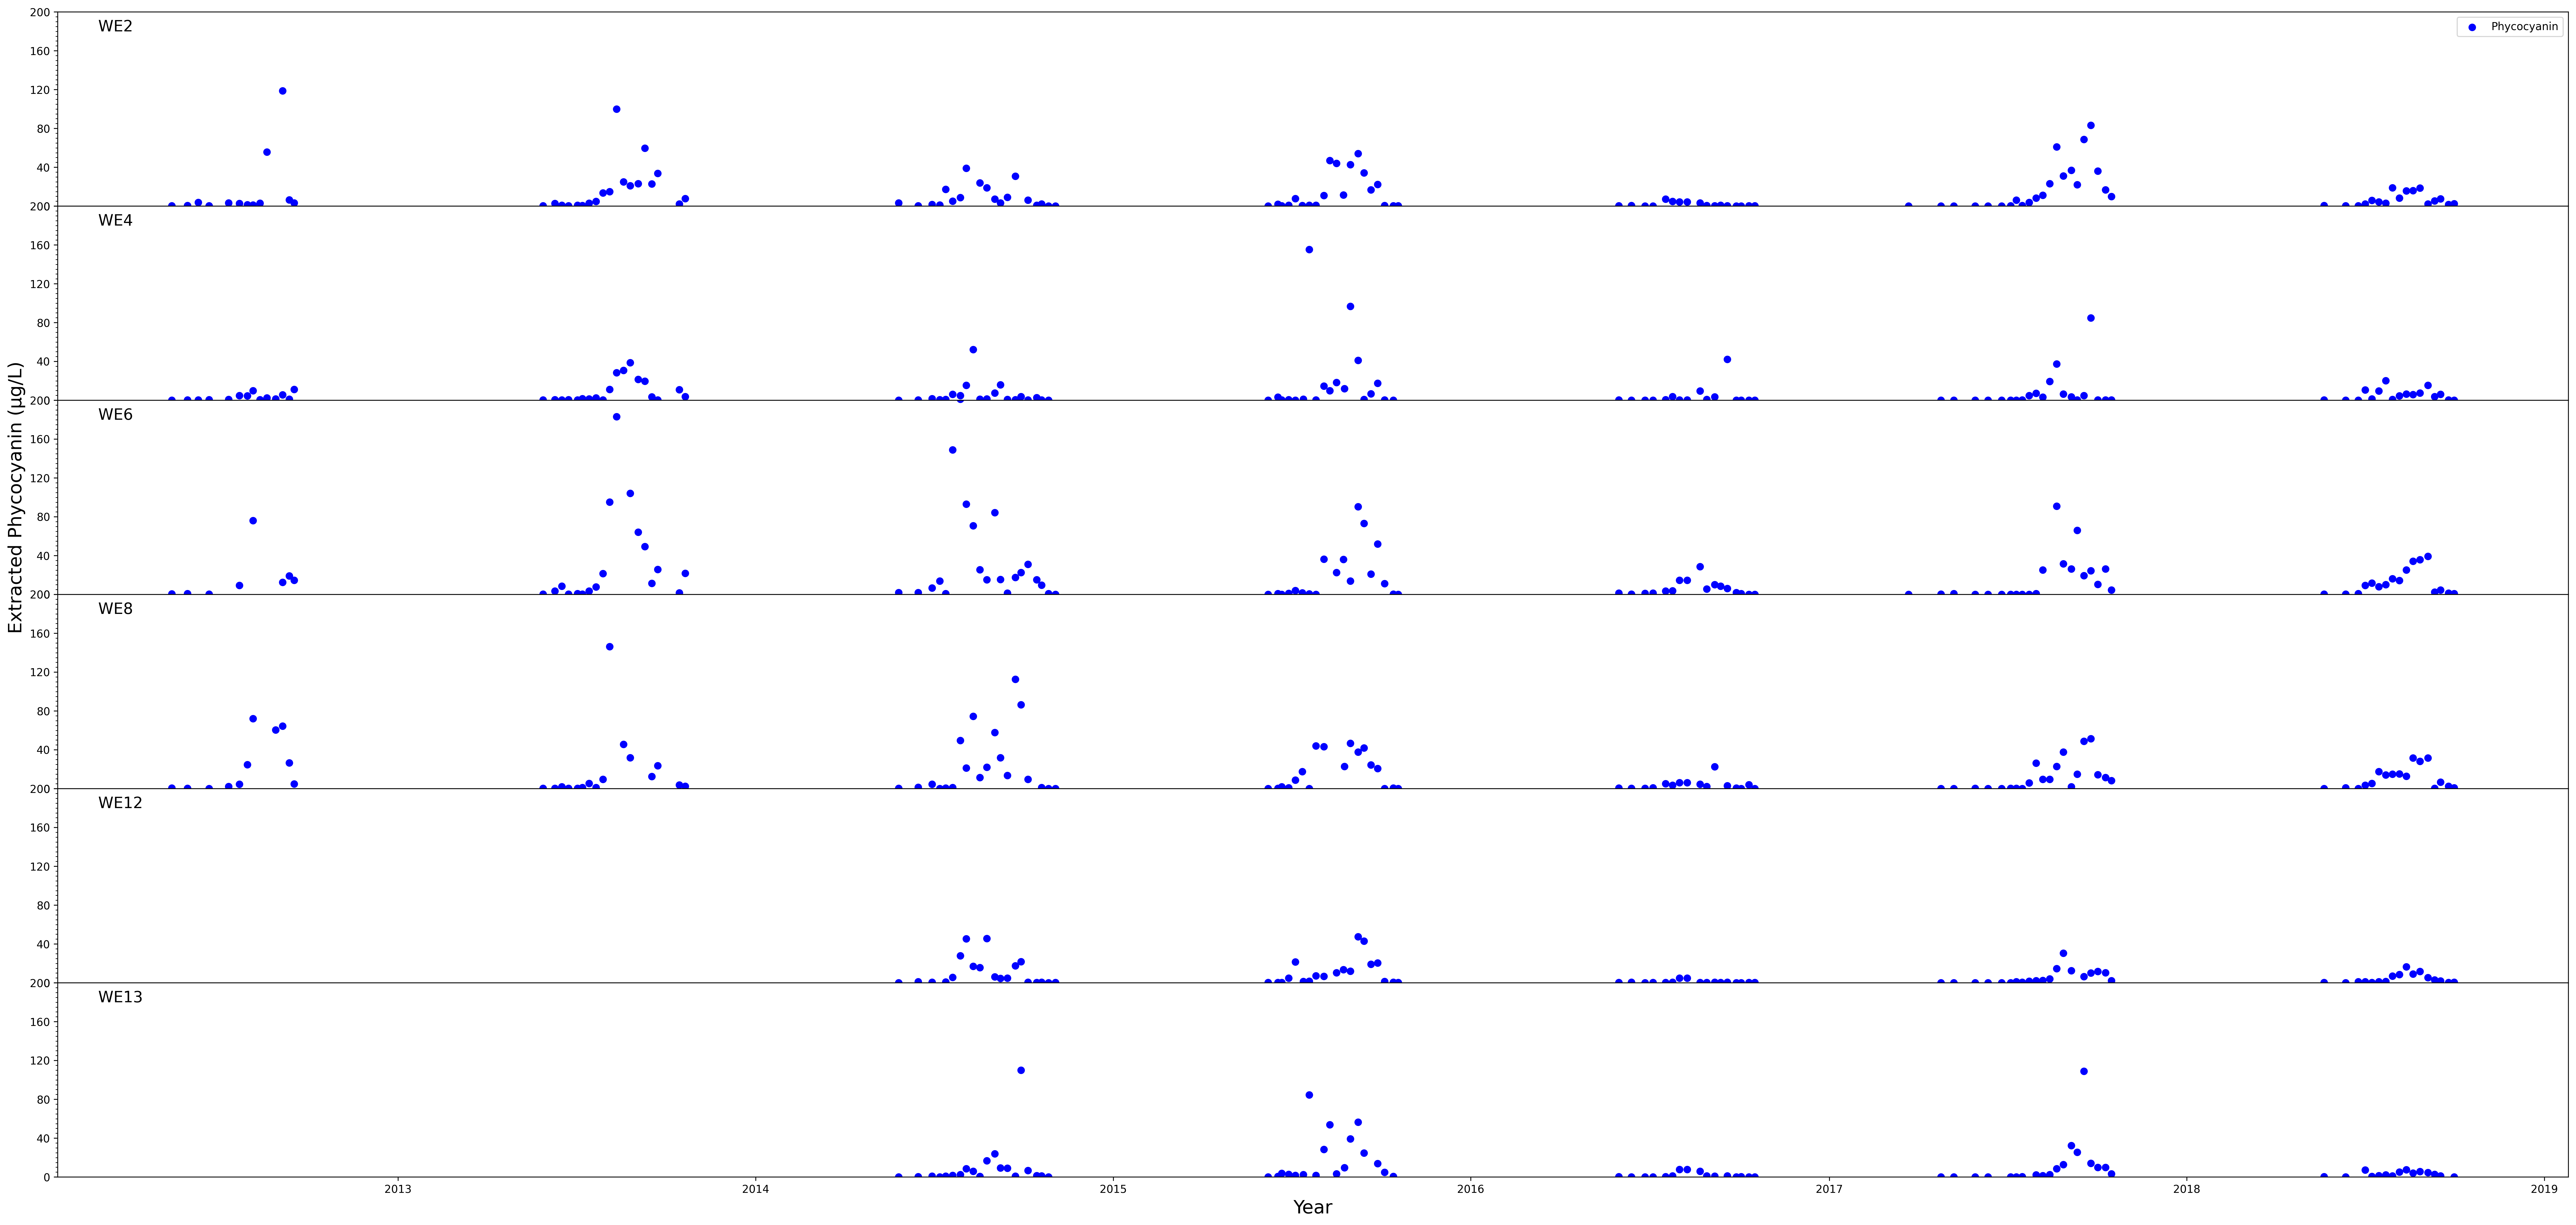

In [29]:
# Plotting the extracted phycocyanin concentrations per site location and individual year.
fig, axs = plt.subplots(6, sharex=True, sharey=True, gridspec_kw={'hspace': 0}, figsize=(42, 20), dpi=300)

axs[0].scatter(site_df[0]['Date'], site_df[0]['Extracted Phycocyanin (mug/L)'], color = 'blue')
site_name = 'WE2'
axs[0].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[0].set_ylim([0,200])
axs[0].yaxis.set_major_locator(MultipleLocator(40))
axs[0].yaxis.set_minor_locator(MultipleLocator(5))

axs[1].scatter(site_df[1]['Date'], site_df[1]['Extracted Phycocyanin (mug/L)'], color = 'blue')
site_name = 'WE4'
axs[1].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[1].set_ylim([0,200])
axs[1].yaxis.set_major_locator(MultipleLocator(40))
axs[1].yaxis.set_minor_locator(MultipleLocator(5))

axs[2].scatter(site_df[2]['Date'], site_df[2]['Extracted Phycocyanin (mug/L)'], color = 'blue')
site_name = 'WE6'
axs[2].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[2].set_ylim([0,200])
axs[2].yaxis.set_major_locator(MultipleLocator(40))
axs[2].yaxis.set_minor_locator(MultipleLocator(5))

axs[3].scatter(site_df[3]['Date'], site_df[3]['Extracted Phycocyanin (mug/L)'], color = 'blue')
site_name = 'WE8'
axs[3].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[3].set_ylim([0,200])
axs[3].yaxis.set_major_locator(MultipleLocator(40))
axs[3].yaxis.set_minor_locator(MultipleLocator(5))

axs[4].scatter(site_df[29]['Date'], site_df[29]['Extracted Phycocyanin (mug/L)'], color = 'blue')
site_name = 'WE12'
axs[4].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[4].set_ylim([0,200])
axs[4].yaxis.set_major_locator(MultipleLocator(40))
axs[4].yaxis.set_minor_locator(MultipleLocator(5))

axs[5].scatter(site_df[30]['Date'], site_df[30]['Extracted Phycocyanin (mug/L)'], color = 'blue')
site_name = 'WE13'
axs[5].text(pd.to_datetime('2012-03-01'), 180, site_name, fontsize='x-large')
axs[5].set_ylim([0,200])
axs[5].yaxis.set_major_locator(MultipleLocator(40))
axs[5].yaxis.set_minor_locator(MultipleLocator(5))

axs[5].set_xlabel('Year', fontsize='xx-large')
axs[2].set_ylabel('Extracted Phycocyanin (µg/L)', fontsize='xx-large')
axs[0].legend(['Phycocyanin'], loc = 'best')
plt.show()
fig.savefig("extracted_phycocyanin", bbox_inches='tight', dpi=80)

In [30]:
# Making a column in the data frame labeled depth because station depth is the depth of the buoy and
# the sample depth is how deep into the water column the sample collector on the buoy went. 
#Adding them together will allow for us to use an equation to determine the irradiance available for that sample.
site_date_sorted['Depth'] = site_date_sorted["Station Depth (m)"] + site_date_sorted["Sample Depth (m)"]

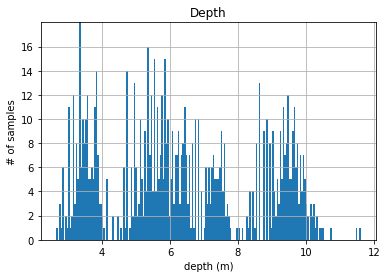

In [31]:
# Plotting the different depths to know range of different depths and the frequency of them.
site_date_sorted.hist(column=['Depth'], bins=200)
plt.ylabel('# of samples')
plt.xlabel('depth (m)')
plt.ylim([0,18])
plt.yticks(np.arange(0, 18, 2))
plt.savefig("depths", bbox_inches='tight', dpi=300)

In [32]:
site_date_sorted.head()


Date       Site  Station Depth (m)  Sample Depth (m)  \
208 2014-08-04      1-Aug                2.9              0.75   
209 2014-08-04      2-Aug                5.0              0.75   
27  2012-07-31  WE 2012.1                3.1              0.75   
28  2012-07-31  WE 2012.2                9.0              0.75   
34  2012-08-06  WE 2012.4                5.8              0.75   

     Latitude (decimal deg)  Longitude (decimal deg)  \
208                 41.7152                 -83.3287   
209                 41.6760                 -83.2388   
27                  41.6315                 -83.1521   
28                  41.7394                 -83.1144   
34                  41.8361                 -83.3373   

     Extracted Phycocyanin (mug/L)  Extracted Chlorophyll a (mug/L)  \
208                          34.93                            51.20   
209                          64.57                            69.44   
27                            1.94                             6.72   
28                            1.04                             8.38   
34                           76.26                            69.80   

     Total Phosphorus (mug P/L)  Ammonia (mug N/L)  \
208                       60.24               2.58   
209                       53.01               2.66   
27                        20.94               0.04   
28                        30.41               0.04   
34                        60.64               0.23   

     Nitrate + Nitrite (mg N/L)  Year  DayofYear  Depth  
208                        0.58  2014        216   3.65  
209                        0.54  2014        216   5.75  
27                         0.39  2012        213   3.85  
28                         0.41  2012        213   9.75  
34                         0.43  2012        219   6.55

In [33]:
# starting parameters for solving ode
t = np.linspace(0, 365, 366)

zetas = np.linspace(3, 12, 61) #depth array

k = 0.04 #attenuation constant of light into water


def get_initial_light(t):
    return (np.sin((t/365)*2*math.pi-math.pi/2)+1)/2 #light equation for 1 year

In [34]:
print(zetas)

[ 3.    3.15  3.3   3.45  3.6   3.75  3.9   4.05  4.2   4.35  4.5   4.65
  4.8   4.95  5.1   5.25  5.4   5.55  5.7   5.85  6.    6.15  6.3   6.45
  6.6   6.75  6.9   7.05  7.2   7.35  7.5   7.65  7.8   7.95  8.1   8.25
  8.4   8.55  8.7   8.85  9.    9.15  9.3   9.45  9.6   9.75  9.9  10.05
 10.2  10.35 10.5  10.65 10.8  10.95 11.1  11.25 11.4  11.55 11.7  11.85
 12.  ]


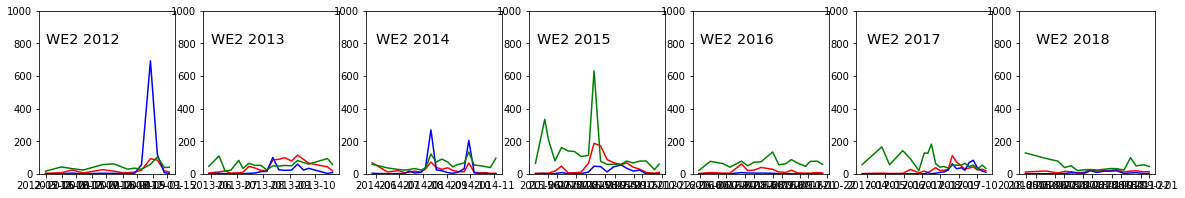

In [35]:
#do the above graph for each site and each year but automatically (use loop?) 

fig, axs = plt.subplots(1,7,figsize=(20,3))


axs[0].plot(site_df[0][site_df[0]['Year'] == 2012]['Date'], site_df[0][site_df[0]['Year'] == 2012]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[0].plot(site_df[0][site_df[0]['Year'] == 2012]['Date'], site_df[0][site_df[0]['Year'] == 2012]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[0].plot(site_df[0][site_df[0]['Year'] == 2012]['Date'], site_df[0][site_df[0]['Year'] == 2012]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE2 2012'
axs[0].text(pd.to_datetime('2012-05-15'), 800, site_name, fontsize='x-large')
axs[0].set_ylim([0,1000])

axs[1].plot(site_df[0][site_df[0]['Year'] == 2013]['Date'], site_df[0][site_df[0]['Year'] == 2013]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[1].plot(site_df[0][site_df[0]['Year'] == 2013]['Date'], site_df[0][site_df[0]['Year'] == 2013]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[1].plot(site_df[0][site_df[0]['Year'] == 2013]['Date'], site_df[0][site_df[0]['Year'] == 2013]['Total Phosphorus (mug P/L)'], color = 'green')
site_name1 = 'WE2 2013'
axs[1].text(pd.to_datetime('2013-06-01'), 800, site_name1, fontsize='x-large')
axs[1].set_ylim([0,1000])

axs[2].plot(site_df[0][site_df[0]['Year'] == 2014]['Date'], site_df[0][site_df[0]['Year'] == 2014]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[2].plot(site_df[0][site_df[0]['Year'] == 2014]['Date'], site_df[0][site_df[0]['Year'] == 2014]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[2].plot(site_df[0][site_df[0]['Year'] == 2014]['Date'], site_df[0][site_df[0]['Year'] == 2014]['Total Phosphorus (mug P/L)'], color = 'green')
site_name2 = 'WE2 2014'
axs[2].text(pd.to_datetime('2014-06-01'), 800, site_name2, fontsize='x-large')
axs[2].set_ylim([0,1000])

axs[3].plot(site_df[0][site_df[0]['Year'] == 2015]['Date'], site_df[0][site_df[0]['Year'] == 2015]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[3].plot(site_df[0][site_df[0]['Year'] == 2015]['Date'], site_df[0][site_df[0]['Year'] == 2015]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[3].plot(site_df[0][site_df[0]['Year'] == 2015]['Date'], site_df[0][site_df[0]['Year'] == 2015]['Total Phosphorus (mug P/L)'], color = 'green')
site_name3 = 'WE2 2015'
axs[3].text(pd.to_datetime('2015-06-10'), 800, site_name3, fontsize='x-large')
axs[3].set_ylim([0,1000])

axs[4].plot(site_df[0][site_df[0]['Year'] == 2016]['Date'], site_df[0][site_df[0]['Year'] == 2016]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[4].plot(site_df[0][site_df[0]['Year'] == 2016]['Date'], site_df[0][site_df[0]['Year'] == 2016]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[4].plot(site_df[0][site_df[0]['Year'] == 2016]['Date'], site_df[0][site_df[0]['Year'] == 2016]['Total Phosphorus (mug P/L)'], color = 'green')
site_name4 = 'WE2 2016'
axs[4].text(pd.to_datetime('2016-06-01'), 800, site_name4, fontsize='x-large')
axs[4].set_ylim([0,1000])

axs[5].plot(site_df[0][site_df[0]['Year'] == 2017]['Date'], site_df[0][site_df[0]['Year'] == 2017]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[5].plot(site_df[0][site_df[0]['Year'] == 2017]['Date'], site_df[0][site_df[0]['Year'] == 2017]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[5].plot(site_df[0][site_df[0]['Year'] == 2017]['Date'], site_df[0][site_df[0]['Year'] == 2017]['Total Phosphorus (mug P/L)'], color = 'green')
site_name5 = 'WE2 2017'
axs[5].text(pd.to_datetime('2017-04-01'), 800, site_name5, fontsize='x-large')
axs[5].set_ylim([0,1000])

axs[6].plot(site_df[0][site_df[0]['Year'] == 2018]['Date'], site_df[0][site_df[0]['Year'] == 2018]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[6].plot(site_df[0][site_df[0]['Year'] == 2018]['Date'], site_df[0][site_df[0]['Year'] == 2018]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[6].plot(site_df[0][site_df[0]['Year'] == 2018]['Date'], site_df[0][site_df[0]['Year'] == 2018]['Total Phosphorus (mug P/L)'], color = 'green')
site_name5 = 'WE2 2018'
axs[6].text(pd.to_datetime('2018-06-01'), 800, site_name5, fontsize='x-large')
axs[6].set_ylim([0,1000])

plt.show()

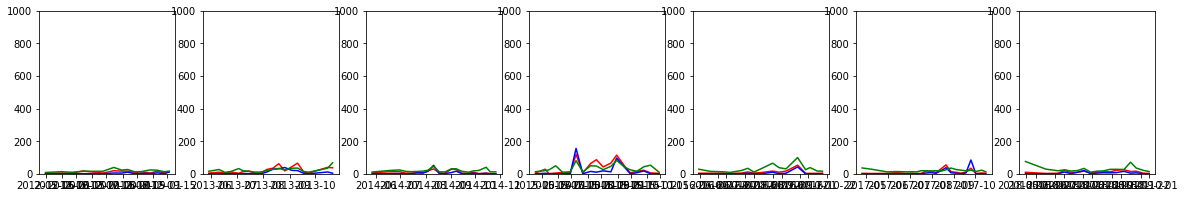

In [36]:
fig, axs = plt.subplots(1,7,figsize=(20,3))


axs[0].plot(site_df[1][site_df[1]['Year'] == 2012]['Date'], site_df[1][site_df[1]['Year'] == 2012]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[0].plot(site_df[1][site_df[1]['Year'] == 2012]['Date'], site_df[1][site_df[1]['Year'] == 2012]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[0].plot(site_df[1][site_df[1]['Year'] == 2012]['Date'], site_df[1][site_df[1]['Year'] == 2012]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE4 2012'
#axs[0].text(pd.to_datetime('2012-05-15'), 800, site_name, fontsize='x-large')
axs[0].set_ylim([0,1000])

axs[1].plot(site_df[1][site_df[1]['Year'] == 2013]['Date'], site_df[1][site_df[1]['Year'] == 2013]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[1].plot(site_df[1][site_df[1]['Year'] == 2013]['Date'], site_df[1][site_df[1]['Year'] == 2013]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[1].plot(site_df[1][site_df[1]['Year'] == 2013]['Date'], site_df[1][site_df[1]['Year'] == 2013]['Total Phosphorus (mug P/L)'], color = 'green')
site_name1 = 'WE4 2013'
#axs[1].text(pd.to_datetime('2013-06-01'), 800, site_name1, fontsize='x-large')
axs[1].set_ylim([0,1000])

axs[2].plot(site_df[1][site_df[1]['Year'] == 2014]['Date'], site_df[1][site_df[1]['Year'] == 2014]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[2].plot(site_df[1][site_df[1]['Year'] == 2014]['Date'], site_df[1][site_df[1]['Year'] == 2014]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[2].plot(site_df[1][site_df[1]['Year'] == 2014]['Date'], site_df[1][site_df[1]['Year'] == 2014]['Total Phosphorus (mug P/L)'], color = 'green')
site_name2 = 'WE4 2014'
#axs[2].text(pd.to_datetime('2014-06-01'), 800, site_name2, fontsize='x-large')
axs[2].set_ylim([0,1000])

axs[3].plot(site_df[1][site_df[1]['Year'] == 2015]['Date'], site_df[1][site_df[1]['Year'] == 2015]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[3].plot(site_df[1][site_df[1]['Year'] == 2015]['Date'], site_df[1][site_df[1]['Year'] == 2015]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[3].plot(site_df[1][site_df[1]['Year'] == 2015]['Date'], site_df[1][site_df[1]['Year'] == 2015]['Total Phosphorus (mug P/L)'], color = 'green')
site_name3 = 'WE4 2015'
#axs[3].text(pd.to_datetime('2015-06-10'), 800, site_name3, fontsize='x-large')
axs[3].set_ylim([0,1000])

axs[4].plot(site_df[1][site_df[1]['Year'] == 2016]['Date'], site_df[1][site_df[1]['Year'] == 2016]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[4].plot(site_df[1][site_df[1]['Year'] == 2016]['Date'], site_df[1][site_df[1]['Year'] == 2016]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[4].plot(site_df[1][site_df[1]['Year'] == 2016]['Date'], site_df[1][site_df[1]['Year'] == 2016]['Total Phosphorus (mug P/L)'], color = 'green')
site_name4 = 'WE4 2016'
#axs[4].text(pd.to_datetime('2016-06-01'), 800, site_name4, fontsize='x-large')
axs[4].set_ylim([0,1000])

axs[5].plot(site_df[1][site_df[1]['Year'] == 2017]['Date'], site_df[1][site_df[1]['Year'] == 2017]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[5].plot(site_df[1][site_df[1]['Year'] == 2017]['Date'], site_df[1][site_df[1]['Year'] == 2017]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[5].plot(site_df[1][site_df[1]['Year'] == 2017]['Date'], site_df[1][site_df[1]['Year'] == 2017]['Total Phosphorus (mug P/L)'], color = 'green')
site_name5 = 'WE4 2017'
#axs[5].text(pd.to_datetime('2017-06-01'), 800, site_name5, fontsize='x-large')
axs[5].set_ylim([0,1000])

axs[6].plot(site_df[1][site_df[1]['Year'] == 2018]['Date'], site_df[1][site_df[1]['Year'] == 2018]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[6].plot(site_df[1][site_df[1]['Year'] == 2018]['Date'], site_df[1][site_df[1]['Year'] == 2018]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[6].plot(site_df[1][site_df[1]['Year'] == 2018]['Date'], site_df[1][site_df[1]['Year'] == 2018]['Total Phosphorus (mug P/L)'], color = 'green')
site_name5 = 'WE4 2018'
#axs[6].text(pd.to_datetime('2018-06-01'), 800, site_name5, fontsize='x-large')
axs[6].set_ylim([0,1000])

plt.show()

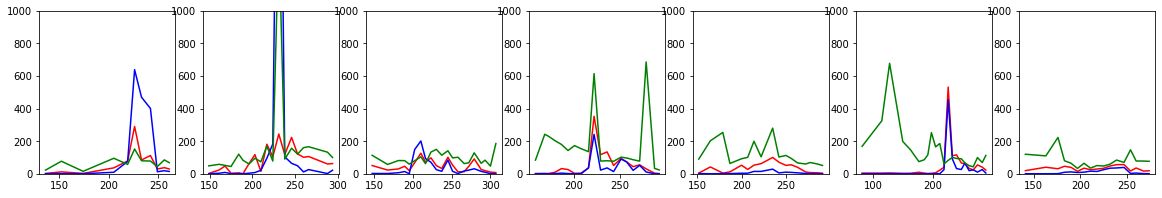

In [37]:
fig, axs = plt.subplots(1,7,figsize=(20,3))


axs[0].plot(site_df[2][site_df[2]['Year'] == 2012]['DayofYear'], site_df[2][site_df[2]['Year'] == 2012]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[0].plot(site_df[2][site_df[2]['Year'] == 2012]['DayofYear'], site_df[2][site_df[2]['Year'] == 2012]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[0].plot(site_df[2][site_df[2]['Year'] == 2012]['DayofYear'], site_df[2][site_df[2]['Year'] == 2012]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE6 2012'
#axs[0].text(pd.to_datetime('2012-05-15'), 800, site_name, fontsize='x-large')
axs[0].set_ylim([0,1000])

axs[1].plot(site_df[2][site_df[2]['Year'] == 2013]['DayofYear'], site_df[2][site_df[2]['Year'] == 2013]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[1].plot(site_df[2][site_df[2]['Year'] == 2013]['DayofYear'], site_df[2][site_df[2]['Year'] == 2013]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[1].plot(site_df[2][site_df[2]['Year'] == 2013]['DayofYear'], site_df[2][site_df[2]['Year'] == 2013]['Total Phosphorus (mug P/L)'], color = 'green')
site_name1 = 'WE6 2013'
#axs[1].text(pd.to_datetime('2013-06-01'), 800, site_name1, fontsize='x-large')
axs[1].set_ylim([0,1000])

axs[2].plot(site_df[2][site_df[2]['Year'] == 2014]['DayofYear'], site_df[2][site_df[2]['Year'] == 2014]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[2].plot(site_df[2][site_df[2]['Year'] == 2014]['DayofYear'], site_df[2][site_df[2]['Year'] == 2014]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[2].plot(site_df[2][site_df[2]['Year'] == 2014]['DayofYear'], site_df[2][site_df[2]['Year'] == 2014]['Total Phosphorus (mug P/L)'], color = 'green')
site_name2 = 'WE6 2014'
#axs[2].text(pd.to_datetime('2014-06-01'), 800, site_name2, fontsize='x-large')
axs[2].set_ylim([0,1000])

axs[3].plot(site_df[2][site_df[2]['Year'] == 2015]['DayofYear'], site_df[2][site_df[2]['Year'] == 2015]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[3].plot(site_df[2][site_df[2]['Year'] == 2015]['DayofYear'], site_df[2][site_df[2]['Year'] == 2015]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[3].plot(site_df[2][site_df[2]['Year'] == 2015]['DayofYear'], site_df[2][site_df[2]['Year'] == 2015]['Total Phosphorus (mug P/L)'], color = 'green')
site_name3 = 'WE6 2015'
#axs[3].text(pd.to_datetime('2015-06-10'), 800, site_name3, fontsize='x-large')
axs[3].set_ylim([0,1000])

axs[4].plot(site_df[2][site_df[2]['Year'] == 2016]['DayofYear'], site_df[2][site_df[2]['Year'] == 2016]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[4].plot(site_df[2][site_df[2]['Year'] == 2016]['DayofYear'], site_df[2][site_df[2]['Year'] == 2016]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[4].plot(site_df[2][site_df[2]['Year'] == 2016]['DayofYear'], site_df[2][site_df[2]['Year'] == 2016]['Total Phosphorus (mug P/L)'], color = 'green')
site_name4 = 'WE6 2016'
#axs[4].text(pd.to_datetime('2016-06-01'), 800, site_name4, fontsize='x-large')
axs[4].set_ylim([0,1000])

axs[5].plot(site_df[2][site_df[2]['Year'] == 2017]['DayofYear'], site_df[2][site_df[2]['Year'] == 2017]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[5].plot(site_df[2][site_df[2]['Year'] == 2017]['DayofYear'], site_df[2][site_df[2]['Year'] == 2017]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[5].plot(site_df[2][site_df[2]['Year'] == 2017]['DayofYear'], site_df[2][site_df[2]['Year'] == 2017]['Total Phosphorus (mug P/L)'], color = 'green')
site_name5 = 'WE6 2017'
#axs[5].text(pd.to_datetime('2017-06-01'), 800, site_name5, fontsize='x-large')
axs[5].set_ylim([0,1000])

axs[6].plot(site_df[2][site_df[2]['Year'] == 2018]['DayofYear'], site_df[2][site_df[2]['Year'] == 2018]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[6].plot(site_df[2][site_df[2]['Year'] == 2018]['DayofYear'], site_df[2][site_df[2]['Year'] == 2018]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[6].plot(site_df[2][site_df[2]['Year'] == 2018]['DayofYear'], site_df[2][site_df[2]['Year'] == 2018]['Total Phosphorus (mug P/L)'], color = 'green')
site_name5 = 'WE6 2018'
#axs[6].text(pd.to_datetime('2018-06-01'), 800, site_name5, fontsize='x-large')
axs[6].set_ylim([0,1000])

plt.show()

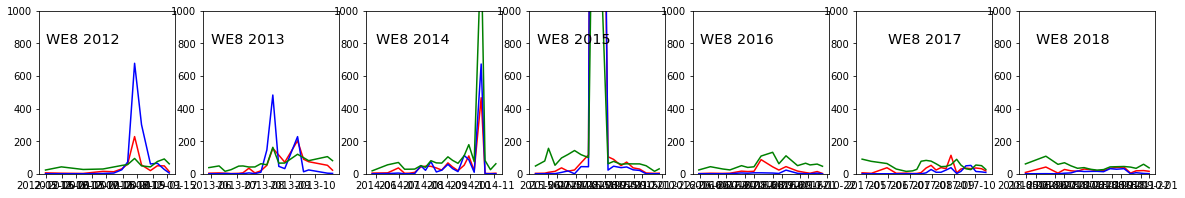

In [38]:
fig, axs = plt.subplots(1,7,figsize=(20,3))


axs[0].plot(site_df[3][site_df[3]['Year'] == 2012]['Date'], site_df[3][site_df[3]['Year'] == 2012]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[0].plot(site_df[3][site_df[3]['Year'] == 2012]['Date'], site_df[3][site_df[3]['Year'] == 2012]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[0].plot(site_df[3][site_df[3]['Year'] == 2012]['Date'], site_df[3][site_df[3]['Year'] == 2012]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE8 2012'
axs[0].text(pd.to_datetime('2012-05-15'), 800, site_name, fontsize='x-large')
axs[0].set_ylim([0,1000])

axs[1].plot(site_df[3][site_df[3]['Year'] == 2013]['Date'], site_df[3][site_df[3]['Year'] == 2013]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[1].plot(site_df[3][site_df[3]['Year'] == 2013]['Date'], site_df[3][site_df[3]['Year'] == 2013]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[1].plot(site_df[3][site_df[3]['Year'] == 2013]['Date'], site_df[3][site_df[3]['Year'] == 2013]['Total Phosphorus (mug P/L)'], color = 'green')
site_name1 = 'WE8 2013'
axs[1].text(pd.to_datetime('2013-06-01'), 800, site_name1, fontsize='x-large')
axs[1].set_ylim([0,1000])

axs[2].plot(site_df[3][site_df[3]['Year'] == 2014]['Date'], site_df[3][site_df[3]['Year'] == 2014]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[2].plot(site_df[3][site_df[3]['Year'] == 2014]['Date'], site_df[3][site_df[3]['Year'] == 2014]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[2].plot(site_df[3][site_df[3]['Year'] == 2014]['Date'], site_df[3][site_df[3]['Year'] == 2014]['Total Phosphorus (mug P/L)'], color = 'green')
site_name2 = 'WE8 2014'
axs[2].text(pd.to_datetime('2014-06-01'), 800, site_name2, fontsize='x-large')
axs[2].set_ylim([0,1000])

axs[3].plot(site_df[3][site_df[3]['Year'] == 2015]['Date'], site_df[3][site_df[3]['Year'] == 2015]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[3].plot(site_df[3][site_df[3]['Year'] == 2015]['Date'], site_df[3][site_df[3]['Year'] == 2015]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[3].plot(site_df[3][site_df[3]['Year'] == 2015]['Date'], site_df[3][site_df[3]['Year'] == 2015]['Total Phosphorus (mug P/L)'], color = 'green')
site_name3 = 'WE8 2015'
axs[3].text(pd.to_datetime('2015-06-10'), 800, site_name3, fontsize='x-large')
axs[3].set_ylim([0,1000])

axs[4].plot(site_df[3][site_df[3]['Year'] == 2016]['Date'], site_df[3][site_df[3]['Year'] == 2016]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[4].plot(site_df[3][site_df[3]['Year'] == 2016]['Date'], site_df[3][site_df[3]['Year'] == 2016]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[4].plot(site_df[3][site_df[3]['Year'] == 2016]['Date'], site_df[3][site_df[3]['Year'] == 2016]['Total Phosphorus (mug P/L)'], color = 'green')
site_name4 = 'WE8 2016'
axs[4].text(pd.to_datetime('2016-06-01'), 800, site_name4, fontsize='x-large')
axs[4].set_ylim([0,1000])

axs[5].plot(site_df[3][site_df[3]['Year'] == 2017]['Date'], site_df[3][site_df[3]['Year'] == 2017]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[5].plot(site_df[3][site_df[3]['Year'] == 2017]['Date'], site_df[3][site_df[3]['Year'] == 2017]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[5].plot(site_df[3][site_df[3]['Year'] == 2017]['Date'], site_df[3][site_df[3]['Year'] == 2017]['Total Phosphorus (mug P/L)'], color = 'green')
site_name5 = 'WE8 2017'
axs[5].text(pd.to_datetime('2017-06-01'), 800, site_name5, fontsize='x-large')
axs[5].set_ylim([0,1000])

axs[6].plot(site_df[3][site_df[3]['Year'] == 2018]['Date'], site_df[3][site_df[3]['Year'] == 2018]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[6].plot(site_df[3][site_df[3]['Year'] == 2018]['Date'], site_df[3][site_df[3]['Year'] == 2018]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[6].plot(site_df[3][site_df[3]['Year'] == 2018]['Date'], site_df[3][site_df[3]['Year'] == 2018]['Total Phosphorus (mug P/L)'], color = 'green')
site_name5 = 'WE8 2018'
axs[6].text(pd.to_datetime('2018-06-01'), 800, site_name5, fontsize='x-large')
axs[6].set_ylim([0,1000])

plt.show()

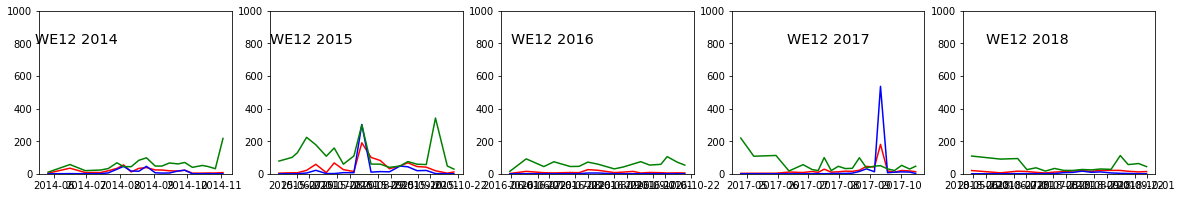

In [39]:
fig, axs = plt.subplots(1,5,figsize=(20,3))


axs[0].plot(site_df[29][site_df[29]['Year'] == 2014]['Date'], site_df[29][site_df[29]['Year'] == 2014]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[0].plot(site_df[29][site_df[29]['Year'] == 2014]['Date'], site_df[29][site_df[29]['Year'] == 2014]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[0].plot(site_df[29][site_df[29]['Year'] == 2014]['Date'], site_df[29][site_df[29]['Year'] == 2014]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE12 2014'
axs[0].text(pd.to_datetime('2014-05-15'), 800, site_name, fontsize='x-large')
axs[0].set_ylim([0,1000])

axs[1].plot(site_df[29][site_df[29]['Year'] == 2015]['Date'], site_df[29][site_df[29]['Year'] == 2015]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[1].plot(site_df[29][site_df[29]['Year'] == 2015]['Date'], site_df[29][site_df[29]['Year'] == 2015]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[1].plot(site_df[29][site_df[29]['Year'] == 2015]['Date'], site_df[29][site_df[29]['Year'] == 2015]['Total Phosphorus (mug P/L)'], color = 'green')
site_name1 = 'WE12 2015'
axs[1].text(pd.to_datetime('2015-06-01'), 800, site_name1, fontsize='x-large')
axs[1].set_ylim([0,1000])

axs[2].plot(site_df[29][site_df[29]['Year'] == 2016]['Date'], site_df[29][site_df[29]['Year'] == 2016]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[2].plot(site_df[29][site_df[29]['Year'] == 2016]['Date'], site_df[29][site_df[29]['Year'] == 2016]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[2].plot(site_df[29][site_df[29]['Year'] == 2016]['Date'], site_df[29][site_df[29]['Year'] == 2016]['Total Phosphorus (mug P/L)'], color = 'green')
site_name2 = 'WE12 2016'
axs[2].text(pd.to_datetime('2016-06-01'), 800, site_name2, fontsize='x-large')
axs[2].set_ylim([0,1000])

axs[3].plot(site_df[29][site_df[29]['Year'] == 2017]['Date'], site_df[29][site_df[29]['Year'] == 2017]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[3].plot(site_df[29][site_df[29]['Year'] == 2017]['Date'], site_df[29][site_df[29]['Year'] == 2017]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[3].plot(site_df[29][site_df[29]['Year'] == 2017]['Date'], site_df[29][site_df[29]['Year'] == 2017]['Total Phosphorus (mug P/L)'], color = 'green')
site_name3 = 'WE12 2017'
axs[3].text(pd.to_datetime('2017-06-10'), 800, site_name3, fontsize='x-large')
axs[3].set_ylim([0,1000])

axs[4].plot(site_df[29][site_df[29]['Year'] == 2018]['Date'], site_df[29][site_df[29]['Year'] == 2018]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[4].plot(site_df[29][site_df[29]['Year'] == 2018]['Date'], site_df[29][site_df[29]['Year'] == 2018]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[4].plot(site_df[29][site_df[29]['Year'] == 2018]['Date'], site_df[29][site_df[29]['Year'] == 2018]['Total Phosphorus (mug P/L)'], color = 'green')
site_name4 = 'WE12 2018'
axs[4].text(pd.to_datetime('2018-06-01'), 800, site_name4, fontsize='x-large')
axs[4].set_ylim([0,1000])

plt.show()

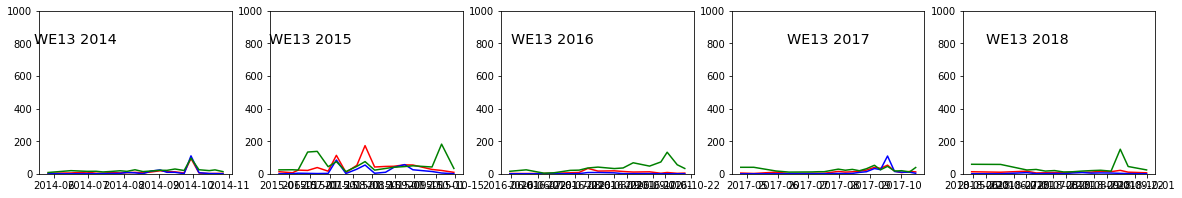

In [40]:
fig, axs = plt.subplots(1,5,figsize=(20,3))


axs[0].plot(site_df[30][site_df[30]['Year'] == 2014]['Date'], site_df[30][site_df[30]['Year'] == 2014]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[0].plot(site_df[30][site_df[30]['Year'] == 2014]['Date'], site_df[30][site_df[30]['Year'] == 2014]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[0].plot(site_df[30][site_df[30]['Year'] == 2014]['Date'], site_df[30][site_df[30]['Year'] == 2014]['Total Phosphorus (mug P/L)'], color = 'green')
site_name = 'WE13 2014'
axs[0].text(pd.to_datetime('2014-05-15'), 800, site_name, fontsize='x-large')
axs[0].set_ylim([0,1000])

axs[1].plot(site_df[30][site_df[30]['Year'] == 2015]['Date'], site_df[30][site_df[30]['Year'] == 2015]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[1].plot(site_df[30][site_df[30]['Year'] == 2015]['Date'], site_df[30][site_df[30]['Year'] == 2015]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[1].plot(site_df[30][site_df[30]['Year'] == 2015]['Date'], site_df[30][site_df[30]['Year'] == 2015]['Total Phosphorus (mug P/L)'], color = 'green')
site_name1 = 'WE13 2015'
axs[1].text(pd.to_datetime('2015-06-01'), 800, site_name1, fontsize='x-large')
axs[1].set_ylim([0,1000])

axs[2].plot(site_df[30][site_df[30]['Year'] == 2016]['Date'], site_df[30][site_df[30]['Year'] == 2016]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[2].plot(site_df[30][site_df[30]['Year'] == 2016]['Date'], site_df[30][site_df[30]['Year'] == 2016]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[2].plot(site_df[30][site_df[30]['Year'] == 2016]['Date'], site_df[30][site_df[30]['Year'] == 2016]['Total Phosphorus (mug P/L)'], color = 'green')
site_name2 = 'WE13 2016'
axs[2].text(pd.to_datetime('2016-06-01'), 800, site_name2, fontsize='x-large')
axs[2].set_ylim([0,1000])

axs[3].plot(site_df[30][site_df[30]['Year'] == 2017]['Date'], site_df[30][site_df[30]['Year'] == 2017]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[3].plot(site_df[30][site_df[30]['Year'] == 2017]['Date'], site_df[30][site_df[30]['Year'] == 2017]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[3].plot(site_df[30][site_df[30]['Year'] == 2017]['Date'], site_df[30][site_df[30]['Year'] == 2017]['Total Phosphorus (mug P/L)'], color = 'green')
site_name3 = 'WE13 2017'
axs[3].text(pd.to_datetime('2017-06-10'), 800, site_name3, fontsize='x-large')
axs[3].set_ylim([0,1000])

axs[4].plot(site_df[30][site_df[30]['Year'] == 2018]['Date'], site_df[30][site_df[30]['Year'] == 2018]['Extracted Chlorophyll a (mug/L)'], color = 'red')
axs[4].plot(site_df[30][site_df[30]['Year'] == 2018]['Date'], site_df[30][site_df[30]['Year'] == 2018]['Extracted Phycocyanin (mug/L)'], color = 'blue')
axs[4].plot(site_df[30][site_df[30]['Year'] == 2018]['Date'], site_df[30][site_df[30]['Year'] == 2018]['Total Phosphorus (mug P/L)'], color = 'green')
site_name4 = 'WE13 2018'
axs[4].text(pd.to_datetime('2018-06-01'), 800, site_name4, fontsize='x-large')
axs[4].set_ylim([0,1000])

plt.show()

In [41]:
# then we want the median chlorophyll concentration through year with the 25th and 75th percentile 
# then we want the median phycocyanin concentration through year with the 25th and 75th percentile 
# then we want the median phosphorus concentration through year with the 25th and 75th percentile 
# figure size will be 7 (rows), 3 figure in each row


#finally, y-axis = ratio chlorphyll:phycocyanin, x-axis = phosphorus concentration
site_date_sorted.DayofYear.unique()

array([216, 213, 219, 233, 249, 196, 238, 246, 253, 260, 288, 214, 217,
       231, 147, 167, 181, 195, 202, 210, 223, 230, 237, 245, 251, 258,
       266, 272, 279, 293, 300, 307, 159, 169, 173, 180, 187, 201, 208,
       222, 229, 236, 243, 257, 264, 271, 278, 287, 292, 152, 165, 179,
       200, 207, 235, 242, 250, 256, 263, 277, 285, 291, 115, 128, 150,
       163, 177, 186, 192, 198, 205, 212, 226, 240, 248, 254, 261, 268,
       275, 283, 289, 141, 176, 183, 190, 197, 204, 211, 218, 225, 232,
       239, 247, 274, 189, 265, 136, 174, 194, 149, 161, 168, 175, 184,
       203, 224, 294,  82])

In [42]:
site_date_sorted[site_date_sorted['Year']==2018]

Date  Site  Station Depth (m)  Sample Depth (m)  \
1051 2018-05-21  WE12               7.40              0.75   
1063 2018-06-12  WE12               7.02              0.75   
1075 2018-06-25  WE12               7.25              0.75   
1084 2018-07-02  WE12               6.77              0.75   
1096 2018-07-09  WE12               6.88              0.75   
...         ...   ...                ...               ...   
1191 2018-09-04   WE9               3.13              0.75   
1203 2018-09-11   WE9               2.74              0.75   
1215 2018-09-17   WE9               2.60              0.75   
1227 2018-09-25   WE9               2.51              0.75   
1236 2018-10-01   WE9               2.78              0.75   

      Latitude (decimal deg)  Longitude (decimal deg)  \
1051                 41.7040                 -83.2528   
1063                 41.7040                 -83.2528   
1075                 41.7040                 -83.2528   
1084                 41.7031                 -83.2544   
1096                 41.7040                 -83.2557   
...                      ...                      ...   
1191                 41.7178                 -83.4228   
1203                 41.7180                 -83.4227   
1215                 41.7169                 -83.4228   
1227                 41.7171                 -83.4243   
1236                 41.7176                 -83.4229   

      Extracted Phycocyanin (mug/L)  Extracted Chlorophyll a (mug/L)  \
1051                           0.24                            19.91   
1063                           0.15                             5.83   
1075                           1.05                            16.18   
1084                           1.22                            14.10   
1096                           0.41                             8.68   
...                             ...                              ...   
1191                          15.99                            45.33   
1203                           2.54                            23.40   
1215                           3.26                            29.12   
1227                           0.49                            16.00   
1236                           2.50                            17.61   

      Total Phosphorus (mug P/L)  Ammonia (mug N/L)  \
1051                    108.8500               7.66   
1063                     90.0900             136.66   
1075                     93.6600             117.13   
1084                     25.6100               4.25   
1096                     36.8200              29.46   
...                          ...                ...   
1191                     90.0600               6.01   
1203                    106.1800              54.08   
1215                    108.7400               9.62   
1227                    109.6275              72.80   
1236                     73.3790              51.48   

      Nitrate + Nitrite (mg N/L)  Year  DayofYear  Depth  
1051                        1.48  2018        141   8.15  
1063                        1.54  2018        163   7.77  
1075                        3.99  2018        176   8.00  
1084                        1.12  2018        183   7.52  
1096                        0.88  2018        190   7.63  
...                          ...   ...        ...    ...  
1191                        0.36  2018        247   3.88  
1203                        0.28  2018        254   3.49  
1215                        0.70  2018        260   3.35  
1227                        0.75  2018        268   3.26  
1236                        0.36  2018        274   3.53  

[132 rows x 14 columns]

In [43]:
df_2012 = site_date_sorted[site_date_sorted['Year']==2012]
df_2013 = site_date_sorted[site_date_sorted['Year']==2013]
df_2014 = site_date_sorted[site_date_sorted['Year']==2014]
df_2015 = site_date_sorted[site_date_sorted['Year']==2015]
df_2016 = site_date_sorted[site_date_sorted['Year']==2016]
df_2017 = site_date_sorted[site_date_sorted['Year']==2017]
df_2018 = site_date_sorted[site_date_sorted['Year']==2018]

In [44]:
site_date_sorted['Nitrate + Nitrite (mug N/L)']=(site_date_sorted['Nitrate + Nitrite (mg N/L)']*1000)
site_date_sorted['Nitrogen (mug/L)'] = site_date_sorted['Nitrate + Nitrite (mug N/L)'] + site_date_sorted['Ammonia (mug N/L)']

In [45]:
site_date_sorted['Month'] = df['Date'].dt.strftime('%m')
site_date_sorted = site_date_sorted.sort_values(by = 'Month')
site_date_sorted_month = site_date_sorted.Month.unique()
print(site_date_sorted_month)

['03' '04' '05' '06' '07' '08' '09' '10' '11']


In [46]:
site_date_sorted_tot_phos_med = []
site_date_sorted_tot_phos_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Total Phosphorus (mug P/L)'],50))
site_date_sorted_tot_phos_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Total Phosphorus (mug P/L)'],50))
site_date_sorted_tot_phos_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Total Phosphorus (mug P/L)'],50))
site_date_sorted_tot_phos_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Total Phosphorus (mug P/L)'],50))
site_date_sorted_tot_phos_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Total Phosphorus (mug P/L)'],50))
site_date_sorted_tot_phos_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Total Phosphorus (mug P/L)'],50))
site_date_sorted_tot_phos_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Total Phosphorus (mug P/L)'],50))
site_date_sorted_tot_phos_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Total Phosphorus (mug P/L)'],50))
site_date_sorted_tot_phos_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Total Phosphorus (mug P/L)'],50))

site_date_sorted_tot_phos_25 = []
site_date_sorted_tot_phos_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Total Phosphorus (mug P/L)'],25))
site_date_sorted_tot_phos_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Total Phosphorus (mug P/L)'],25))
site_date_sorted_tot_phos_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Total Phosphorus (mug P/L)'],25))
site_date_sorted_tot_phos_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Total Phosphorus (mug P/L)'],25))
site_date_sorted_tot_phos_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Total Phosphorus (mug P/L)'],25))
site_date_sorted_tot_phos_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Total Phosphorus (mug P/L)'],25))
site_date_sorted_tot_phos_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Total Phosphorus (mug P/L)'],25))
site_date_sorted_tot_phos_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Total Phosphorus (mug P/L)'],25))
site_date_sorted_tot_phos_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Total Phosphorus (mug P/L)'],25))

site_date_sorted_tot_phos_75 = []
site_date_sorted_tot_phos_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Total Phosphorus (mug P/L)'],75))
site_date_sorted_tot_phos_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Total Phosphorus (mug P/L)'],75))
site_date_sorted_tot_phos_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Total Phosphorus (mug P/L)'],75))
site_date_sorted_tot_phos_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Total Phosphorus (mug P/L)'],75))
site_date_sorted_tot_phos_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Total Phosphorus (mug P/L)'],75))
site_date_sorted_tot_phos_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Total Phosphorus (mug P/L)'],75))
site_date_sorted_tot_phos_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Total Phosphorus (mug P/L)'],75))
site_date_sorted_tot_phos_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Total Phosphorus (mug P/L)'],75))
site_date_sorted_tot_phos_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Total Phosphorus (mug P/L)'],75))


site_date_sorted_nitr_med = []
site_date_sorted_nitr_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Nitrogen (mug/L)'],50))
site_date_sorted_nitr_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Nitrogen (mug/L)'],50))
site_date_sorted_nitr_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Nitrogen (mug/L)'],50))
site_date_sorted_nitr_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Nitrogen (mug/L)'],50))
site_date_sorted_nitr_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Nitrogen (mug/L)'],50))
site_date_sorted_nitr_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Nitrogen (mug/L)'],50))
site_date_sorted_nitr_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Nitrogen (mug/L)'],50))
site_date_sorted_nitr_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Nitrogen (mug/L)'],50))
site_date_sorted_nitr_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Nitrogen (mug/L)'],50))

site_date_sorted_nitr_25 = []
site_date_sorted_nitr_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Nitrogen (mug/L)'],25))
site_date_sorted_nitr_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Nitrogen (mug/L)'],25))
site_date_sorted_nitr_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Nitrogen (mug/L)'],25))
site_date_sorted_nitr_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Nitrogen (mug/L)'],25))
site_date_sorted_nitr_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Nitrogen (mug/L)'],25))
site_date_sorted_nitr_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Nitrogen (mug/L)'],25))
site_date_sorted_nitr_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Nitrogen (mug/L)'],25))
site_date_sorted_nitr_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Nitrogen (mug/L)'],25))
site_date_sorted_nitr_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Nitrogen (mug/L)'],25))

site_date_sorted_nitr_75 = []
site_date_sorted_nitr_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Nitrogen (mug/L)'],75))
site_date_sorted_nitr_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Nitrogen (mug/L)'],75))
site_date_sorted_nitr_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Nitrogen (mug/L)'],75))
site_date_sorted_nitr_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Nitrogen (mug/L)'],75))
site_date_sorted_nitr_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Nitrogen (mug/L)'],75))
site_date_sorted_nitr_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Nitrogen (mug/L)'],75))
site_date_sorted_nitr_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Nitrogen (mug/L)'],75))
site_date_sorted_nitr_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Nitrogen (mug/L)'],75))
site_date_sorted_nitr_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Nitrogen (mug/L)'],75))

site_date_sorted_chlor_med = []
site_date_sorted_chlor_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Extracted Chlorophyll a (mug/L)'],50))
site_date_sorted_chlor_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Extracted Chlorophyll a (mug/L)'],50))
site_date_sorted_chlor_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Extracted Chlorophyll a (mug/L)'],50))
site_date_sorted_chlor_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Extracted Chlorophyll a (mug/L)'],50))
site_date_sorted_chlor_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Extracted Chlorophyll a (mug/L)'],50))
site_date_sorted_chlor_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Extracted Chlorophyll a (mug/L)'],50))
site_date_sorted_chlor_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Extracted Chlorophyll a (mug/L)'],50))
site_date_sorted_chlor_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Extracted Chlorophyll a (mug/L)'],50))
site_date_sorted_chlor_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Extracted Chlorophyll a (mug/L)'],50))

site_date_sorted_chlor_25 = []
site_date_sorted_chlor_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Extracted Chlorophyll a (mug/L)'],25))
site_date_sorted_chlor_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Extracted Chlorophyll a (mug/L)'],25))
site_date_sorted_chlor_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Extracted Chlorophyll a (mug/L)'],25))
site_date_sorted_chlor_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Extracted Chlorophyll a (mug/L)'],25))
site_date_sorted_chlor_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Extracted Chlorophyll a (mug/L)'],25))
site_date_sorted_chlor_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Extracted Chlorophyll a (mug/L)'],25))
site_date_sorted_chlor_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Extracted Chlorophyll a (mug/L)'],25))
site_date_sorted_chlor_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Extracted Chlorophyll a (mug/L)'],25))
site_date_sorted_chlor_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Extracted Chlorophyll a (mug/L)'],25))

site_date_sorted_chlor_75 = []
site_date_sorted_chlor_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Extracted Chlorophyll a (mug/L)'],75))
site_date_sorted_chlor_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Extracted Chlorophyll a (mug/L)'],75))
site_date_sorted_chlor_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Extracted Chlorophyll a (mug/L)'],75))
site_date_sorted_chlor_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Extracted Chlorophyll a (mug/L)'],75))
site_date_sorted_chlor_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Extracted Chlorophyll a (mug/L)'],75))
site_date_sorted_chlor_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Extracted Chlorophyll a (mug/L)'],75))
site_date_sorted_chlor_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Extracted Chlorophyll a (mug/L)'],75))
site_date_sorted_chlor_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Extracted Chlorophyll a (mug/L)'],75))
site_date_sorted_chlor_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Extracted Chlorophyll a (mug/L)'],75))

site_date_sorted_phyc_med = []
site_date_sorted_phyc_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Extracted Phycocyanin (mug/L)'],50))
site_date_sorted_phyc_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Extracted Phycocyanin (mug/L)'],50))
site_date_sorted_phyc_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Extracted Phycocyanin (mug/L)'],50))
site_date_sorted_phyc_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Extracted Phycocyanin (mug/L)'],50))
site_date_sorted_phyc_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Extracted Phycocyanin (mug/L)'],50))
site_date_sorted_phyc_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Extracted Phycocyanin (mug/L)'],50))
site_date_sorted_phyc_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Extracted Phycocyanin (mug/L)'],50))
site_date_sorted_phyc_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Extracted Phycocyanin (mug/L)'],50))
site_date_sorted_phyc_med.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Extracted Phycocyanin (mug/L)'],50))

site_date_sorted_phyc_25 = []
site_date_sorted_phyc_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Extracted Phycocyanin (mug/L)'],25))
site_date_sorted_phyc_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Extracted Phycocyanin (mug/L)'],25))
site_date_sorted_phyc_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Extracted Phycocyanin (mug/L)'],25))
site_date_sorted_phyc_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Extracted Phycocyanin (mug/L)'],25))
site_date_sorted_phyc_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Extracted Phycocyanin (mug/L)'],25))
site_date_sorted_phyc_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Extracted Phycocyanin (mug/L)'],25))
site_date_sorted_phyc_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Extracted Phycocyanin (mug/L)'],25))
site_date_sorted_phyc_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Extracted Phycocyanin (mug/L)'],25))
site_date_sorted_phyc_25.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Extracted Phycocyanin (mug/L)'],25))

site_date_sorted_phyc_75 = []
site_date_sorted_phyc_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '03']['Extracted Phycocyanin (mug/L)'],75))
site_date_sorted_phyc_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '04']['Extracted Phycocyanin (mug/L)'],75))
site_date_sorted_phyc_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '05']['Extracted Phycocyanin (mug/L)'],75))
site_date_sorted_phyc_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '06']['Extracted Phycocyanin (mug/L)'],75))
site_date_sorted_phyc_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '07']['Extracted Phycocyanin (mug/L)'],75))
site_date_sorted_phyc_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '08']['Extracted Phycocyanin (mug/L)'],75))
site_date_sorted_phyc_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '09']['Extracted Phycocyanin (mug/L)'],75))
site_date_sorted_phyc_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '10']['Extracted Phycocyanin (mug/L)'],75))
site_date_sorted_phyc_75.append(np.percentile(site_date_sorted[site_date_sorted['Month']== '11']['Extracted Phycocyanin (mug/L)'],75))




In [47]:
df_2012['Month'] = df['Date'].dt.strftime('%m')
df_2013['Month'] = df['Date'].dt.strftime('%m')
df_2014['Month'] = df['Date'].dt.strftime('%m')
df_2015['Month'] = df['Date'].dt.strftime('%m')
df_2016['Month'] = df['Date'].dt.strftime('%m')
df_2017['Month'] = df['Date'].dt.strftime('%m')
df_2018['Month'] = df['Date'].dt.strftime('%m')

<ipython-input-47-815de604f7c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['Month'] = df['Date'].dt.strftime('%m')
<ipython-input-47-815de604f7c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013['Month'] = df['Date'].dt.strftime('%m')
<ipython-input-47-815de604f7c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [48]:
df_2012.astype({'Nitrate + Nitrite (mg N/L)': 'float64'}).dtypes


Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [49]:
df_2013.astype({'Nitrate + Nitrite (mg N/L)': 'float64'}).dtypes


Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [50]:
df_2014.astype({'Nitrate + Nitrite (mg N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [51]:
df_2015.astype({'Nitrate + Nitrite (mg N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [52]:
df_2016.astype({'Nitrate + Nitrite (mg N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [53]:
df_2017.astype({'Nitrate + Nitrite (mg N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [54]:
df_2018.astype({'Nitrate + Nitrite (mg N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [55]:
df_2012.astype({'Ammonia (mug N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [56]:
df_2013.astype({'Ammonia (mug N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [57]:
df_2014.astype({'Ammonia (mug N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [58]:
df_2015.astype({'Ammonia (mug N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [59]:
df_2016.astype({'Ammonia (mug N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [60]:
df_2017.astype({'Ammonia (mug N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [61]:
df_2018.astype({'Ammonia (mug N/L)': 'float64'}).dtypes

Date                               datetime64[ns]
Site                                       object
Station Depth (m)                         float64
Sample Depth (m)                          float64
Latitude (decimal deg)                    float64
Longitude (decimal deg)                   float64
Extracted Phycocyanin (mug/L)             float64
Extracted Chlorophyll a (mug/L)           float64
Total Phosphorus (mug P/L)                float64
Ammonia (mug N/L)                         float64
Nitrate + Nitrite (mg N/L)                float64
Year                                        int64
DayofYear                                   int64
Depth                                     float64
Month                                      object
dtype: object

In [62]:
df_2012['Nitrate + Nitrite (mug N/L)']=(df_2012['Nitrate + Nitrite (mg N/L)']*1000)
df_2013['Nitrate + Nitrite (mug N/L)']=(df_2013['Nitrate + Nitrite (mg N/L)']*1000)
df_2014['Nitrate + Nitrite (mug N/L)']=(df_2014['Nitrate + Nitrite (mg N/L)']*1000)
df_2015['Nitrate + Nitrite (mug N/L)']=(df_2015['Nitrate + Nitrite (mg N/L)']*1000)
df_2016['Nitrate + Nitrite (mug N/L)']=(df_2016['Nitrate + Nitrite (mg N/L)']*1000)
df_2017['Nitrate + Nitrite (mug N/L)']=(df_2017['Nitrate + Nitrite (mg N/L)']*1000)
df_2018['Nitrate + Nitrite (mug N/L)']=(df_2018['Nitrate + Nitrite (mg N/L)']*1000)

<ipython-input-62-3017c87b4700>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['Nitrate + Nitrite (mug N/L)']=(df_2012['Nitrate + Nitrite (mg N/L)']*1000)
<ipython-input-62-3017c87b4700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013['Nitrate + Nitrite (mug N/L)']=(df_2013['Nitrate + Nitrite (mg N/L)']*1000)
<ipython-input-62-3017c87b4700>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [63]:
df_2012['Nitrogen (mug/L)'] = df_2012['Nitrate + Nitrite (mug N/L)']+ df_2012['Ammonia (mug N/L)']
df_2013['Nitrogen (mug/L)'] = df_2013['Nitrate + Nitrite (mug N/L)']+ df_2013['Ammonia (mug N/L)']
df_2014['Nitrogen (mug/L)'] = df_2014['Nitrate + Nitrite (mug N/L)']+ df_2014['Ammonia (mug N/L)']
df_2015['Nitrogen (mug/L)'] = df_2015['Nitrate + Nitrite (mug N/L)']+ df_2015['Ammonia (mug N/L)']
df_2016['Nitrogen (mug/L)'] = df_2016['Nitrate + Nitrite (mug N/L)']+ df_2016['Ammonia (mug N/L)']
df_2017['Nitrogen (mug/L)'] = df_2017['Nitrate + Nitrite (mug N/L)']+ df_2017['Ammonia (mug N/L)']
df_2018['Nitrogen (mug/L)'] = df_2018['Nitrate + Nitrite (mug N/L)']+ df_2018['Ammonia (mug N/L)']

<ipython-input-63-a7e378fcfcf2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2012['Nitrogen (mug/L)'] = df_2012['Nitrate + Nitrite (mug N/L)']+ df_2012['Ammonia (mug N/L)']
<ipython-input-63-a7e378fcfcf2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2013['Nitrogen (mug/L)'] = df_2013['Nitrate + Nitrite (mug N/L)']+ df_2013['Ammonia (mug N/L)']
<ipython-input-63-a7e378fcfcf2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [64]:
df_2012

Date       Site  Station Depth (m)  Sample Depth (m)  \
27 2012-07-31  WE 2012.1                3.1              0.75   
28 2012-07-31  WE 2012.2                9.0              0.75   
34 2012-08-06  WE 2012.4                5.8              0.75   
43 2012-08-20  WE 2012.5                2.8              0.75   
52 2012-09-05  WE 2012.6                5.5              0.75   
53 2012-09-05  WE 2012.7                5.0              0.75   
0  2012-05-15        WE2                5.1              0.75   
4  2012-05-31        WE2                8.2              0.75   
8  2012-06-11        WE2                5.1              0.75   
10 2012-06-22        WE2                5.3              0.75   
14 2012-07-12        WE2                5.5              0.75   
18 2012-07-23        WE2                4.9              0.75   
23 2012-07-31        WE2                5.0              0.75   
30 2012-08-06        WE2                5.0              0.75   
35 2012-08-13        WE2                4.6              0.75   
39 2012-08-20        WE2                5.6              0.75   
44 2012-08-29        WE2                5.6              0.75   
48 2012-09-05        WE2                5.3              0.75   
54 2012-09-12        WE2                4.6              0.75   
58 2012-09-17        WE2                4.6              0.75   
1  2012-05-15        WE4               10.0              0.75   
5  2012-05-31        WE4                5.0              0.75   
9  2012-06-11        WE4                8.1              0.75   
11 2012-06-22        WE4                8.7              0.75   
15 2012-07-12        WE4                8.4              0.75   
19 2012-07-23        WE4                7.8              0.75   
24 2012-07-31        WE4                8.3              0.75   
31 2012-08-06        WE4                8.2              0.75   
36 2012-08-13        WE4                7.8              0.75   
40 2012-08-20        WE4                8.4              0.75   
45 2012-08-29        WE4                8.7              0.75   
49 2012-09-05        WE4                7.8              0.75   
55 2012-09-12        WE4                7.5              0.75   
59 2012-09-17        WE4                7.6              0.75   
2  2012-05-15        WE6                2.7              0.75   
6  2012-05-31        WE6                2.0              0.75   
12 2012-06-22        WE6                2.6              0.75   
20 2012-07-23        WE6                2.3              0.75   
32 2012-08-06        WE6                2.3              0.75   
37 2012-08-13        WE6                2.1              0.75   
41 2012-08-20        WE6                2.8              0.75   
46 2012-08-29        WE6                2.7              0.75   
50 2012-09-05        WE6                2.4              0.75   
56 2012-09-12        WE6                3.7              0.75   
60 2012-09-17        WE6                2.1              0.75   
3  2012-05-15        WE8                4.5              0.75   
7  2012-05-31        WE8                4.2              0.75   
13 2012-06-22        WE8                4.3              0.75   
17 2012-07-12        WE8                4.8              0.75   
21 2012-07-23        WE8                3.9              0.75   
26 2012-07-31        WE8                3.8              0.75   
33 2012-08-06        WE8                3.4              0.75   
38 2012-08-13        WE8                3.6              0.75   
42 2012-08-20        WE8                4.5              0.75   
47 2012-08-29        WE8                4.7              0.75   
51 2012-09-05        WE8                4.8              0.75   
57 2012-09-12        WE8                2.0              0.75   
61 2012-09-17        WE8                3.7              0.75   

    Latitude (decimal deg)  Longitude (decimal deg)  \
27                 41.6315                 -83.1521   
28                 41.7394                 -83.1144   
34      

In [65]:
df_2012 = df_2012.sort_values(by = 'Date')
df_2012_tot_phos_med = []
df_2012_tot_phos_med.append(np.percentile(df_2012[df_2012['Month']== '05']['Total Phosphorus (mug P/L)'],50))
df_2012_tot_phos_med.append(np.percentile(df_2012[df_2012['Month']== '06']['Total Phosphorus (mug P/L)'],50))
df_2012_tot_phos_med.append(np.percentile(df_2012[df_2012['Month']== '07']['Total Phosphorus (mug P/L)'],50))
df_2012_tot_phos_med.append(np.percentile(df_2012[df_2012['Month']== '08']['Total Phosphorus (mug P/L)'],50))
df_2012_tot_phos_med.append(np.percentile(df_2012[df_2012['Month']== '09']['Total Phosphorus (mug P/L)'],50))

df_2012_tot_phos_25 = []
df_2012_tot_phos_25.append(np.percentile(df_2012[df_2012['Month']== '05']['Total Phosphorus (mug P/L)'],25))
df_2012_tot_phos_25.append(np.percentile(df_2012[df_2012['Month']== '06']['Total Phosphorus (mug P/L)'],25))
df_2012_tot_phos_25.append(np.percentile(df_2012[df_2012['Month']== '07']['Total Phosphorus (mug P/L)'],25))
df_2012_tot_phos_25.append(np.percentile(df_2012[df_2012['Month']== '08']['Total Phosphorus (mug P/L)'],25))
df_2012_tot_phos_25.append(np.percentile(df_2012[df_2012['Month']== '09']['Total Phosphorus (mug P/L)'],25))

df_2012_tot_phos_75 = []
df_2012_tot_phos_75.append(np.percentile(df_2012[df_2012['Month']== '05']['Total Phosphorus (mug P/L)'],75))
df_2012_tot_phos_75.append(np.percentile(df_2012[df_2012['Month']== '06']['Total Phosphorus (mug P/L)'],75))
df_2012_tot_phos_75.append(np.percentile(df_2012[df_2012['Month']== '07']['Total Phosphorus (mug P/L)'],75))
df_2012_tot_phos_75.append(np.percentile(df_2012[df_2012['Month']== '08']['Total Phosphorus (mug P/L)'],75))
df_2012_tot_phos_75.append(np.percentile(df_2012[df_2012['Month']== '09']['Total Phosphorus (mug P/L)'],75))


df_2012_tot_chlor_med = []
df_2012_tot_chlor_med.append(np.percentile(df_2012[df_2012['Month']== '05']['Extracted Chlorophyll a (mug/L)'],50))
df_2012_tot_chlor_med.append(np.percentile(df_2012[df_2012['Month']== '06']['Extracted Chlorophyll a (mug/L)'],50))
df_2012_tot_chlor_med.append(np.percentile(df_2012[df_2012['Month']== '07']['Extracted Chlorophyll a (mug/L)'],50))
df_2012_tot_chlor_med.append(np.percentile(df_2012[df_2012['Month']== '08']['Extracted Chlorophyll a (mug/L)'],50))
df_2012_tot_chlor_med.append(np.percentile(df_2012[df_2012['Month']== '09']['Extracted Chlorophyll a (mug/L)'],50))

df_2012_tot_chlor_25 = []
df_2012_tot_chlor_25.append(np.percentile(df_2012[df_2012['Month']== '05']['Extracted Chlorophyll a (mug/L)'],25))
df_2012_tot_chlor_25.append(np.percentile(df_2012[df_2012['Month']== '06']['Extracted Chlorophyll a (mug/L)'],25))
df_2012_tot_chlor_25.append(np.percentile(df_2012[df_2012['Month']== '07']['Extracted Chlorophyll a (mug/L)'],25))
df_2012_tot_chlor_25.append(np.percentile(df_2012[df_2012['Month']== '08']['Extracted Chlorophyll a (mug/L)'],25))
df_2012_tot_chlor_25.append(np.percentile(df_2012[df_2012['Month']== '09']['Extracted Chlorophyll a (mug/L)'],25))

df_2012_tot_chlor_75 = []
df_2012_tot_chlor_75.append(np.percentile(df_2012[df_2012['Month']== '05']['Extracted Chlorophyll a (mug/L)'],75))
df_2012_tot_chlor_75.append(np.percentile(df_2012[df_2012['Month']== '06']['Extracted Chlorophyll a (mug/L)'],75))
df_2012_tot_chlor_75.append(np.percentile(df_2012[df_2012['Month']== '07']['Extracted Chlorophyll a (mug/L)'],75))
df_2012_tot_chlor_75.append(np.percentile(df_2012[df_2012['Month']== '08']['Extracted Chlorophyll a (mug/L)'],75))
df_2012_tot_chlor_75.append(np.percentile(df_2012[df_2012['Month']== '09']['Extracted Chlorophyll a (mug/L)'],75))


df_2012_tot_phyc_med = []
df_2012_tot_phyc_med.append(np.percentile(df_2012[df_2012['Month']== '05']['Extracted Phycocyanin (mug/L)'],50))
df_2012_tot_phyc_med.append(np.percentile(df_2012[df_2012['Month']== '06']['Extracted Phycocyanin (mug/L)'],50))
df_2012_tot_phyc_med.append(np.percentile(df_2012[df_2012['Month']== '07']['Extracted Phycocyanin (mug/L)'],50))
df_2012_tot_phyc_med.append(np.percentile(df_2012[df_2012['Month']== '08']['Extracted Phycocyanin (mug/L)'],50))
df_2012_tot_phyc_med.append(np.percentile(df_2012[df_2012['Month']== '09']['Extracted Phycocyanin (mug/L)'],50))

df_2012_tot_phyc_25 = []
df_2012_tot_phyc_25.append(np.percentile(df_2012[df_2012['Month']== '05']['Extracted Phycocyanin (mug/L)'],25))
df_2012_tot_phyc_25.append(np.percentile(df_2012[df_2012['Month']== '06']['Extracted Phycocyanin (mug/L)'],25))
df_2012_tot_phyc_25.append(np.percentile(df_2012[df_2012['Month']== '07']['Extracted Phycocyanin (mug/L)'],25))
df_2012_tot_phyc_25.append(np.percentile(df_2012[df_2012['Month']== '08']['Extracted Phycocyanin (mug/L)'],25))
df_2012_tot_phyc_25.append(np.percentile(df_2012[df_2012['Month']== '09']['Extracted Phycocyanin (mug/L)'],25))

df_2012_tot_phyc_75 = []
df_2012_tot_phyc_75.append(np.percentile(df_2012[df_2012['Month']== '05']['Extracted Phycocyanin (mug/L)'],75))
df_2012_tot_phyc_75.append(np.percentile(df_2012[df_2012['Month']== '06']['Extracted Phycocyanin (mug/L)'],75))
df_2012_tot_phyc_75.append(np.percentile(df_2012[df_2012['Month']== '07']['Extracted Phycocyanin (mug/L)'],75))
df_2012_tot_phyc_75.append(np.percentile(df_2012[df_2012['Month']== '08']['Extracted Phycocyanin (mug/L)'],75))
df_2012_tot_phyc_75.append(np.percentile(df_2012[df_2012['Month']== '09']['Extracted Phycocyanin (mug/L)'],75))

df_2012_tot_nitr_med = []
df_2012_tot_nitr_med.append(np.percentile(df_2012[df_2012['Month']== '05']['Nitrogen (mug/L)'],50))
df_2012_tot_nitr_med.append(np.percentile(df_2012[df_2012['Month']== '06']['Nitrogen (mug/L)'],50))
df_2012_tot_nitr_med.append(np.percentile(df_2012[df_2012['Month']== '07']['Nitrogen (mug/L)'],50))
df_2012_tot_nitr_med.append(np.percentile(df_2012[df_2012['Month']== '08']['Nitrogen (mug/L)'],50))
df_2012_tot_nitr_med.append(np.percentile(df_2012[df_2012['Month']== '09']['Nitrogen (mug/L)'],50))

df_2012_tot_nitr_25 = []
df_2012_tot_nitr_25.append(np.percentile(df_2012[df_2012['Month']== '05']['Nitrogen (mug/L)'],25))
df_2012_tot_nitr_25.append(np.percentile(df_2012[df_2012['Month']== '06']['Nitrogen (mug/L)'],25))
df_2012_tot_nitr_25.append(np.percentile(df_2012[df_2012['Month']== '07']['Nitrogen (mug/L)'],25))
df_2012_tot_nitr_25.append(np.percentile(df_2012[df_2012['Month']== '08']['Nitrogen (mug/L)'],25))
df_2012_tot_nitr_25.append(np.percentile(df_2012[df_2012['Month']== '09']['Nitrogen (mug/L)'],25))

df_2012_tot_nitr_75 = []
df_2012_tot_nitr_75.append(np.percentile(df_2012[df_2012['Month']== '05']['Nitrogen (mug/L)'],75))
df_2012_tot_nitr_75.append(np.percentile(df_2012[df_2012['Month']== '06']['Nitrogen (mug/L)'],75))
df_2012_tot_nitr_75.append(np.percentile(df_2012[df_2012['Month']== '07']['Nitrogen (mug/L)'],75))
df_2012_tot_nitr_75.append(np.percentile(df_2012[df_2012['Month']== '08']['Nitrogen (mug/L)'],75))
df_2012_tot_nitr_75.append(np.percentile(df_2012[df_2012['Month']== '09']['Nitrogen (mug/L)'],75))

In [66]:
df_2013.Month.unique()

array(['07', '08', '09', '10', '05', '06'], dtype=object)

In [67]:
df_2013 = df_2013.sort_values(by = 'Date')
df_2013_tot_phos_med = []
df_2013_tot_phos_med.append(np.percentile(df_2013[df_2013['Month']== '05']['Total Phosphorus (mug P/L)'],50))
df_2013_tot_phos_med.append(np.percentile(df_2013[df_2013['Month']== '06']['Total Phosphorus (mug P/L)'],50))
df_2013_tot_phos_med.append(np.percentile(df_2013[df_2013['Month']== '07']['Total Phosphorus (mug P/L)'],50))
df_2013_tot_phos_med.append(np.percentile(df_2013[df_2013['Month']== '08']['Total Phosphorus (mug P/L)'],50))
df_2013_tot_phos_med.append(np.percentile(df_2013[df_2013['Month']== '09']['Total Phosphorus (mug P/L)'],50))
df_2013_tot_phos_med.append(np.percentile(df_2013[df_2013['Month']== '10']['Total Phosphorus (mug P/L)'],50))

df_2013_tot_phos_25 = []
df_2013_tot_phos_25.append(np.percentile(df_2013[df_2013['Month']== '05']['Total Phosphorus (mug P/L)'],25))
df_2013_tot_phos_25.append(np.percentile(df_2013[df_2013['Month']== '06']['Total Phosphorus (mug P/L)'],25))
df_2013_tot_phos_25.append(np.percentile(df_2013[df_2013['Month']== '07']['Total Phosphorus (mug P/L)'],25))
df_2013_tot_phos_25.append(np.percentile(df_2013[df_2013['Month']== '08']['Total Phosphorus (mug P/L)'],25))
df_2013_tot_phos_25.append(np.percentile(df_2013[df_2013['Month']== '09']['Total Phosphorus (mug P/L)'],25))
df_2013_tot_phos_25.append(np.percentile(df_2013[df_2013['Month']== '10']['Total Phosphorus (mug P/L)'],25))

df_2013_tot_phos_75 = []
df_2013_tot_phos_75.append(np.percentile(df_2013[df_2013['Month']== '05']['Total Phosphorus (mug P/L)'],75))
df_2013_tot_phos_75.append(np.percentile(df_2013[df_2013['Month']== '06']['Total Phosphorus (mug P/L)'],75))
df_2013_tot_phos_75.append(np.percentile(df_2013[df_2013['Month']== '07']['Total Phosphorus (mug P/L)'],75))
df_2013_tot_phos_75.append(np.percentile(df_2013[df_2013['Month']== '08']['Total Phosphorus (mug P/L)'],75))
df_2013_tot_phos_75.append(np.percentile(df_2013[df_2013['Month']== '09']['Total Phosphorus (mug P/L)'],75))
df_2013_tot_phos_75.append(np.percentile(df_2013[df_2013['Month']== '10']['Total Phosphorus (mug P/L)'],75))

df_2013_tot_chlor_med = []
df_2013_tot_chlor_med.append(np.percentile(df_2013[df_2013['Month']== '05']['Extracted Chlorophyll a (mug/L)'],50))
df_2013_tot_chlor_med.append(np.percentile(df_2013[df_2013['Month']== '06']['Extracted Chlorophyll a (mug/L)'],50))
df_2013_tot_chlor_med.append(np.percentile(df_2013[df_2013['Month']== '07']['Extracted Chlorophyll a (mug/L)'],50))
df_2013_tot_chlor_med.append(np.percentile(df_2013[df_2013['Month']== '08']['Extracted Chlorophyll a (mug/L)'],50))
df_2013_tot_chlor_med.append(np.percentile(df_2013[df_2013['Month']== '09']['Extracted Chlorophyll a (mug/L)'],50))
df_2013_tot_chlor_med.append(np.percentile(df_2013[df_2013['Month']== '10']['Extracted Chlorophyll a (mug/L)'],50))

df_2013_tot_chlor_25 = []
df_2013_tot_chlor_25.append(np.percentile(df_2013[df_2013['Month']== '05']['Extracted Chlorophyll a (mug/L)'],25))
df_2013_tot_chlor_25.append(np.percentile(df_2013[df_2013['Month']== '06']['Extracted Chlorophyll a (mug/L)'],25))
df_2013_tot_chlor_25.append(np.percentile(df_2013[df_2013['Month']== '07']['Extracted Chlorophyll a (mug/L)'],25))
df_2013_tot_chlor_25.append(np.percentile(df_2013[df_2013['Month']== '08']['Extracted Chlorophyll a (mug/L)'],25))
df_2013_tot_chlor_25.append(np.percentile(df_2013[df_2013['Month']== '09']['Extracted Chlorophyll a (mug/L)'],25))
df_2013_tot_chlor_25.append(np.percentile(df_2013[df_2013['Month']== '10']['Extracted Chlorophyll a (mug/L)'],25))

df_2013_tot_chlor_75 = []
df_2013_tot_chlor_75.append(np.percentile(df_2013[df_2013['Month']== '05']['Extracted Chlorophyll a (mug/L)'],75))
df_2013_tot_chlor_75.append(np.percentile(df_2013[df_2013['Month']== '06']['Extracted Chlorophyll a (mug/L)'],75))
df_2013_tot_chlor_75.append(np.percentile(df_2013[df_2013['Month']== '07']['Extracted Chlorophyll a (mug/L)'],75))
df_2013_tot_chlor_75.append(np.percentile(df_2013[df_2013['Month']== '08']['Extracted Chlorophyll a (mug/L)'],75))
df_2013_tot_chlor_75.append(np.percentile(df_2013[df_2013['Month']== '09']['Extracted Chlorophyll a (mug/L)'],75))
df_2013_tot_chlor_75.append(np.percentile(df_2013[df_2013['Month']== '10']['Extracted Chlorophyll a (mug/L)'],75))

df_2013_tot_phyc_med = []
df_2013_tot_phyc_med.append(np.percentile(df_2013[df_2013['Month']== '05']['Extracted Phycocyanin (mug/L)'],50))
df_2013_tot_phyc_med.append(np.percentile(df_2013[df_2013['Month']== '06']['Extracted Phycocyanin (mug/L)'],50))
df_2013_tot_phyc_med.append(np.percentile(df_2013[df_2013['Month']== '07']['Extracted Phycocyanin (mug/L)'],50))
df_2013_tot_phyc_med.append(np.percentile(df_2013[df_2013['Month']== '08']['Extracted Phycocyanin (mug/L)'],50))
df_2013_tot_phyc_med.append(np.percentile(df_2013[df_2013['Month']== '09']['Extracted Phycocyanin (mug/L)'],50))
df_2013_tot_phyc_med.append(np.percentile(df_2013[df_2013['Month']== '10']['Extracted Phycocyanin (mug/L)'],50))

df_2013_tot_phyc_25 = []
df_2013_tot_phyc_25.append(np.percentile(df_2013[df_2013['Month']== '05']['Extracted Phycocyanin (mug/L)'],25))
df_2013_tot_phyc_25.append(np.percentile(df_2013[df_2013['Month']== '06']['Extracted Phycocyanin (mug/L)'],25))
df_2013_tot_phyc_25.append(np.percentile(df_2013[df_2013['Month']== '07']['Extracted Phycocyanin (mug/L)'],25))
df_2013_tot_phyc_25.append(np.percentile(df_2013[df_2013['Month']== '08']['Extracted Phycocyanin (mug/L)'],25))
df_2013_tot_phyc_25.append(np.percentile(df_2013[df_2013['Month']== '09']['Extracted Phycocyanin (mug/L)'],25))
df_2013_tot_phyc_25.append(np.percentile(df_2013[df_2013['Month']== '10']['Extracted Phycocyanin (mug/L)'],25))

df_2013_tot_phyc_75 = []
df_2013_tot_phyc_75.append(np.percentile(df_2013[df_2013['Month']== '05']['Extracted Phycocyanin (mug/L)'],75))
df_2013_tot_phyc_75.append(np.percentile(df_2013[df_2013['Month']== '06']['Extracted Phycocyanin (mug/L)'],75))
df_2013_tot_phyc_75.append(np.percentile(df_2013[df_2013['Month']== '07']['Extracted Phycocyanin (mug/L)'],75))
df_2013_tot_phyc_75.append(np.percentile(df_2013[df_2013['Month']== '08']['Extracted Phycocyanin (mug/L)'],75))
df_2013_tot_phyc_75.append(np.percentile(df_2013[df_2013['Month']== '09']['Extracted Phycocyanin (mug/L)'],75))
df_2013_tot_phyc_75.append(np.percentile(df_2013[df_2013['Month']== '10']['Extracted Phycocyanin (mug/L)'],75))


df_2013_tot_nitr_med = []
df_2013_tot_nitr_med.append(np.percentile(df_2013[df_2013['Month']== '05']['Nitrogen (mug/L)'],50))
df_2013_tot_nitr_med.append(np.percentile(df_2013[df_2013['Month']== '06']['Nitrogen (mug/L)'],50))
df_2013_tot_nitr_med.append(np.percentile(df_2013[df_2013['Month']== '07']['Nitrogen (mug/L)'],50))
df_2013_tot_nitr_med.append(np.percentile(df_2013[df_2013['Month']== '08']['Nitrogen (mug/L)'],50))
df_2013_tot_nitr_med.append(np.percentile(df_2013[df_2013['Month']== '09']['Nitrogen (mug/L)'],50))
df_2013_tot_nitr_med.append(np.percentile(df_2013[df_2013['Month']== '10']['Nitrogen (mug/L)'],50))

df_2013_tot_nitr_25 = []
df_2013_tot_nitr_25.append(np.percentile(df_2013[df_2013['Month']== '05']['Nitrogen (mug/L)'],25))
df_2013_tot_nitr_25.append(np.percentile(df_2013[df_2013['Month']== '06']['Nitrogen (mug/L)'],25))
df_2013_tot_nitr_25.append(np.percentile(df_2013[df_2013['Month']== '07']['Nitrogen (mug/L)'],25))
df_2013_tot_nitr_25.append(np.percentile(df_2013[df_2013['Month']== '08']['Nitrogen (mug/L)'],25))
df_2013_tot_nitr_25.append(np.percentile(df_2013[df_2013['Month']== '09']['Nitrogen (mug/L)'],25))
df_2013_tot_nitr_25.append(np.percentile(df_2013[df_2013['Month']== '10']['Nitrogen (mug/L)'],25))

df_2013_tot_nitr_75 = []
df_2013_tot_nitr_75.append(np.percentile(df_2013[df_2013['Month']== '05']['Nitrogen (mug/L)'],75))
df_2013_tot_nitr_75.append(np.percentile(df_2013[df_2013['Month']== '06']['Nitrogen (mug/L)'],75))
df_2013_tot_nitr_75.append(np.percentile(df_2013[df_2013['Month']== '07']['Nitrogen (mug/L)'],75))
df_2013_tot_nitr_75.append(np.percentile(df_2013[df_2013['Month']== '08']['Nitrogen (mug/L)'],75))
df_2013_tot_nitr_75.append(np.percentile(df_2013[df_2013['Month']== '09']['Nitrogen (mug/L)'],75))
df_2013_tot_nitr_75.append(np.percentile(df_2013[df_2013['Month']== '10']['Nitrogen (mug/L)'],75))


In [68]:
df_2014.Month.unique()

array(['08', '05', '06', '07', '09', '10', '11'], dtype=object)

In [69]:
df_2014 = df_2014.sort_values(by = 'Date')
df_2014_tot_phos_med = []
df_2014_tot_phos_med.append(np.percentile(df_2014[df_2014['Month']== '05']['Total Phosphorus (mug P/L)'],50))
df_2014_tot_phos_med.append(np.percentile(df_2014[df_2014['Month']== '06']['Total Phosphorus (mug P/L)'],50))
df_2014_tot_phos_med.append(np.percentile(df_2014[df_2014['Month']== '07']['Total Phosphorus (mug P/L)'],50))
df_2014_tot_phos_med.append(np.percentile(df_2014[df_2014['Month']== '08']['Total Phosphorus (mug P/L)'],50))
df_2014_tot_phos_med.append(np.percentile(df_2014[df_2014['Month']== '09']['Total Phosphorus (mug P/L)'],50))
df_2014_tot_phos_med.append(np.percentile(df_2014[df_2014['Month']== '10']['Total Phosphorus (mug P/L)'],50))
df_2014_tot_phos_med.append(np.percentile(df_2014[df_2014['Month']== '11']['Total Phosphorus (mug P/L)'],50))

df_2014_tot_phos_25 = []
df_2014_tot_phos_25.append(np.percentile(df_2014[df_2014['Month']== '05']['Total Phosphorus (mug P/L)'],25))
df_2014_tot_phos_25.append(np.percentile(df_2014[df_2014['Month']== '06']['Total Phosphorus (mug P/L)'],25))
df_2014_tot_phos_25.append(np.percentile(df_2014[df_2014['Month']== '07']['Total Phosphorus (mug P/L)'],25))
df_2014_tot_phos_25.append(np.percentile(df_2014[df_2014['Month']== '08']['Total Phosphorus (mug P/L)'],25))
df_2014_tot_phos_25.append(np.percentile(df_2014[df_2014['Month']== '09']['Total Phosphorus (mug P/L)'],25))
df_2014_tot_phos_25.append(np.percentile(df_2014[df_2014['Month']== '10']['Total Phosphorus (mug P/L)'],25))
df_2014_tot_phos_25.append(np.percentile(df_2014[df_2014['Month']== '11']['Total Phosphorus (mug P/L)'],25))

df_2014_tot_phos_75 = []
df_2014_tot_phos_75.append(np.percentile(df_2014[df_2014['Month']== '05']['Total Phosphorus (mug P/L)'],75))
df_2014_tot_phos_75.append(np.percentile(df_2014[df_2014['Month']== '06']['Total Phosphorus (mug P/L)'],75))
df_2014_tot_phos_75.append(np.percentile(df_2014[df_2014['Month']== '07']['Total Phosphorus (mug P/L)'],75))
df_2014_tot_phos_75.append(np.percentile(df_2014[df_2014['Month']== '08']['Total Phosphorus (mug P/L)'],75))
df_2014_tot_phos_75.append(np.percentile(df_2014[df_2014['Month']== '09']['Total Phosphorus (mug P/L)'],75))
df_2014_tot_phos_75.append(np.percentile(df_2014[df_2014['Month']== '10']['Total Phosphorus (mug P/L)'],75))
df_2014_tot_phos_75.append(np.percentile(df_2014[df_2014['Month']== '11']['Total Phosphorus (mug P/L)'],75))

df_2014_tot_chlor_med = []
df_2014_tot_chlor_med.append(np.percentile(df_2014[df_2014['Month']== '05']['Extracted Chlorophyll a (mug/L)'],50))
df_2014_tot_chlor_med.append(np.percentile(df_2014[df_2014['Month']== '06']['Extracted Chlorophyll a (mug/L)'],50))
df_2014_tot_chlor_med.append(np.percentile(df_2014[df_2014['Month']== '07']['Extracted Chlorophyll a (mug/L)'],50))
df_2014_tot_chlor_med.append(np.percentile(df_2014[df_2014['Month']== '08']['Extracted Chlorophyll a (mug/L)'],50))
df_2014_tot_chlor_med.append(np.percentile(df_2014[df_2014['Month']== '09']['Extracted Chlorophyll a (mug/L)'],50))
df_2014_tot_chlor_med.append(np.percentile(df_2014[df_2014['Month']== '10']['Extracted Chlorophyll a (mug/L)'],50))
df_2014_tot_chlor_med.append(np.percentile(df_2014[df_2014['Month']== '11']['Extracted Chlorophyll a (mug/L)'],50))

df_2014_tot_chlor_25 = []
df_2014_tot_chlor_25.append(np.percentile(df_2014[df_2014['Month']== '05']['Extracted Chlorophyll a (mug/L)'],25))
df_2014_tot_chlor_25.append(np.percentile(df_2014[df_2014['Month']== '06']['Extracted Chlorophyll a (mug/L)'],25))
df_2014_tot_chlor_25.append(np.percentile(df_2014[df_2014['Month']== '07']['Extracted Chlorophyll a (mug/L)'],25))
df_2014_tot_chlor_25.append(np.percentile(df_2014[df_2014['Month']== '08']['Extracted Chlorophyll a (mug/L)'],25))
df_2014_tot_chlor_25.append(np.percentile(df_2014[df_2014['Month']== '09']['Extracted Chlorophyll a (mug/L)'],25))
df_2014_tot_chlor_25.append(np.percentile(df_2014[df_2014['Month']== '10']['Extracted Chlorophyll a (mug/L)'],25))
df_2014_tot_chlor_25.append(np.percentile(df_2014[df_2014['Month']== '11']['Extracted Chlorophyll a (mug/L)'],25))

df_2014_tot_chlor_75 = []
df_2014_tot_chlor_75.append(np.percentile(df_2014[df_2014['Month']== '05']['Extracted Chlorophyll a (mug/L)'],75))
df_2014_tot_chlor_75.append(np.percentile(df_2014[df_2014['Month']== '06']['Extracted Chlorophyll a (mug/L)'],75))
df_2014_tot_chlor_75.append(np.percentile(df_2014[df_2014['Month']== '07']['Extracted Chlorophyll a (mug/L)'],75))
df_2014_tot_chlor_75.append(np.percentile(df_2014[df_2014['Month']== '08']['Extracted Chlorophyll a (mug/L)'],75))
df_2014_tot_chlor_75.append(np.percentile(df_2014[df_2014['Month']== '09']['Extracted Chlorophyll a (mug/L)'],75))
df_2014_tot_chlor_75.append(np.percentile(df_2014[df_2014['Month']== '10']['Extracted Chlorophyll a (mug/L)'],75))
df_2014_tot_chlor_75.append(np.percentile(df_2014[df_2014['Month']== '11']['Extracted Chlorophyll a (mug/L)'],75))

df_2014_tot_phyc_med = []
df_2014_tot_phyc_med.append(np.percentile(df_2014[df_2014['Month']== '05']['Extracted Phycocyanin (mug/L)'],50))
df_2014_tot_phyc_med.append(np.percentile(df_2014[df_2014['Month']== '06']['Extracted Phycocyanin (mug/L)'],50))
df_2014_tot_phyc_med.append(np.percentile(df_2014[df_2014['Month']== '07']['Extracted Phycocyanin (mug/L)'],50))
df_2014_tot_phyc_med.append(np.percentile(df_2014[df_2014['Month']== '08']['Extracted Phycocyanin (mug/L)'],50))
df_2014_tot_phyc_med.append(np.percentile(df_2014[df_2014['Month']== '09']['Extracted Phycocyanin (mug/L)'],50))
df_2014_tot_phyc_med.append(np.percentile(df_2014[df_2014['Month']== '10']['Extracted Phycocyanin (mug/L)'],50))
df_2014_tot_phyc_med.append(np.percentile(df_2014[df_2014['Month']== '11']['Extracted Phycocyanin (mug/L)'],50))

df_2014_tot_phyc_25 = []
df_2014_tot_phyc_25.append(np.percentile(df_2014[df_2014['Month']== '05']['Extracted Phycocyanin (mug/L)'],25))
df_2014_tot_phyc_25.append(np.percentile(df_2014[df_2014['Month']== '06']['Extracted Phycocyanin (mug/L)'],25))
df_2014_tot_phyc_25.append(np.percentile(df_2014[df_2014['Month']== '07']['Extracted Phycocyanin (mug/L)'],25))
df_2014_tot_phyc_25.append(np.percentile(df_2014[df_2014['Month']== '08']['Extracted Phycocyanin (mug/L)'],25))
df_2014_tot_phyc_25.append(np.percentile(df_2014[df_2014['Month']== '09']['Extracted Phycocyanin (mug/L)'],25))
df_2014_tot_phyc_25.append(np.percentile(df_2014[df_2014['Month']== '10']['Extracted Phycocyanin (mug/L)'],25))
df_2014_tot_phyc_25.append(np.percentile(df_2014[df_2014['Month']== '11']['Extracted Phycocyanin (mug/L)'],25))

df_2014_tot_phyc_75 = []
df_2014_tot_phyc_75.append(np.percentile(df_2014[df_2014['Month']== '05']['Extracted Phycocyanin (mug/L)'],75))
df_2014_tot_phyc_75.append(np.percentile(df_2014[df_2014['Month']== '06']['Extracted Phycocyanin (mug/L)'],75))
df_2014_tot_phyc_75.append(np.percentile(df_2014[df_2014['Month']== '07']['Extracted Phycocyanin (mug/L)'],75))
df_2014_tot_phyc_75.append(np.percentile(df_2014[df_2014['Month']== '08']['Extracted Phycocyanin (mug/L)'],75))
df_2014_tot_phyc_75.append(np.percentile(df_2014[df_2014['Month']== '09']['Extracted Phycocyanin (mug/L)'],75))
df_2014_tot_phyc_75.append(np.percentile(df_2014[df_2014['Month']== '10']['Extracted Phycocyanin (mug/L)'],75))
df_2014_tot_phyc_75.append(np.percentile(df_2014[df_2014['Month']== '11']['Extracted Phycocyanin (mug/L)'],75))

df_2014_tot_nitr_med = []
df_2014_tot_nitr_med.append(np.percentile(df_2014[df_2014['Month']== '05']['Nitrogen (mug/L)'],50))
df_2014_tot_nitr_med.append(np.percentile(df_2014[df_2014['Month']== '06']['Nitrogen (mug/L)'],50))
df_2014_tot_nitr_med.append(np.percentile(df_2014[df_2014['Month']== '07']['Nitrogen (mug/L)'],50))
df_2014_tot_nitr_med.append(np.percentile(df_2014[df_2014['Month']== '08']['Nitrogen (mug/L)'],50))
df_2014_tot_nitr_med.append(np.percentile(df_2014[df_2014['Month']== '09']['Nitrogen (mug/L)'],50))
df_2014_tot_nitr_med.append(np.percentile(df_2014[df_2014['Month']== '10']['Nitrogen (mug/L)'],50))
df_2014_tot_nitr_med.append(np.percentile(df_2014[df_2014['Month']== '11']['Nitrogen (mug/L)'],50))

df_2014_tot_nitr_25 = []
df_2014_tot_nitr_25.append(np.percentile(df_2014[df_2014['Month']== '05']['Nitrogen (mug/L)'],25))
df_2014_tot_nitr_25.append(np.percentile(df_2014[df_2014['Month']== '06']['Nitrogen (mug/L)'],25))
df_2014_tot_nitr_25.append(np.percentile(df_2014[df_2014['Month']== '07']['Nitrogen (mug/L)'],25))
df_2014_tot_nitr_25.append(np.percentile(df_2014[df_2014['Month']== '08']['Nitrogen (mug/L)'],25))
df_2014_tot_nitr_25.append(np.percentile(df_2014[df_2014['Month']== '09']['Nitrogen (mug/L)'],25))
df_2014_tot_nitr_25.append(np.percentile(df_2014[df_2014['Month']== '10']['Nitrogen (mug/L)'],25))
df_2014_tot_nitr_25.append(np.percentile(df_2014[df_2014['Month']== '11']['Nitrogen (mug/L)'],25))

df_2014_tot_nitr_75 = []
df_2014_tot_nitr_75.append(np.percentile(df_2014[df_2014['Month']== '05']['Nitrogen (mug/L)'],75))
df_2014_tot_nitr_75.append(np.percentile(df_2014[df_2014['Month']== '06']['Nitrogen (mug/L)'],75))
df_2014_tot_nitr_75.append(np.percentile(df_2014[df_2014['Month']== '07']['Nitrogen (mug/L)'],75))
df_2014_tot_nitr_75.append(np.percentile(df_2014[df_2014['Month']== '08']['Nitrogen (mug/L)'],75))
df_2014_tot_nitr_75.append(np.percentile(df_2014[df_2014['Month']== '09']['Nitrogen (mug/L)'],75))
df_2014_tot_nitr_75.append(np.percentile(df_2014[df_2014['Month']== '10']['Nitrogen (mug/L)'],75))
df_2014_tot_nitr_75.append(np.percentile(df_2014[df_2014['Month']== '11']['Nitrogen (mug/L)'],75))



In [70]:
df_2015 = df_2015.sort_values(by = 'Date')
df_2015_tot_phos_med = []
df_2015_tot_phos_med.append(np.percentile(df_2015[df_2015['Month']== '06']['Total Phosphorus (mug P/L)'],50))
df_2015_tot_phos_med.append(np.percentile(df_2015[df_2015['Month']== '07']['Total Phosphorus (mug P/L)'],50))
df_2015_tot_phos_med.append(np.percentile(df_2015[df_2015['Month']== '08']['Total Phosphorus (mug P/L)'],50))
df_2015_tot_phos_med.append(np.percentile(df_2015[df_2015['Month']== '09']['Total Phosphorus (mug P/L)'],50))
df_2015_tot_phos_med.append(np.percentile(df_2015[df_2015['Month']== '10']['Total Phosphorus (mug P/L)'],50))

df_2015_tot_phos_25 = []
df_2015_tot_phos_25.append(np.percentile(df_2015[df_2015['Month']== '06']['Total Phosphorus (mug P/L)'],25))
df_2015_tot_phos_25.append(np.percentile(df_2015[df_2015['Month']== '07']['Total Phosphorus (mug P/L)'],25))
df_2015_tot_phos_25.append(np.percentile(df_2015[df_2015['Month']== '08']['Total Phosphorus (mug P/L)'],25))
df_2015_tot_phos_25.append(np.percentile(df_2015[df_2015['Month']== '09']['Total Phosphorus (mug P/L)'],25))
df_2015_tot_phos_25.append(np.percentile(df_2015[df_2015['Month']== '10']['Total Phosphorus (mug P/L)'],25))

df_2015_tot_phos_75 = []
df_2015_tot_phos_75.append(np.percentile(df_2015[df_2015['Month']== '06']['Total Phosphorus (mug P/L)'],75))
df_2015_tot_phos_75.append(np.percentile(df_2015[df_2015['Month']== '07']['Total Phosphorus (mug P/L)'],75))
df_2015_tot_phos_75.append(np.percentile(df_2015[df_2015['Month']== '08']['Total Phosphorus (mug P/L)'],75))
df_2015_tot_phos_75.append(np.percentile(df_2015[df_2015['Month']== '09']['Total Phosphorus (mug P/L)'],75))
df_2015_tot_phos_75.append(np.percentile(df_2015[df_2015['Month']== '10']['Total Phosphorus (mug P/L)'],75))

df_2015_tot_chlor_med = []
df_2015_tot_chlor_med.append(np.percentile(df_2015[df_2015['Month']== '06']['Extracted Chlorophyll a (mug/L)'],50))
df_2015_tot_chlor_med.append(np.percentile(df_2015[df_2015['Month']== '07']['Extracted Chlorophyll a (mug/L)'],50))
df_2015_tot_chlor_med.append(np.percentile(df_2015[df_2015['Month']== '08']['Extracted Chlorophyll a (mug/L)'],50))
df_2015_tot_chlor_med.append(np.percentile(df_2015[df_2015['Month']== '09']['Extracted Chlorophyll a (mug/L)'],50))
df_2015_tot_chlor_med.append(np.percentile(df_2015[df_2015['Month']== '10']['Extracted Chlorophyll a (mug/L)'] ,50))

df_2015_tot_chlor_25 = []
df_2015_tot_chlor_25.append(np.percentile(df_2015[df_2015['Month']== '06']['Extracted Chlorophyll a (mug/L)'],25))
df_2015_tot_chlor_25.append(np.percentile(df_2015[df_2015['Month']== '07']['Extracted Chlorophyll a (mug/L)'],25))
df_2015_tot_chlor_25.append(np.percentile(df_2015[df_2015['Month']== '08']['Extracted Chlorophyll a (mug/L)'],25))
df_2015_tot_chlor_25.append(np.percentile(df_2015[df_2015['Month']== '09']['Extracted Chlorophyll a (mug/L)'],25))
df_2015_tot_chlor_25.append(np.percentile(df_2015[df_2015['Month']== '10']['Extracted Chlorophyll a (mug/L)'],25))

df_2015_tot_chlor_75 = []
df_2015_tot_chlor_75.append(np.percentile(df_2015[df_2015['Month']== '06']['Extracted Chlorophyll a (mug/L)'],75))
df_2015_tot_chlor_75.append(np.percentile(df_2015[df_2015['Month']== '07']['Extracted Chlorophyll a (mug/L)'],75))
df_2015_tot_chlor_75.append(np.percentile(df_2015[df_2015['Month']== '08']['Extracted Chlorophyll a (mug/L)'],75))
df_2015_tot_chlor_75.append(np.percentile(df_2015[df_2015['Month']== '09']['Extracted Chlorophyll a (mug/L)'],75))
df_2015_tot_chlor_75.append(np.percentile(df_2015[df_2015['Month']== '10']['Extracted Chlorophyll a (mug/L)'],75))

df_2015_tot_phyc_med = []
df_2015_tot_phyc_med.append(np.percentile(df_2015[df_2015['Month']== '06']['Extracted Phycocyanin (mug/L)'],50))
df_2015_tot_phyc_med.append(np.percentile(df_2015[df_2015['Month']== '07']['Extracted Phycocyanin (mug/L)'],50))
df_2015_tot_phyc_med.append(np.percentile(df_2015[df_2015['Month']== '08']['Extracted Phycocyanin (mug/L)'],50))
df_2015_tot_phyc_med.append(np.percentile(df_2015[df_2015['Month']== '09']['Extracted Phycocyanin (mug/L)'],50))
df_2015_tot_phyc_med.append(np.percentile(df_2015[df_2015['Month']== '10']['Extracted Phycocyanin (mug/L)'],50))

df_2015_tot_phyc_25 = []
df_2015_tot_phyc_25.append(np.percentile(df_2015[df_2015['Month']== '06']['Extracted Phycocyanin (mug/L)'],25))
df_2015_tot_phyc_25.append(np.percentile(df_2015[df_2015['Month']== '07']['Extracted Phycocyanin (mug/L)'],25))
df_2015_tot_phyc_25.append(np.percentile(df_2015[df_2015['Month']== '08']['Extracted Phycocyanin (mug/L)'],25))
df_2015_tot_phyc_25.append(np.percentile(df_2015[df_2015['Month']== '09']['Extracted Phycocyanin (mug/L)'],25))
df_2015_tot_phyc_25.append(np.percentile(df_2015[df_2015['Month']== '10']['Extracted Phycocyanin (mug/L)'],25))

df_2015_tot_phyc_75 = []
df_2015_tot_phyc_75.append(np.percentile(df_2015[df_2015['Month']== '06']['Extracted Phycocyanin (mug/L)'],75))
df_2015_tot_phyc_75.append(np.percentile(df_2015[df_2015['Month']== '07']['Extracted Phycocyanin (mug/L)'],75))
df_2015_tot_phyc_75.append(np.percentile(df_2015[df_2015['Month']== '08']['Extracted Phycocyanin (mug/L)'],75))
df_2015_tot_phyc_75.append(np.percentile(df_2015[df_2015['Month']== '09']['Extracted Phycocyanin (mug/L)'],75))
df_2015_tot_phyc_75.append(np.percentile(df_2015[df_2015['Month']== '10']['Extracted Phycocyanin (mug/L)'],75))

df_2015_tot_nitr_med = []
df_2015_tot_nitr_med.append(np.percentile(df_2015[df_2015['Month']== '06']['Nitrogen (mug/L)'],50))
df_2015_tot_nitr_med.append(np.percentile(df_2015[df_2015['Month']== '07']['Nitrogen (mug/L)'],50))
df_2015_tot_nitr_med.append(np.percentile(df_2015[df_2015['Month']== '08']['Nitrogen (mug/L)'],50))
df_2015_tot_nitr_med.append(np.percentile(df_2015[df_2015['Month']== '09']['Nitrogen (mug/L)'],50))
df_2015_tot_nitr_med.append(np.percentile(df_2015[df_2015['Month']== '10']['Nitrogen (mug/L)'],50))

df_2015_tot_nitr_25 = []
df_2015_tot_nitr_25.append(np.percentile(df_2015[df_2015['Month']== '06']['Nitrogen (mug/L)'],25))
df_2015_tot_nitr_25.append(np.percentile(df_2015[df_2015['Month']== '07']['Nitrogen (mug/L)'],25))
df_2015_tot_nitr_25.append(np.percentile(df_2015[df_2015['Month']== '08']['Nitrogen (mug/L)'],25))
df_2015_tot_nitr_25.append(np.percentile(df_2015[df_2015['Month']== '09']['Nitrogen (mug/L)'],25))
df_2015_tot_nitr_25.append(np.percentile(df_2015[df_2015['Month']== '10']['Nitrogen (mug/L)'],25))

df_2015_tot_nitr_75 = []
df_2015_tot_nitr_75.append(np.percentile(df_2015[df_2015['Month']== '06']['Nitrogen (mug/L)'],75))
df_2015_tot_nitr_75.append(np.percentile(df_2015[df_2015['Month']== '07']['Nitrogen (mug/L)'],75))
df_2015_tot_nitr_75.append(np.percentile(df_2015[df_2015['Month']== '08']['Nitrogen (mug/L)'],75))
df_2015_tot_nitr_75.append(np.percentile(df_2015[df_2015['Month']== '09']['Nitrogen (mug/L)'],75))
df_2015_tot_nitr_75.append(np.percentile(df_2015[df_2015['Month']== '10']['Nitrogen (mug/L)'],75))



In [71]:
#2016
df_2016.Month.unique()

df_2016 = df_2016.sort_values(by = 'Date')
df_2016_tot_phos_med = []
df_2016_tot_phos_med.append(np.percentile(df_2016[df_2016['Month']== '05']['Total Phosphorus (mug P/L)'],50))
df_2016_tot_phos_med.append(np.percentile(df_2016[df_2016['Month']== '06']['Total Phosphorus (mug P/L)'],50))
df_2016_tot_phos_med.append(np.percentile(df_2016[df_2016['Month']== '07']['Total Phosphorus (mug P/L)'],50))
df_2016_tot_phos_med.append(np.percentile(df_2016[df_2016['Month']== '08']['Total Phosphorus (mug P/L)'],50))
df_2016_tot_phos_med.append(np.percentile(df_2016[df_2016['Month']== '09']['Total Phosphorus (mug P/L)'],50))
df_2016_tot_phos_med.append(np.percentile(df_2016[df_2016['Month']== '10']['Total Phosphorus (mug P/L)'],50))

df_2016_tot_phos_25 = []
df_2016_tot_phos_25.append(np.percentile(df_2016[df_2016['Month']== '05']['Total Phosphorus (mug P/L)'],25))
df_2016_tot_phos_25.append(np.percentile(df_2016[df_2016['Month']== '06']['Total Phosphorus (mug P/L)'],25))
df_2016_tot_phos_25.append(np.percentile(df_2016[df_2016['Month']== '07']['Total Phosphorus (mug P/L)'],25))
df_2016_tot_phos_25.append(np.percentile(df_2016[df_2016['Month']== '08']['Total Phosphorus (mug P/L)'],25))
df_2016_tot_phos_25.append(np.percentile(df_2016[df_2016['Month']== '09']['Total Phosphorus (mug P/L)'],25))
df_2016_tot_phos_25.append(np.percentile(df_2016[df_2016['Month']== '10']['Total Phosphorus (mug P/L)'],25))

df_2016_tot_phos_75 = []
df_2016_tot_phos_75.append(np.percentile(df_2016[df_2016['Month']== '05']['Total Phosphorus (mug P/L)'],75))
df_2016_tot_phos_75.append(np.percentile(df_2016[df_2016['Month']== '06']['Total Phosphorus (mug P/L)'],75))
df_2016_tot_phos_75.append(np.percentile(df_2016[df_2016['Month']== '07']['Total Phosphorus (mug P/L)'],75))
df_2016_tot_phos_75.append(np.percentile(df_2016[df_2016['Month']== '08']['Total Phosphorus (mug P/L)'],75))
df_2016_tot_phos_75.append(np.percentile(df_2016[df_2016['Month']== '09']['Total Phosphorus (mug P/L)'],75))
df_2016_tot_phos_75.append(np.percentile(df_2016[df_2016['Month']== '10']['Total Phosphorus (mug P/L)'],75))

df_2016_tot_chlor_med = []
df_2016_tot_chlor_med.append(np.percentile(df_2016[df_2016['Month']== '05']['Extracted Chlorophyll a (mug/L)'],50))
df_2016_tot_chlor_med.append(np.percentile(df_2016[df_2016['Month']== '06']['Extracted Chlorophyll a (mug/L)'],50))
df_2016_tot_chlor_med.append(np.percentile(df_2016[df_2016['Month']== '07']['Extracted Chlorophyll a (mug/L)'],50))
df_2016_tot_chlor_med.append(np.percentile(df_2016[df_2016['Month']== '08']['Extracted Chlorophyll a (mug/L)'],50))
df_2016_tot_chlor_med.append(np.percentile(df_2016[df_2016['Month']== '09']['Extracted Chlorophyll a (mug/L)'],50))
df_2016_tot_chlor_med.append(np.percentile(df_2016[df_2016['Month']== '10']['Extracted Chlorophyll a (mug/L)'],50))

df_2016_tot_chlor_25 = []
df_2016_tot_chlor_25.append(np.percentile(df_2016[df_2016['Month']== '05']['Extracted Chlorophyll a (mug/L)'],25))
df_2016_tot_chlor_25.append(np.percentile(df_2016[df_2016['Month']== '06']['Extracted Chlorophyll a (mug/L)'],25))
df_2016_tot_chlor_25.append(np.percentile(df_2016[df_2016['Month']== '07']['Extracted Chlorophyll a (mug/L)'],25))
df_2016_tot_chlor_25.append(np.percentile(df_2016[df_2016['Month']== '08']['Extracted Chlorophyll a (mug/L)'],25))
df_2016_tot_chlor_25.append(np.percentile(df_2016[df_2016['Month']== '09']['Extracted Chlorophyll a (mug/L)'],25))
df_2016_tot_chlor_25.append(np.percentile(df_2016[df_2016['Month']== '10']['Extracted Chlorophyll a (mug/L)'],25))

df_2016_tot_chlor_75 = []
df_2016_tot_chlor_75.append(np.percentile(df_2016[df_2016['Month']== '05']['Extracted Chlorophyll a (mug/L)'],75))
df_2016_tot_chlor_75.append(np.percentile(df_2016[df_2016['Month']== '06']['Extracted Chlorophyll a (mug/L)'],75))
df_2016_tot_chlor_75.append(np.percentile(df_2016[df_2016['Month']== '07']['Extracted Chlorophyll a (mug/L)'],75))
df_2016_tot_chlor_75.append(np.percentile(df_2016[df_2016['Month']== '08']['Extracted Chlorophyll a (mug/L)'],75))
df_2016_tot_chlor_75.append(np.percentile(df_2016[df_2016['Month']== '09']['Extracted Chlorophyll a (mug/L)'],75))
df_2016_tot_chlor_75.append(np.percentile(df_2016[df_2016['Month']== '10']['Extracted Chlorophyll a (mug/L)'],75))

df_2016_tot_phyc_med = []
df_2016_tot_phyc_med.append(np.percentile(df_2016[df_2016['Month']== '05']['Extracted Phycocyanin (mug/L)'],50))
df_2016_tot_phyc_med.append(np.percentile(df_2016[df_2016['Month']== '06']['Extracted Phycocyanin (mug/L)'],50))
df_2016_tot_phyc_med.append(np.percentile(df_2016[df_2016['Month']== '07']['Extracted Phycocyanin (mug/L)'],50))
df_2016_tot_phyc_med.append(np.percentile(df_2016[df_2016['Month']== '08']['Extracted Phycocyanin (mug/L)'],50))
df_2016_tot_phyc_med.append(np.percentile(df_2016[df_2016['Month']== '09']['Extracted Phycocyanin (mug/L)'],50))
df_2016_tot_phyc_med.append(np.percentile(df_2016[df_2016['Month']== '10']['Extracted Phycocyanin (mug/L)'],50))

df_2016_tot_phyc_25 = []
df_2016_tot_phyc_25.append(np.percentile(df_2016[df_2016['Month']== '05']['Extracted Phycocyanin (mug/L)'],25))
df_2016_tot_phyc_25.append(np.percentile(df_2016[df_2016['Month']== '06']['Extracted Phycocyanin (mug/L)'],25))
df_2016_tot_phyc_25.append(np.percentile(df_2016[df_2016['Month']== '07']['Extracted Phycocyanin (mug/L)'],25))
df_2016_tot_phyc_25.append(np.percentile(df_2016[df_2016['Month']== '08']['Extracted Phycocyanin (mug/L)'],25))
df_2016_tot_phyc_25.append(np.percentile(df_2016[df_2016['Month']== '09']['Extracted Phycocyanin (mug/L)'],25))
df_2016_tot_phyc_25.append(np.percentile(df_2016[df_2016['Month']== '10']['Extracted Phycocyanin (mug/L)'],25))

df_2016_tot_phyc_75 = []
df_2016_tot_phyc_75.append(np.percentile(df_2016[df_2016['Month']== '05']['Extracted Phycocyanin (mug/L)'],75))
df_2016_tot_phyc_75.append(np.percentile(df_2016[df_2016['Month']== '06']['Extracted Phycocyanin (mug/L)'],75))
df_2016_tot_phyc_75.append(np.percentile(df_2016[df_2016['Month']== '07']['Extracted Phycocyanin (mug/L)'],75))
df_2016_tot_phyc_75.append(np.percentile(df_2016[df_2016['Month']== '08']['Extracted Phycocyanin (mug/L)'],75))
df_2016_tot_phyc_75.append(np.percentile(df_2016[df_2016['Month']== '09']['Extracted Phycocyanin (mug/L)'],75))
df_2016_tot_phyc_75.append(np.percentile(df_2016[df_2016['Month']== '10']['Extracted Phycocyanin (mug/L)'],75))

df_2016_tot_nitr_med = []
df_2016_tot_nitr_med.append(np.percentile(df_2016[df_2016['Month']== '05']['Nitrogen (mug/L)'],50))
df_2016_tot_nitr_med.append(np.percentile(df_2016[df_2016['Month']== '06']['Nitrogen (mug/L)'],50))
df_2016_tot_nitr_med.append(np.percentile(df_2016[df_2016['Month']== '07']['Nitrogen (mug/L)'],50))
df_2016_tot_nitr_med.append(np.percentile(df_2016[df_2016['Month']== '08']['Nitrogen (mug/L)'],50))
df_2016_tot_nitr_med.append(np.percentile(df_2016[df_2016['Month']== '09']['Nitrogen (mug/L)'],50))
df_2016_tot_nitr_med.append(np.percentile(df_2016[df_2016['Month']== '10']['Nitrogen (mug/L)'],50))

df_2016_tot_nitr_25 = []
df_2016_tot_nitr_25.append(np.percentile(df_2016[df_2016['Month']== '05']['Nitrogen (mug/L)'],25))
df_2016_tot_nitr_25.append(np.percentile(df_2016[df_2016['Month']== '06']['Nitrogen (mug/L)'],25))
df_2016_tot_nitr_25.append(np.percentile(df_2016[df_2016['Month']== '07']['Nitrogen (mug/L)'],25))
df_2016_tot_nitr_25.append(np.percentile(df_2016[df_2016['Month']== '08']['Nitrogen (mug/L)'],25))
df_2016_tot_nitr_25.append(np.percentile(df_2016[df_2016['Month']== '09']['Nitrogen (mug/L)'],25))
df_2016_tot_nitr_25.append(np.percentile(df_2016[df_2016['Month']== '10']['Nitrogen (mug/L)'],25))

df_2016_tot_nitr_75 = []
df_2016_tot_nitr_75.append(np.percentile(df_2016[df_2016['Month']== '05']['Nitrogen (mug/L)'],75))
df_2016_tot_nitr_75.append(np.percentile(df_2016[df_2016['Month']== '06']['Nitrogen (mug/L)'],75))
df_2016_tot_nitr_75.append(np.percentile(df_2016[df_2016['Month']== '07']['Nitrogen (mug/L)'],75))
df_2016_tot_nitr_75.append(np.percentile(df_2016[df_2016['Month']== '08']['Nitrogen (mug/L)'],75))
df_2016_tot_nitr_75.append(np.percentile(df_2016[df_2016['Month']== '09']['Nitrogen (mug/L)'],75))
df_2016_tot_nitr_75.append(np.percentile(df_2016[df_2016['Month']== '10']['Nitrogen (mug/L)'],75))


In [72]:
#2017
df_2017.Month.unique()

df_2017 = df_2017.sort_values(by = 'Date')
df_2017_tot_phos_med = []
df_2017_tot_phos_med.append(np.percentile(df_2017[df_2017['Month']== '03']['Total Phosphorus (mug P/L)'],50))
df_2017_tot_phos_med.append(np.percentile(df_2017[df_2017['Month']== '04']['Total Phosphorus (mug P/L)'],50))
df_2017_tot_phos_med.append(np.percentile(df_2017[df_2017['Month']== '05']['Total Phosphorus (mug P/L)'],50))
df_2017_tot_phos_med.append(np.percentile(df_2017[df_2017['Month']== '06']['Total Phosphorus (mug P/L)'],50))
df_2017_tot_phos_med.append(np.percentile(df_2017[df_2017['Month']== '07']['Total Phosphorus (mug P/L)'],50))
df_2017_tot_phos_med.append(np.percentile(df_2017[df_2017['Month']== '08']['Total Phosphorus (mug P/L)'],50))
df_2017_tot_phos_med.append(np.percentile(df_2017[df_2017['Month']== '09']['Total Phosphorus (mug P/L)'],50))
df_2017_tot_phos_med.append(np.percentile(df_2017[df_2017['Month']== '10']['Total Phosphorus (mug P/L)'],50))

df_2017_tot_phos_25 = []
df_2017_tot_phos_25.append(np.percentile(df_2017[df_2017['Month']== '03']['Total Phosphorus (mug P/L)'],25))
df_2017_tot_phos_25.append(np.percentile(df_2017[df_2017['Month']== '04']['Total Phosphorus (mug P/L)'],25))
df_2017_tot_phos_25.append(np.percentile(df_2017[df_2017['Month']== '05']['Total Phosphorus (mug P/L)'],25))
df_2017_tot_phos_25.append(np.percentile(df_2017[df_2017['Month']== '06']['Total Phosphorus (mug P/L)'],25))
df_2017_tot_phos_25.append(np.percentile(df_2017[df_2017['Month']== '07']['Total Phosphorus (mug P/L)'],25))
df_2017_tot_phos_25.append(np.percentile(df_2017[df_2017['Month']== '08']['Total Phosphorus (mug P/L)'],25))
df_2017_tot_phos_25.append(np.percentile(df_2017[df_2017['Month']== '09']['Total Phosphorus (mug P/L)'],25))
df_2017_tot_phos_25.append(np.percentile(df_2017[df_2017['Month']== '10']['Total Phosphorus (mug P/L)'],25))

df_2017_tot_phos_75 = []
df_2017_tot_phos_75.append(np.percentile(df_2017[df_2017['Month']== '03']['Total Phosphorus (mug P/L)'],75))
df_2017_tot_phos_75.append(np.percentile(df_2017[df_2017['Month']== '04']['Total Phosphorus (mug P/L)'],75))
df_2017_tot_phos_75.append(np.percentile(df_2017[df_2017['Month']== '05']['Total Phosphorus (mug P/L)'],75))
df_2017_tot_phos_75.append(np.percentile(df_2017[df_2017['Month']== '06']['Total Phosphorus (mug P/L)'],75))
df_2017_tot_phos_75.append(np.percentile(df_2017[df_2017['Month']== '07']['Total Phosphorus (mug P/L)'],75))
df_2017_tot_phos_75.append(np.percentile(df_2017[df_2017['Month']== '08']['Total Phosphorus (mug P/L)'],75))
df_2017_tot_phos_75.append(np.percentile(df_2017[df_2017['Month']== '09']['Total Phosphorus (mug P/L)'],75))
df_2017_tot_phos_75.append(np.percentile(df_2017[df_2017['Month']== '10']['Total Phosphorus (mug P/L)'],75))

df_2017_tot_chlor_med = []
df_2017_tot_chlor_med.append(np.percentile(df_2017[df_2017['Month']== '03']['Extracted Chlorophyll a (mug/L)'],50))
df_2017_tot_chlor_med.append(np.percentile(df_2017[df_2017['Month']== '04']['Extracted Chlorophyll a (mug/L)'],50))
df_2017_tot_chlor_med.append(np.percentile(df_2017[df_2017['Month']== '05']['Extracted Chlorophyll a (mug/L)'],50))
df_2017_tot_chlor_med.append(np.percentile(df_2017[df_2017['Month']== '06']['Extracted Chlorophyll a (mug/L)'],50))
df_2017_tot_chlor_med.append(np.percentile(df_2017[df_2017['Month']== '07']['Extracted Chlorophyll a (mug/L)'],50))
df_2017_tot_chlor_med.append(np.percentile(df_2017[df_2017['Month']== '08']['Extracted Chlorophyll a (mug/L)'],50))
df_2017_tot_chlor_med.append(np.percentile(df_2017[df_2017['Month']== '09']['Extracted Chlorophyll a (mug/L)'],50))
df_2017_tot_chlor_med.append(np.percentile(df_2017[df_2017['Month']== '10']['Extracted Chlorophyll a (mug/L)'],50))

df_2017_tot_chlor_25 = []
df_2017_tot_chlor_25.append(np.percentile(df_2017[df_2017['Month']== '03']['Extracted Chlorophyll a (mug/L)'],25))
df_2017_tot_chlor_25.append(np.percentile(df_2017[df_2017['Month']== '04']['Extracted Chlorophyll a (mug/L)'],25))
df_2017_tot_chlor_25.append(np.percentile(df_2017[df_2017['Month']== '05']['Extracted Chlorophyll a (mug/L)'],25))
df_2017_tot_chlor_25.append(np.percentile(df_2017[df_2017['Month']== '06']['Extracted Chlorophyll a (mug/L)'],25))
df_2017_tot_chlor_25.append(np.percentile(df_2017[df_2017['Month']== '07']['Extracted Chlorophyll a (mug/L)'],25))
df_2017_tot_chlor_25.append(np.percentile(df_2017[df_2017['Month']== '08']['Extracted Chlorophyll a (mug/L)'],25))
df_2017_tot_chlor_25.append(np.percentile(df_2017[df_2017['Month']== '09']['Extracted Chlorophyll a (mug/L)'],25))
df_2017_tot_chlor_25.append(np.percentile(df_2017[df_2017['Month']== '10']['Extracted Chlorophyll a (mug/L)'],25))

df_2017_tot_chlor_75 = []
df_2017_tot_chlor_75.append(np.percentile(df_2017[df_2017['Month']== '03']['Extracted Chlorophyll a (mug/L)'],75))
df_2017_tot_chlor_75.append(np.percentile(df_2017[df_2017['Month']== '04']['Extracted Chlorophyll a (mug/L)'],75))
df_2017_tot_chlor_75.append(np.percentile(df_2017[df_2017['Month']== '05']['Extracted Chlorophyll a (mug/L)'],75))
df_2017_tot_chlor_75.append(np.percentile(df_2017[df_2017['Month']== '06']['Extracted Chlorophyll a (mug/L)'],75))
df_2017_tot_chlor_75.append(np.percentile(df_2017[df_2017['Month']== '07']['Extracted Chlorophyll a (mug/L)'],75))
df_2017_tot_chlor_75.append(np.percentile(df_2017[df_2017['Month']== '08']['Extracted Chlorophyll a (mug/L)'],75))
df_2017_tot_chlor_75.append(np.percentile(df_2017[df_2017['Month']== '09']['Extracted Chlorophyll a (mug/L)'],75))
df_2017_tot_chlor_75.append(np.percentile(df_2017[df_2017['Month']== '10']['Extracted Chlorophyll a (mug/L)'],75))


df_2017_tot_phyc_med = []
df_2017_tot_phyc_med.append(np.percentile(df_2017[df_2017['Month']== '03']['Extracted Phycocyanin (mug/L)'],50))
df_2017_tot_phyc_med.append(np.percentile(df_2017[df_2017['Month']== '04']['Extracted Phycocyanin (mug/L)'],50))
df_2017_tot_phyc_med.append(np.percentile(df_2017[df_2017['Month']== '05']['Extracted Phycocyanin (mug/L)'],50))
df_2017_tot_phyc_med.append(np.percentile(df_2017[df_2017['Month']== '06']['Extracted Phycocyanin (mug/L)'],50))
df_2017_tot_phyc_med.append(np.percentile(df_2017[df_2017['Month']== '07']['Extracted Phycocyanin (mug/L)'],50))
df_2017_tot_phyc_med.append(np.percentile(df_2017[df_2017['Month']== '08']['Extracted Phycocyanin (mug/L)'],50))
df_2017_tot_phyc_med.append(np.percentile(df_2017[df_2017['Month']== '09']['Extracted Phycocyanin (mug/L)'],50))
df_2017_tot_phyc_med.append(np.percentile(df_2017[df_2017['Month']== '10']['Extracted Phycocyanin (mug/L)'],50))

df_2017_tot_phyc_25 = []
df_2017_tot_phyc_25.append(np.percentile(df_2017[df_2017['Month']== '03']['Extracted Phycocyanin (mug/L)'],25))
df_2017_tot_phyc_25.append(np.percentile(df_2017[df_2017['Month']== '04']['Extracted Phycocyanin (mug/L)'],25))
df_2017_tot_phyc_25.append(np.percentile(df_2017[df_2017['Month']== '05']['Extracted Phycocyanin (mug/L)'],25))
df_2017_tot_phyc_25.append(np.percentile(df_2017[df_2017['Month']== '06']['Extracted Phycocyanin (mug/L)'],25))
df_2017_tot_phyc_25.append(np.percentile(df_2017[df_2017['Month']== '07']['Extracted Phycocyanin (mug/L)'],25))
df_2017_tot_phyc_25.append(np.percentile(df_2017[df_2017['Month']== '08']['Extracted Phycocyanin (mug/L)'],25))
df_2017_tot_phyc_25.append(np.percentile(df_2017[df_2017['Month']== '09']['Extracted Phycocyanin (mug/L)'],25))
df_2017_tot_phyc_25.append(np.percentile(df_2017[df_2017['Month']== '10']['Extracted Phycocyanin (mug/L)'],25))

df_2017_tot_phyc_75 = []
df_2017_tot_phyc_75.append(np.percentile(df_2017[df_2017['Month']== '03']['Extracted Phycocyanin (mug/L)'],75))
df_2017_tot_phyc_75.append(np.percentile(df_2017[df_2017['Month']== '04']['Extracted Phycocyanin (mug/L)'],75))
df_2017_tot_phyc_75.append(np.percentile(df_2017[df_2017['Month']== '05']['Extracted Phycocyanin (mug/L)'],75))
df_2017_tot_phyc_75.append(np.percentile(df_2017[df_2017['Month']== '06']['Extracted Phycocyanin (mug/L)'],75))
df_2017_tot_phyc_75.append(np.percentile(df_2017[df_2017['Month']== '07']['Extracted Phycocyanin (mug/L)'],75))
df_2017_tot_phyc_75.append(np.percentile(df_2017[df_2017['Month']== '08']['Extracted Phycocyanin (mug/L)'],75))
df_2017_tot_phyc_75.append(np.percentile(df_2017[df_2017['Month']== '09']['Extracted Phycocyanin (mug/L)'],75))
df_2017_tot_phyc_75.append(np.percentile(df_2017[df_2017['Month']== '10']['Extracted Phycocyanin (mug/L)'],75))

df_2017_tot_nitr_med = []
df_2017_tot_nitr_med.append(np.percentile(df_2017[df_2017['Month']== '03']['Nitrogen (mug/L)'],50))
df_2017_tot_nitr_med.append(np.percentile(df_2017[df_2017['Month']== '04']['Nitrogen (mug/L)'],50))
df_2017_tot_nitr_med.append(np.percentile(df_2017[df_2017['Month']== '05']['Nitrogen (mug/L)'],50))
df_2017_tot_nitr_med.append(np.percentile(df_2017[df_2017['Month']== '06']['Nitrogen (mug/L)'],50))
df_2017_tot_nitr_med.append(np.percentile(df_2017[df_2017['Month']== '07']['Nitrogen (mug/L)'],50))
df_2017_tot_nitr_med.append(np.percentile(df_2017[df_2017['Month']== '08']['Nitrogen (mug/L)'],50))
df_2017_tot_nitr_med.append(np.percentile(df_2017[df_2017['Month']== '09']['Nitrogen (mug/L)'],50))
df_2017_tot_nitr_med.append(np.percentile(df_2017[df_2017['Month']== '10']['Nitrogen (mug/L)'],50))

df_2017_tot_nitr_25 = []
df_2017_tot_nitr_25.append(np.percentile(df_2017[df_2017['Month']== '03']['Nitrogen (mug/L)'],25))
df_2017_tot_nitr_25.append(np.percentile(df_2017[df_2017['Month']== '04']['Nitrogen (mug/L)'],25))
df_2017_tot_nitr_25.append(np.percentile(df_2017[df_2017['Month']== '05']['Nitrogen (mug/L)'],25))
df_2017_tot_nitr_25.append(np.percentile(df_2017[df_2017['Month']== '06']['Nitrogen (mug/L)'],25))
df_2017_tot_nitr_25.append(np.percentile(df_2017[df_2017['Month']== '07']['Nitrogen (mug/L)'],25))
df_2017_tot_nitr_25.append(np.percentile(df_2017[df_2017['Month']== '08']['Nitrogen (mug/L)'],25))
df_2017_tot_nitr_25.append(np.percentile(df_2017[df_2017['Month']== '09']['Nitrogen (mug/L)'],25))
df_2017_tot_nitr_25.append(np.percentile(df_2017[df_2017['Month']== '10']['Nitrogen (mug/L)'],25))

df_2017_tot_nitr_75 = []
df_2017_tot_nitr_75.append(np.percentile(df_2017[df_2017['Month']== '03']['Nitrogen (mug/L)'],75))
df_2017_tot_nitr_75.append(np.percentile(df_2017[df_2017['Month']== '04']['Nitrogen (mug/L)'],75))
df_2017_tot_nitr_75.append(np.percentile(df_2017[df_2017['Month']== '05']['Nitrogen (mug/L)'],75))
df_2017_tot_nitr_75.append(np.percentile(df_2017[df_2017['Month']== '06']['Nitrogen (mug/L)'],75))
df_2017_tot_nitr_75.append(np.percentile(df_2017[df_2017['Month']== '07']['Nitrogen (mug/L)'],75))
df_2017_tot_nitr_75.append(np.percentile(df_2017[df_2017['Month']== '08']['Nitrogen (mug/L)'],75))
df_2017_tot_nitr_75.append(np.percentile(df_2017[df_2017['Month']== '09']['Nitrogen (mug/L)'],75))
df_2017_tot_nitr_75.append(np.percentile(df_2017[df_2017['Month']== '10']['Nitrogen (mug/L)'],75))

In [73]:
#2018
df_2018.Month.unique()

df_2018 = df_2016.sort_values(by = 'Date')
df_2018_tot_phos_med = []
df_2018_tot_phos_med.append(np.percentile(df_2018[df_2018['Month']== '05']['Total Phosphorus (mug P/L)'],50))
df_2018_tot_phos_med.append(np.percentile(df_2018[df_2018['Month']== '06']['Total Phosphorus (mug P/L)'],50))
df_2018_tot_phos_med.append(np.percentile(df_2018[df_2018['Month']== '07']['Total Phosphorus (mug P/L)'],50))
df_2018_tot_phos_med.append(np.percentile(df_2018[df_2018['Month']== '08']['Total Phosphorus (mug P/L)'],50))
df_2018_tot_phos_med.append(np.percentile(df_2018[df_2018['Month']== '09']['Total Phosphorus (mug P/L)'],50))
df_2018_tot_phos_med.append(np.percentile(df_2018[df_2018['Month']== '10']['Total Phosphorus (mug P/L)'],50))

df_2018_tot_phos_25 = []
df_2018_tot_phos_25.append(np.percentile(df_2018[df_2018['Month']== '05']['Total Phosphorus (mug P/L)'],25))
df_2018_tot_phos_25.append(np.percentile(df_2018[df_2018['Month']== '06']['Total Phosphorus (mug P/L)'],25))
df_2018_tot_phos_25.append(np.percentile(df_2018[df_2018['Month']== '07']['Total Phosphorus (mug P/L)'],25))
df_2018_tot_phos_25.append(np.percentile(df_2018[df_2018['Month']== '08']['Total Phosphorus (mug P/L)'],25))
df_2018_tot_phos_25.append(np.percentile(df_2018[df_2018['Month']== '09']['Total Phosphorus (mug P/L)'],25))
df_2018_tot_phos_25.append(np.percentile(df_2018[df_2018['Month']== '10']['Total Phosphorus (mug P/L)'],25))

df_2018_tot_phos_75 = []
df_2018_tot_phos_75.append(np.percentile(df_2018[df_2018['Month']== '05']['Total Phosphorus (mug P/L)'],75))
df_2018_tot_phos_75.append(np.percentile(df_2018[df_2018['Month']== '06']['Total Phosphorus (mug P/L)'],75))
df_2018_tot_phos_75.append(np.percentile(df_2018[df_2018['Month']== '07']['Total Phosphorus (mug P/L)'],75))
df_2018_tot_phos_75.append(np.percentile(df_2018[df_2018['Month']== '08']['Total Phosphorus (mug P/L)'],75))
df_2018_tot_phos_75.append(np.percentile(df_2018[df_2018['Month']== '09']['Total Phosphorus (mug P/L)'],75))
df_2018_tot_phos_75.append(np.percentile(df_2018[df_2018['Month']== '10']['Total Phosphorus (mug P/L)'],75))

df_2018_tot_chlor_med = []
df_2018_tot_chlor_med.append(np.percentile(df_2018[df_2018['Month']== '05']['Extracted Chlorophyll a (mug/L)'],50))
df_2018_tot_chlor_med.append(np.percentile(df_2018[df_2018['Month']== '06']['Extracted Chlorophyll a (mug/L)'],50))
df_2018_tot_chlor_med.append(np.percentile(df_2018[df_2018['Month']== '07']['Extracted Chlorophyll a (mug/L)'],50))
df_2018_tot_chlor_med.append(np.percentile(df_2018[df_2018['Month']== '08']['Extracted Chlorophyll a (mug/L)'],50))
df_2018_tot_chlor_med.append(np.percentile(df_2018[df_2018['Month']== '09']['Extracted Chlorophyll a (mug/L)'],50))
df_2018_tot_chlor_med.append(np.percentile(df_2018[df_2018['Month']== '10']['Extracted Chlorophyll a (mug/L)'],50))

df_2018_tot_chlor_25 = []
df_2018_tot_chlor_25.append(np.percentile(df_2018[df_2018['Month']== '05']['Extracted Chlorophyll a (mug/L)'],25))
df_2018_tot_chlor_25.append(np.percentile(df_2018[df_2018['Month']== '06']['Extracted Chlorophyll a (mug/L)'],25))
df_2018_tot_chlor_25.append(np.percentile(df_2018[df_2018['Month']== '07']['Extracted Chlorophyll a (mug/L)'],25))
df_2018_tot_chlor_25.append(np.percentile(df_2018[df_2018['Month']== '08']['Extracted Chlorophyll a (mug/L)'],25))
df_2018_tot_chlor_25.append(np.percentile(df_2018[df_2018['Month']== '09']['Extracted Chlorophyll a (mug/L)'],25))
df_2018_tot_chlor_25.append(np.percentile(df_2018[df_2018['Month']== '10']['Extracted Chlorophyll a (mug/L)'],25))

df_2018_tot_chlor_75 = []
df_2018_tot_chlor_75.append(np.percentile(df_2018[df_2018['Month']== '05']['Extracted Chlorophyll a (mug/L)'],75))
df_2018_tot_chlor_75.append(np.percentile(df_2018[df_2018['Month']== '06']['Extracted Chlorophyll a (mug/L)'],75))
df_2018_tot_chlor_75.append(np.percentile(df_2018[df_2018['Month']== '07']['Extracted Chlorophyll a (mug/L)'],75))
df_2018_tot_chlor_75.append(np.percentile(df_2018[df_2018['Month']== '08']['Extracted Chlorophyll a (mug/L)'],75))
df_2018_tot_chlor_75.append(np.percentile(df_2018[df_2018['Month']== '09']['Extracted Chlorophyll a (mug/L)'],75))
df_2018_tot_chlor_75.append(np.percentile(df_2018[df_2018['Month']== '10']['Extracted Chlorophyll a (mug/L)'],75))

df_2018_tot_phyc_med = []
df_2018_tot_phyc_med.append(np.percentile(df_2018[df_2018['Month']== '05']['Extracted Phycocyanin (mug/L)'],50))
df_2018_tot_phyc_med.append(np.percentile(df_2018[df_2018['Month']== '06']['Extracted Phycocyanin (mug/L)'],50))
df_2018_tot_phyc_med.append(np.percentile(df_2018[df_2018['Month']== '07']['Extracted Phycocyanin (mug/L)'],50))
df_2018_tot_phyc_med.append(np.percentile(df_2018[df_2018['Month']== '08']['Extracted Phycocyanin (mug/L)'],50))
df_2018_tot_phyc_med.append(np.percentile(df_2018[df_2018['Month']== '09']['Extracted Phycocyanin (mug/L)'],50))
df_2018_tot_phyc_med.append(np.percentile(df_2018[df_2018['Month']== '10']['Extracted Phycocyanin (mug/L)'],50))

df_2018_tot_phyc_25 = []
df_2018_tot_phyc_25.append(np.percentile(df_2018[df_2018['Month']== '05']['Extracted Phycocyanin (mug/L)'],25))
df_2018_tot_phyc_25.append(np.percentile(df_2018[df_2018['Month']== '06']['Extracted Phycocyanin (mug/L)'],25))
df_2018_tot_phyc_25.append(np.percentile(df_2018[df_2018['Month']== '07']['Extracted Phycocyanin (mug/L)'],25))
df_2018_tot_phyc_25.append(np.percentile(df_2018[df_2018['Month']== '08']['Extracted Phycocyanin (mug/L)'],25))
df_2018_tot_phyc_25.append(np.percentile(df_2018[df_2018['Month']== '09']['Extracted Phycocyanin (mug/L)'],25))
df_2018_tot_phyc_25.append(np.percentile(df_2018[df_2018['Month']== '10']['Extracted Phycocyanin (mug/L)'],25))

df_2018_tot_phyc_75 = []
df_2018_tot_phyc_75.append(np.percentile(df_2018[df_2018['Month']== '05']['Extracted Phycocyanin (mug/L)'],75))
df_2018_tot_phyc_75.append(np.percentile(df_2018[df_2018['Month']== '06']['Extracted Phycocyanin (mug/L)'],75))
df_2018_tot_phyc_75.append(np.percentile(df_2018[df_2018['Month']== '07']['Extracted Phycocyanin (mug/L)'],75))
df_2018_tot_phyc_75.append(np.percentile(df_2018[df_2018['Month']== '08']['Extracted Phycocyanin (mug/L)'],75))
df_2018_tot_phyc_75.append(np.percentile(df_2018[df_2018['Month']== '09']['Extracted Phycocyanin (mug/L)'],75))
df_2018_tot_phyc_75.append(np.percentile(df_2018[df_2018['Month']== '10']['Extracted Phycocyanin (mug/L)'],75))

df_2018_tot_nitr_med = []
df_2018_tot_nitr_med.append(np.percentile(df_2018[df_2018['Month']== '05']['Nitrogen (mug/L)'],50))
df_2018_tot_nitr_med.append(np.percentile(df_2018[df_2018['Month']== '06']['Nitrogen (mug/L)'],50))
df_2018_tot_nitr_med.append(np.percentile(df_2018[df_2018['Month']== '07']['Nitrogen (mug/L)'],50))
df_2018_tot_nitr_med.append(np.percentile(df_2018[df_2018['Month']== '08']['Nitrogen (mug/L)'],50))
df_2018_tot_nitr_med.append(np.percentile(df_2018[df_2018['Month']== '09']['Nitrogen (mug/L)'],50))
df_2018_tot_nitr_med.append(np.percentile(df_2018[df_2018['Month']== '10']['Nitrogen (mug/L)'],50))

df_2018_tot_nitr_25 = []
df_2018_tot_nitr_25.append(np.percentile(df_2018[df_2018['Month']== '05']['Nitrogen (mug/L)'],25))
df_2018_tot_nitr_25.append(np.percentile(df_2018[df_2018['Month']== '06']['Nitrogen (mug/L)'],25))
df_2018_tot_nitr_25.append(np.percentile(df_2018[df_2018['Month']== '07']['Nitrogen (mug/L)'],25))
df_2018_tot_nitr_25.append(np.percentile(df_2018[df_2018['Month']== '08']['Nitrogen (mug/L)'],25))
df_2018_tot_nitr_25.append(np.percentile(df_2018[df_2018['Month']== '09']['Nitrogen (mug/L)'],25))
df_2018_tot_nitr_25.append(np.percentile(df_2018[df_2018['Month']== '10']['Nitrogen (mug/L)'],25))

df_2018_tot_nitr_75 = []
df_2018_tot_nitr_75.append(np.percentile(df_2018[df_2018['Month']== '05']['Nitrogen (mug/L)'],75))
df_2018_tot_nitr_75.append(np.percentile(df_2018[df_2018['Month']== '06']['Nitrogen (mug/L)'],75))
df_2018_tot_nitr_75.append(np.percentile(df_2018[df_2018['Month']== '07']['Nitrogen (mug/L)'],75))
df_2018_tot_nitr_75.append(np.percentile(df_2018[df_2018['Month']== '08']['Nitrogen (mug/L)'],75))
df_2018_tot_nitr_75.append(np.percentile(df_2018[df_2018['Month']== '09']['Nitrogen (mug/L)'],75))
df_2018_tot_nitr_75.append(np.percentile(df_2018[df_2018['Month']== '10']['Nitrogen (mug/L)'],75))


In [74]:
df_2012.head()
df_2012.Month.unique()

df_2012_month = []
for i in df_2012.Month.unique():
    df_2012_month.append(i)

df_2013_month = []
for i in df_2013.Month.unique():
    df_2013_month.append(i)
    
df_2014_month = []
for i in df_2014.Month.unique():
    df_2014_month.append(i)
    
df_2015_month = []
for i in df_2015.Month.unique():
    df_2015_month.append(i)
    
df_2016_month = []
for i in df_2016.Month.unique():
    df_2016_month.append(i)
    
df_2017_month = []
for i in df_2017.Month.unique():
    df_2017_month.append(i)
    
df_2018_month = []
for i in df_2018.Month.unique():
    df_2018_month.append(i)

Text(0, 0.5, 'Phosphorus Concentration')

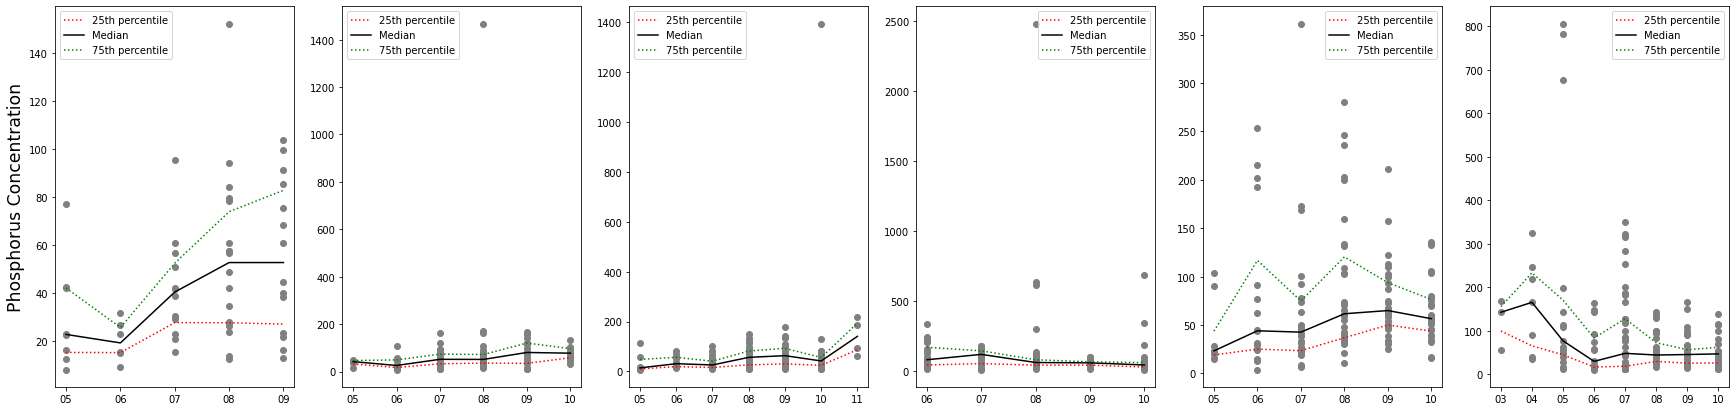

In [75]:
fig, axs = plt.subplots(1,6,figsize=(30,7))

axs[0].scatter(df_2012[df_2012['Year']==2012]['Month'],df_2012[df_2012['Year']==2012]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[0].text(160, 140, '2012', fontsize='xx-large')
axs[0].plot(df_2012_month,df_2012_tot_phos_25,':r')
axs[0].plot(df_2012_month,df_2012_tot_phos_med,'black')
axs[0].plot(df_2012_month,df_2012_tot_phos_75,':g')
axs[0].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[1].scatter(df_2013[df_2013['Year']==2013]['Month'],df_2013[df_2013['Year']==2013]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[1].text(160, 1350, '2013', fontsize='xx-large')
axs[1].plot(df_2013_month,df_2013_tot_phos_25,':r')
axs[1].plot(df_2013_month,df_2013_tot_phos_med,'black')
axs[1].plot(df_2013_month,df_2013_tot_phos_75,':g')
axs[1].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[2].scatter(df_2014[df_2014['Year']==2014]['Month'],df_2014[df_2014['Year']==2014]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[2].text(160, 1275, '2014', fontsize='xx-large')
axs[2].plot(df_2014_month,df_2014_tot_phos_25,':r')
axs[2].plot(df_2014_month,df_2014_tot_phos_med,'black')
axs[2].plot(df_2014_month,df_2014_tot_phos_75,':g')
axs[2].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[3].scatter(df_2015[df_2015['Year']==2015]['Month'],df_2015[df_2015['Year']==2015]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[3].text(160, 2250, '2015', fontsize='xx-large')
axs[3].plot(df_2015_month,df_2015_tot_phos_25,':r')
axs[3].plot(df_2015_month,df_2015_tot_phos_med,'black')
axs[3].plot(df_2015_month,df_2015_tot_phos_75,':g')
axs[3].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[4].scatter(df_2016[df_2016['Year']==2016]['Month'],df_2016[df_2016['Year']==2016]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[4].text(160, 320, '2016', fontsize='xx-large')
axs[4].plot(df_2016_month,df_2016_tot_phos_25,':r')
axs[4].plot(df_2016_month,df_2016_tot_phos_med,'black')
axs[4].plot(df_2016_month,df_2016_tot_phos_75,':g')
axs[4].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[5].scatter(df_2017[df_2017['Year']==2017]['Month'],df_2017[df_2017['Year']==2017]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[5].text(100, 725, '2017', fontsize='xx-large')
axs[5].plot(df_2017_month,df_2017_tot_phos_25,':r')
axs[5].plot(df_2017_month,df_2017_tot_phos_med,'black')
axs[5].plot(df_2017_month,df_2017_tot_phos_75,':g')
axs[5].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

#axs[6].scatter(site_date_sorted[site_date_sorted['Year']==2018]['DayofYear'],df_2018[df_2018['Year']==2018]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[6].text(140, 250, '2018', fontsize='xx-large')
#axs[6].plot(df_2018_month,df_2018_tot_phos_25,':r')
#axs[6].plot(df_2018_month,df_2018_tot_phos_med,'black')
#axs[6].plot(df_2018_month,df_2018_tot_phos_75,':g')
#axs[6].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[0].set_ylabel('Phosphorus Concentration', fontsize='xx-large')
#axs[3].set_xlabel('Day of Year', fontsize='xx-large')



Text(0.5, 0, 'Day of Year')

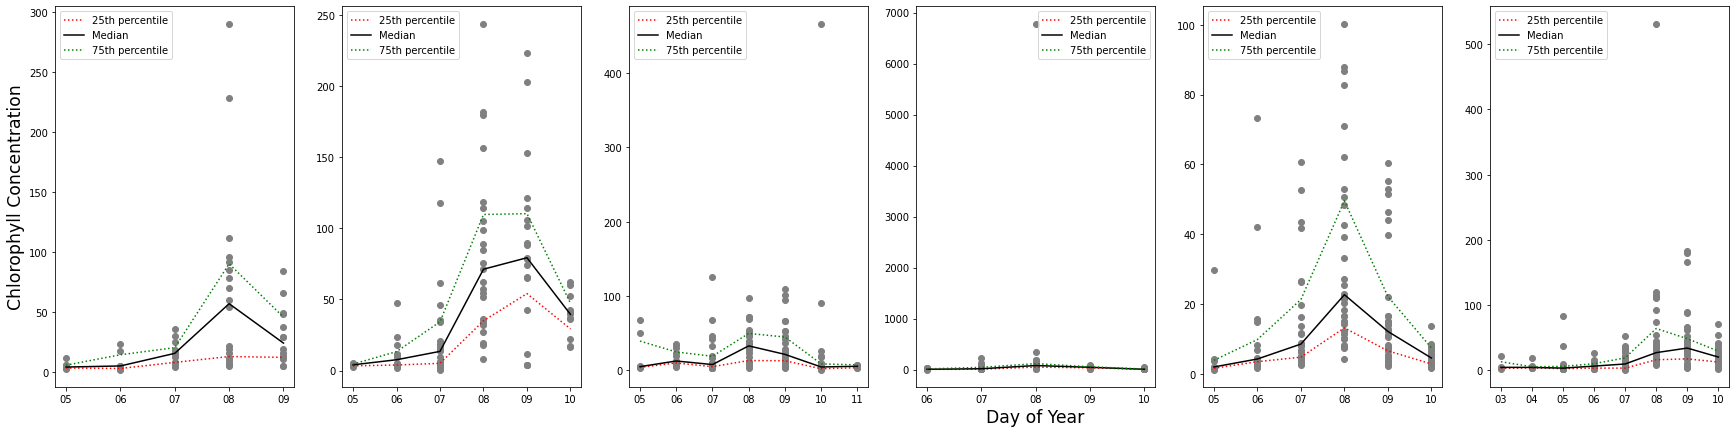

In [76]:
fig, axs = plt.subplots(1,6,figsize=(30,7))

axs[0].scatter(df_2012[df_2012['Year']==2012]['Month'],df_2012[df_2012['Year']==2012]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[0].text(160, 250, '2012', fontsize='xx-large')
axs[0].plot(df_2012_month,df_2012_tot_chlor_25,':r')
axs[0].plot(df_2012_month,df_2012_tot_chlor_med,'black')
axs[0].plot(df_2012_month,df_2012_tot_chlor_75,':g')
axs[0].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[1].scatter(df_2013[df_2013['Year']==2013]['Month'],df_2013[df_2013['Year']==2013]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[1].text(160, 200, '2013', fontsize='xx-large')
axs[1].plot(df_2013_month,df_2013_tot_chlor_25,':r')
axs[1].plot(df_2013_month,df_2013_tot_chlor_med,'black')
axs[1].plot(df_2013_month,df_2013_tot_chlor_75,':g')
axs[1].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[2].scatter(df_2014[df_2014['Year']==2014]['Month'],df_2014[df_2014['Year']==2014]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[2].text(160, 400, '2014', fontsize='xx-large')
axs[2].plot(df_2014_month,df_2014_tot_chlor_25,':r')
axs[2].plot(df_2014_month,df_2014_tot_chlor_med,'black')
axs[2].plot(df_2014_month,df_2014_tot_chlor_75,':g')
axs[2].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[3].scatter(df_2015[df_2015['Year']==2015]['Month'],df_2015[df_2015['Year']==2015]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[3].text(160, 6000, '2015', fontsize='xx-large')
axs[3].plot(df_2015_month,df_2015_tot_chlor_25,':r')
axs[3].plot(df_2015_month,df_2015_tot_chlor_med,'black')
axs[3].plot(df_2015_month,df_2015_tot_chlor_75,':g')
axs[3].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[4].scatter(df_2016[df_2016['Year']==2016]['Month'],df_2016[df_2016['Year']==2016]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[4].text(160, 90, '2016', fontsize='xx-large')
axs[4].plot(df_2016_month,df_2016_tot_chlor_25,':r')
axs[4].plot(df_2016_month,df_2016_tot_chlor_med,'black')
axs[4].plot(df_2016_month,df_2016_tot_chlor_75,':g')
axs[4].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[5].scatter(df_2017[df_2017['Year']==2017]['Month'],df_2017[df_2017['Year']==2017]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[5].text(100, 450, '2017', fontsize='xx-large')
axs[5].plot(df_2017_month,df_2017_tot_chlor_25,':r')
axs[5].plot(df_2017_month,df_2017_tot_chlor_med,'black')
axs[5].plot(df_2017_month,df_2017_tot_chlor_75,':g')
axs[5].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

#axs[6].scatter(df_2018[df_2018['Year']==2018]['DayofYear'],df_2018[df_2018['Year']==2018]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[6].text(140, 80, '2018', fontsize='xx-large')

axs[0].set_ylabel('Chlorophyll Concentration', fontsize='xx-large')
axs[3].set_xlabel('Day of Year', fontsize='xx-large')
#plt.savefig("chlor_per_year", bbox_inches='tight', dpi=300)

Text(0.5, 0, 'Day of Year')

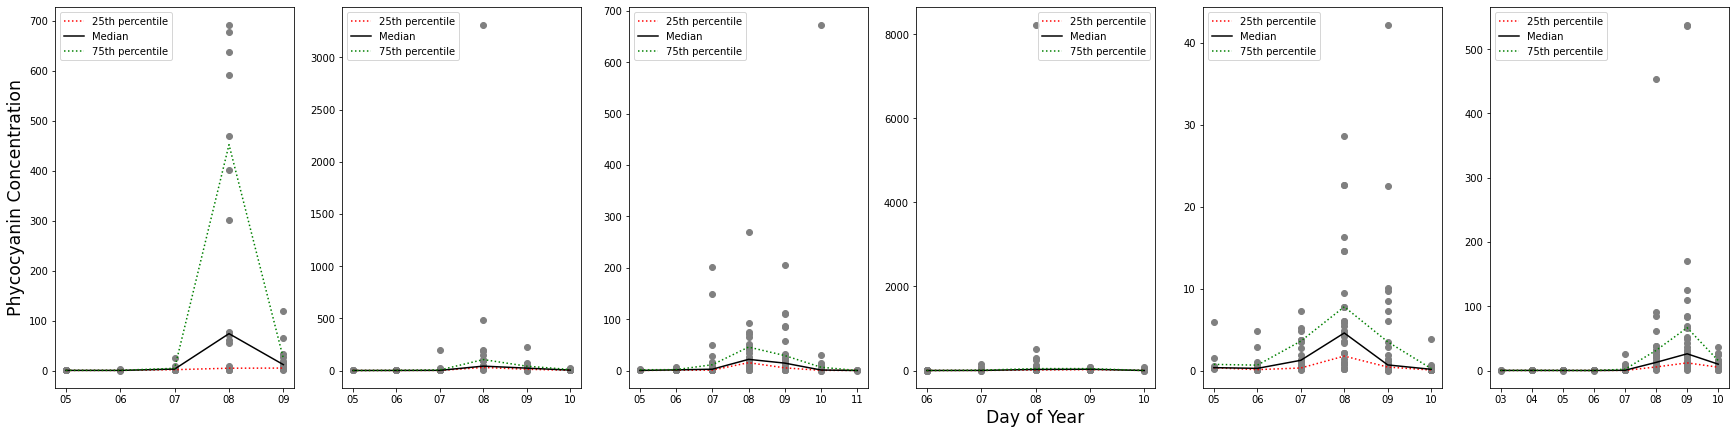

In [77]:
fig, axs = plt.subplots(1,6,figsize=(30,7))

axs[0].scatter(df_2012[df_2012['Year']==2012]['Month'],df_2012[df_2012['Year']==2012]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[0].text(160, 600, '2012', fontsize='xx-large')
axs[0].plot(df_2012_month,df_2012_tot_phyc_25,':r')
axs[0].plot(df_2012_month,df_2012_tot_phyc_med,'black')
axs[0].plot(df_2012_month,df_2012_tot_phyc_75,':g')
axs[0].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[1].scatter(df_2013[df_2013['Year']==2013]['Month'],df_2013[df_2013['Year']==2013]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[1].text(160, 2750, '2013', fontsize='xx-large')
axs[1].plot(df_2013_month,df_2013_tot_phyc_25,':r')
axs[1].plot(df_2013_month,df_2013_tot_phyc_med,'black')
axs[1].plot(df_2013_month,df_2013_tot_phyc_75,':g')
axs[1].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[2].scatter(df_2014[df_2014['Year']==2014]['Month'],df_2014[df_2014['Year']==2014]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[2].text(160, 550, '2014', fontsize='xx-large')
axs[2].plot(df_2014_month,df_2014_tot_phyc_25,':r')
axs[2].plot(df_2014_month,df_2014_tot_phyc_med,'black')
axs[2].plot(df_2014_month,df_2014_tot_phyc_75,':g')
axs[2].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[3].scatter(df_2015[df_2015['Year']==2015]['Month'],df_2015[df_2015['Year']==2015]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[3].text(160, 7000, '2015', fontsize='xx-large')
axs[3].plot(df_2015_month,df_2015_tot_phyc_25,':r')
axs[3].plot(df_2015_month,df_2015_tot_phyc_med,'black')
axs[3].plot(df_2015_month,df_2015_tot_phyc_75,':g')
axs[3].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[4].scatter(df_2016[df_2016['Year']==2016]['Month'],df_2016[df_2016['Year']==2016]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[4].text(160, 35, '2016', fontsize='xx-large')
axs[4].plot(df_2016_month,df_2016_tot_phyc_25,':r')
axs[4].plot(df_2016_month,df_2016_tot_phyc_med,'black')
axs[4].plot(df_2016_month,df_2016_tot_phyc_75,':g')
axs[4].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[5].scatter(df_2017[df_2017['Year']==2017]['Month'],df_2017[df_2017['Year']==2017]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[5].text(100, 450, '2017', fontsize='xx-large')
axs[5].plot(df_2017_month,df_2017_tot_phyc_25,':r')
axs[5].plot(df_2017_month,df_2017_tot_phyc_med,'black')
axs[5].plot(df_2017_month,df_2017_tot_phyc_75,':g')
axs[5].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

#axs[6].scatter(df_2018[df_2018['Year']==2018]['DayofYear'],df_2018[df_2018['Year']==2018]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[6].text(140, 35, '2018', fontsize='xx-large')

axs[0].set_ylabel('Phycocyanin Concentration', fontsize='xx-large')
axs[3].set_xlabel('Day of Year', fontsize='xx-large')

Text(0.5, 0, 'Month')

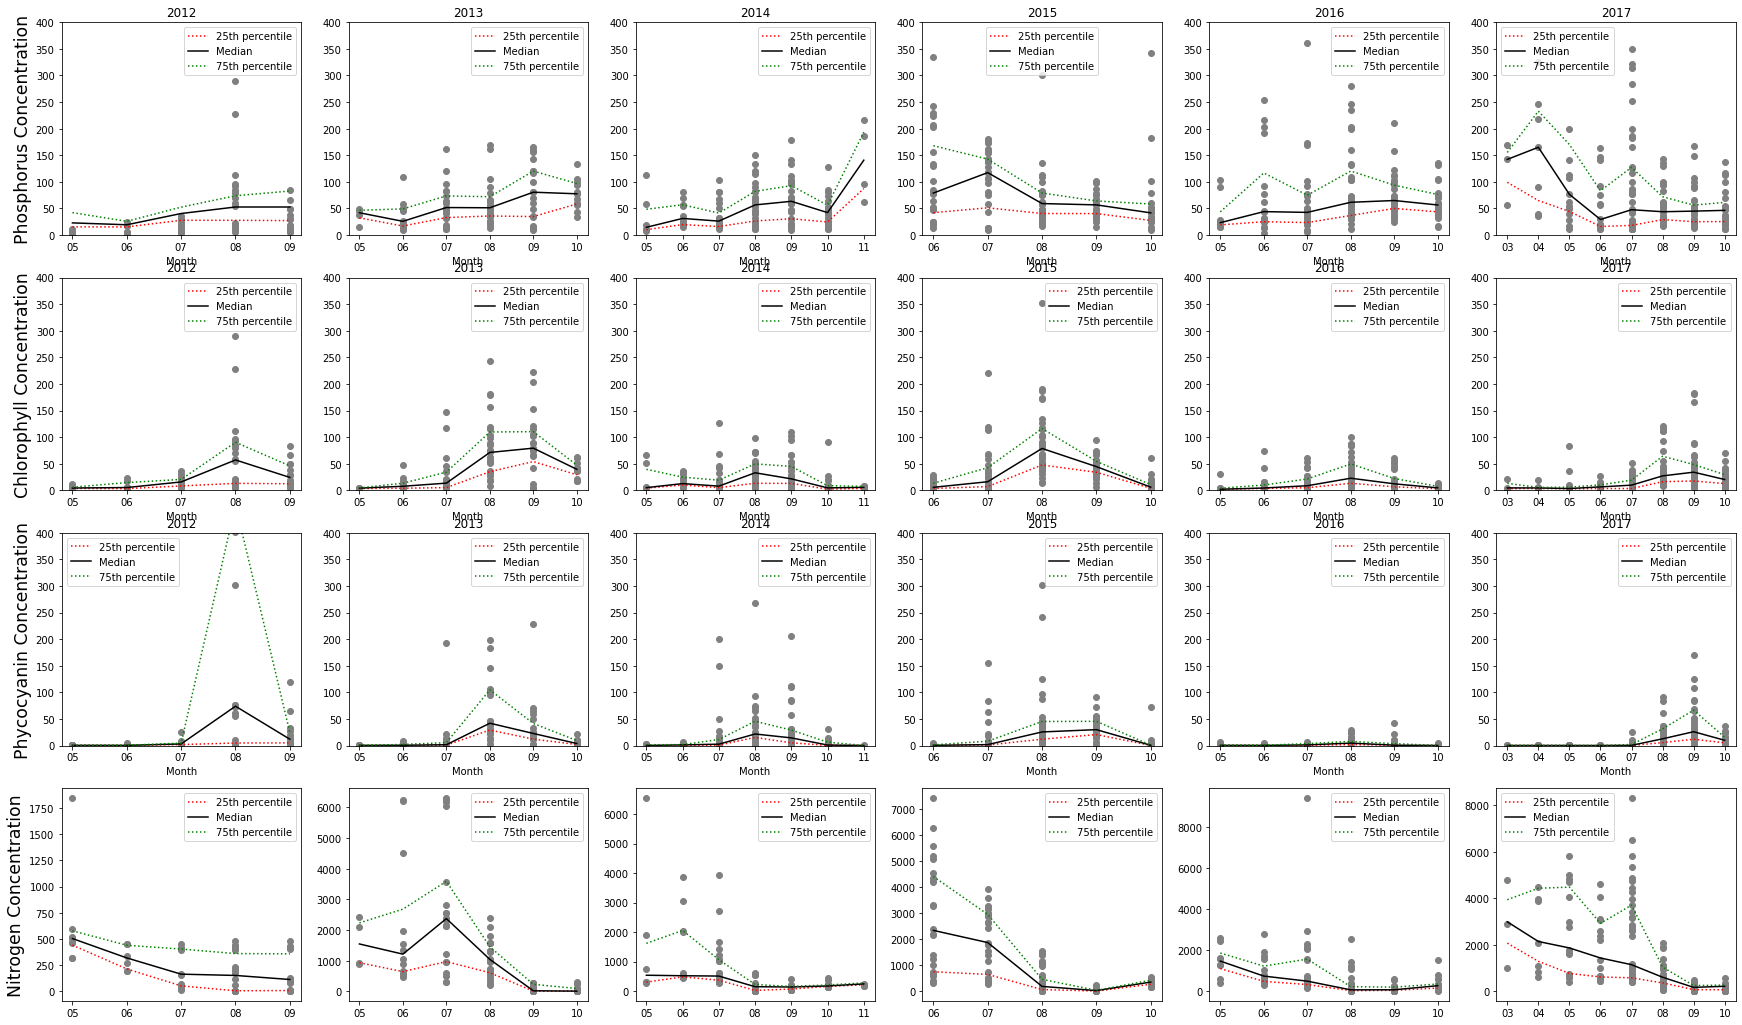

In [78]:
fig, axs = plt.subplots(4,6,figsize=(30,18))

axs[0, 0].scatter(df_2012[df_2012['Year']==2012]['Month'],df_2012[df_2012['Year']==2012]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
axs[0, 0].plot(df_2012_month,df_2012_tot_phos_25,':r')
axs[0, 0].plot(df_2012_month,df_2012_tot_phos_med,'black')
axs[0, 0].plot(df_2012_month,df_2012_tot_phos_75,':g')
axs[0, 0].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[0,1].scatter(df_2013[df_2013['Year']==2013]['Month'],df_2013[df_2013['Year']==2013]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[1].text(160, 1350, '2013', fontsize='xx-large')
axs[0,1].plot(df_2013_month,df_2013_tot_phos_25,':r')
axs[0,1].plot(df_2013_month,df_2013_tot_phos_med,'black')
axs[0,1].plot(df_2013_month,df_2013_tot_phos_75,':g')
axs[0,1].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[0,2].scatter(df_2014[df_2014['Year']==2014]['Month'],df_2014[df_2014['Year']==2014]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[2].text(160, 1275, '2014', fontsize='xx-large')
axs[0,2].plot(df_2014_month,df_2014_tot_phos_25,':r')
axs[0,2].plot(df_2014_month,df_2014_tot_phos_med,'black')
axs[0,2].plot(df_2014_month,df_2014_tot_phos_75,':g')
axs[0,2].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[0,3].scatter(df_2015[df_2015['Year']==2015]['Month'],df_2015[df_2015['Year']==2015]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[3].text(160, 2250, '2015', fontsize='xx-large')
axs[0,3].plot(df_2015_month,df_2015_tot_phos_25,':r')
axs[0,3].plot(df_2015_month,df_2015_tot_phos_med,'black')
axs[0,3].plot(df_2015_month,df_2015_tot_phos_75,':g')
axs[0,3].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[0,4].scatter(df_2016[df_2016['Year']==2016]['Month'],df_2016[df_2016['Year']==2016]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[4].text(160, 320, '2016', fontsize='xx-large')
axs[0,4].plot(df_2016_month,df_2016_tot_phos_25,':r')
axs[0,4].plot(df_2016_month,df_2016_tot_phos_med,'black')
axs[0,4].plot(df_2016_month,df_2016_tot_phos_75,':g')
axs[0,4].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[0,5].scatter(df_2017[df_2017['Year']==2017]['Month'],df_2017[df_2017['Year']==2017]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[5].text(100, 725, '2017', fontsize='xx-large')
axs[0,5].plot(df_2017_month,df_2017_tot_phos_25,':r')
axs[0,5].plot(df_2017_month,df_2017_tot_phos_med,'black')
axs[0,5].plot(df_2017_month,df_2017_tot_phos_75,':g')
axs[0,5].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

#axs[6].scatter(site_date_sorted[site_date_sorted['Year']==2018]['DayofYear'],df_2018[df_2018['Year']==2018]['Total Phosphorus (mug P/L)'] , color = 'gray')
#axs[6].text(140, 250, '2018', fontsize='xx-large')
#axs[6].plot(df_2018_month,df_2018_tot_phos_25,':r')
#axs[6].plot(df_2018_month,df_2018_tot_phos_med,'black')
#axs[6].plot(df_2018_month,df_2018_tot_phos_75,':g')
#axs[6].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[0,0].set_ylabel('Phosphorus Concentration', fontsize='xx-large')


axs[1,0].scatter(df_2012[df_2012['Year']==2012]['Month'],df_2012[df_2012['Year']==2012]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[0].text(160, 250, '2012', fontsize='xx-large')
axs[1,0].plot(df_2012_month,df_2012_tot_chlor_25,':r')
axs[1,0].plot(df_2012_month,df_2012_tot_chlor_med,'black')
axs[1,0].plot(df_2012_month,df_2012_tot_chlor_75,':g')
axs[1,0].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[1,1].scatter(df_2013[df_2013['Year']==2013]['Month'],df_2013[df_2013['Year']==2013]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[1].text(160, 200, '2013', fontsize='xx-large')
axs[1,1].plot(df_2013_month,df_2013_tot_chlor_25,':r')
axs[1,1].plot(df_2013_month,df_2013_tot_chlor_med,'black')
axs[1,1].plot(df_2013_month,df_2013_tot_chlor_75,':g')
axs[1,1].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[1,2].scatter(df_2014[df_2014['Year']==2014]['Month'],df_2014[df_2014['Year']==2014]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[2].text(160, 400, '2014', fontsize='xx-large')
axs[1,2].plot(df_2014_month,df_2014_tot_chlor_25,':r')
axs[1,2].plot(df_2014_month,df_2014_tot_chlor_med,'black')
axs[1,2].plot(df_2014_month,df_2014_tot_chlor_75,':g')
axs[1,2].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[1,3].scatter(df_2015[df_2015['Year']==2015]['Month'],df_2015[df_2015['Year']==2015]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[3].text(160, 6000, '2015', fontsize='xx-large')
axs[1,3].plot(df_2015_month,df_2015_tot_chlor_25,':r')
axs[1,3].plot(df_2015_month,df_2015_tot_chlor_med,'black')
axs[1,3].plot(df_2015_month,df_2015_tot_chlor_75,':g')
axs[1,3].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[1,4].scatter(df_2016[df_2016['Year']==2016]['Month'],df_2016[df_2016['Year']==2016]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[4].text(160, 90, '2016', fontsize='xx-large')
axs[1,4].plot(df_2016_month,df_2016_tot_chlor_25,':r')
axs[1,4].plot(df_2016_month,df_2016_tot_chlor_med,'black')
axs[1,4].plot(df_2016_month,df_2016_tot_chlor_75,':g')
axs[1,4].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[1,5].scatter(df_2017[df_2017['Year']==2017]['Month'],df_2017[df_2017['Year']==2017]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[5].text(100, 450, '2017', fontsize='xx-large')
axs[1,5].plot(df_2017_month,df_2017_tot_chlor_25,':r')
axs[1,5].plot(df_2017_month,df_2017_tot_chlor_med,'black')
axs[1,5].plot(df_2017_month,df_2017_tot_chlor_75,':g')
axs[1,5].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

#axs[6].scatter(df_2018[df_2018['Year']==2018]['DayofYear'],df_2018[df_2018['Year']==2018]['Extracted Chlorophyll a (mug/L)'] , color = 'gray')
#axs[6].text(140, 80, '2018', fontsize='xx-large')

axs[1,0].set_ylabel('Chlorophyll Concentration', fontsize='xx-large')


axs[2,0].scatter(df_2012[df_2012['Year']==2012]['Month'],df_2012[df_2012['Year']==2012]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[0].text(160, 600, '2012', fontsize='xx-large')
axs[2,0].plot(df_2012_month,df_2012_tot_phyc_25,':r')
axs[2,0].plot(df_2012_month,df_2012_tot_phyc_med,'black')
axs[2,0].plot(df_2012_month,df_2012_tot_phyc_75,':g')
axs[2,0].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[2,1].scatter(df_2013[df_2013['Year']==2013]['Month'],df_2013[df_2013['Year']==2013]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[1].text(160, 2750, '2013', fontsize='xx-large')
axs[2,1].plot(df_2013_month,df_2013_tot_phyc_25,':r')
axs[2,1].plot(df_2013_month,df_2013_tot_phyc_med,'black')
axs[2,1].plot(df_2013_month,df_2013_tot_phyc_75,':g')
axs[2,1].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[2,2].scatter(df_2014[df_2014['Year']==2014]['Month'],df_2014[df_2014['Year']==2014]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[2].text(160, 550, '2014', fontsize='xx-large')
axs[2,2].plot(df_2014_month,df_2014_tot_phyc_25,':r')
axs[2,2].plot(df_2014_month,df_2014_tot_phyc_med,'black')
axs[2,2].plot(df_2014_month,df_2014_tot_phyc_75,':g')
axs[2,2].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[2,3].scatter(df_2015[df_2015['Year']==2015]['Month'],df_2015[df_2015['Year']==2015]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[3].text(160, 7000, '2015', fontsize='xx-large')
axs[2,3].plot(df_2015_month,df_2015_tot_phyc_25,':r')
axs[2,3].plot(df_2015_month,df_2015_tot_phyc_med,'black')
axs[2,3].plot(df_2015_month,df_2015_tot_phyc_75,':g')
axs[2,3].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[2,4].scatter(df_2016[df_2016['Year']==2016]['Month'],df_2016[df_2016['Year']==2016]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[4].text(160, 35, '2016', fontsize='xx-large')
axs[2,4].plot(df_2016_month,df_2016_tot_phyc_25,':r')
axs[2,4].plot(df_2016_month,df_2016_tot_phyc_med,'black')
axs[2,4].plot(df_2016_month,df_2016_tot_phyc_75,':g')
axs[2,4].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[2,5].scatter(df_2017[df_2017['Year']==2017]['Month'],df_2017[df_2017['Year']==2017]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[5].text(100, 450, '2017', fontsize='xx-large')
axs[2,5].plot(df_2017_month,df_2017_tot_phyc_25,':r')
axs[2,5].plot(df_2017_month,df_2017_tot_phyc_med,'black')
axs[2,5].plot(df_2017_month,df_2017_tot_phyc_75,':g')
axs[2,5].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

#axs[6].scatter(df_2018[df_2018['Year']==2018]['DayofYear'],df_2018[df_2018['Year']==2018]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[6].text(140, 35, '2018', fontsize='xx-large')

axs[2,0].set_ylabel('Phycocyanin Concentration', fontsize='xx-large')

axs[3,0].scatter(df_2012[df_2012['Year']==2012]['Month'],(df_2012[df_2012['Year']==2012]['Nitrate + Nitrite (mug N/L)']) , color = 'gray')
#axs[0].text(160, 600, '2012', fontsize='xx-large')
axs[3,0].plot(df_2012_month,df_2012_tot_nitr_25,':r')
axs[3,0].plot(df_2012_month,df_2012_tot_nitr_med,'black')
axs[3,0].plot(df_2012_month,df_2012_tot_nitr_75,':g')
axs[3,0].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[3,1].scatter(df_2013[df_2013['Year']==2013]['Month'],(df_2013[df_2013['Year']==2013]['Nitrate + Nitrite (mug N/L)']) , color = 'gray')
#axs[1].text(160, 2750, '2013', fontsize='xx-large')
axs[3,1].plot(df_2013_month,df_2013_tot_nitr_25,':r')
axs[3,1].plot(df_2013_month,df_2013_tot_nitr_med,'black')
axs[3,1].plot(df_2013_month,df_2013_tot_nitr_75,':g')
axs[3,1].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[3,2].scatter(df_2014[df_2014['Year']==2014]['Month'],(df_2014[df_2014['Year']==2014]['Nitrate + Nitrite (mug N/L)']), color = 'gray')
#axs[2].text(160, 550, '2014', fontsize='xx-large')
axs[3,2].plot(df_2014_month,df_2014_tot_nitr_25,':r')
axs[3,2].plot(df_2014_month,df_2014_tot_nitr_med,'black')
axs[3,2].plot(df_2014_month,df_2014_tot_nitr_75,':g')
axs[3,2].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[3,3].scatter(df_2015[df_2015['Year']==2015]['Month'],(df_2015[df_2015['Year']==2015]['Nitrate + Nitrite (mug N/L)']) , color = 'gray')
#axs[3].text(160, 7000, '2015', fontsize='xx-large')
axs[3,3].plot(df_2015_month,df_2015_tot_nitr_25,':r')
axs[3,3].plot(df_2015_month,df_2015_tot_nitr_med,'black')
axs[3,3].plot(df_2015_month,df_2015_tot_nitr_75,':g')
axs[3,3].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[3,4].scatter(df_2016[df_2016['Year']==2016]['Month'],(df_2016[df_2016['Year']==2016]['Nitrate + Nitrite (mug N/L)']) , color = 'gray')
#axs[4].text(160, 35, '2016', fontsize='xx-large')
axs[3,4].plot(df_2016_month,df_2016_tot_nitr_25,':r')
axs[3,4].plot(df_2016_month,df_2016_tot_nitr_med,'black')
axs[3,4].plot(df_2016_month,df_2016_tot_nitr_75,':g')
axs[3,4].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

axs[3,5].scatter(df_2017[df_2017['Year']==2017]['Month'],(df_2017[df_2017['Year']==2017]['Nitrate + Nitrite (mug N/L)']) , color = 'gray')
#axs[5].text(100, 450, '2017', fontsize='xx-large')
axs[3,5].plot(df_2017_month,df_2017_tot_nitr_25,':r')
axs[3,5].plot(df_2017_month,df_2017_tot_nitr_med,'black')
axs[3,5].plot(df_2017_month,df_2017_tot_nitr_75,':g')
axs[3,5].legend(('25th percentile', 'Median', '75th percentile'), loc='best')

#axs[6].scatter(df_2018[df_2018['Year']==2018]['DayofYear'],df_2018[df_2018['Year']==2018]['Extracted Phycocyanin (mug/L)'] , color = 'gray')
#axs[6].text(140, 35, '2018', fontsize='xx-large')

axs[3,0].set_ylabel('Nitrogen Concentration', fontsize='xx-large')

axs[0,0].set_ylim([0,400])
axs[0,1].set_ylim([0,400])
axs[0,2].set_ylim([0,400])
axs[0,3].set_ylim([0,400])
axs[0,4].set_ylim([0,400])
axs[0,5].set_ylim([0,400])

axs[0,0].set_title('2012')
axs[0,1].set_title('2013')
axs[0,2].set_title('2014')
axs[0,3].set_title('2015')
axs[0,4].set_title('2016')
axs[0,5].set_title('2017')

axs[0,0].set_xlabel('Month')
axs[0,1].set_xlabel('Month')
axs[0,2].set_xlabel('Month')
axs[0,3].set_xlabel('Month')
axs[0,4].set_xlabel('Month')
axs[0,5].set_xlabel('Month')

axs[1,0].set_ylim([0,400])
axs[1,1].set_ylim([0,400])
axs[1,2].set_ylim([0,400])
axs[1,3].set_ylim([0,400])
axs[1,4].set_ylim([0,400])
axs[1,5].set_ylim([0,400])

axs[1,0].set_title('2012')
axs[1,1].set_title('2013')
axs[1,2].set_title('2014')
axs[1,3].set_title('2015')
axs[1,4].set_title('2016')
axs[1,5].set_title('2017')

axs[1,0].set_xlabel('Month')
axs[1,1].set_xlabel('Month')
axs[1,2].set_xlabel('Month')
axs[1,3].set_xlabel('Month')
axs[1,4].set_xlabel('Month')
axs[1,5].set_xlabel('Month')

axs[2,0].set_ylim([0,400])
axs[2,1].set_ylim([0,400])
axs[2,2].set_ylim([0,400])
axs[2,3].set_ylim([0,400])
axs[2,4].set_ylim([0,400])
axs[2,5].set_ylim([0,400])

axs[2,0].set_title('2012')
axs[2,1].set_title('2013')
axs[2,2].set_title('2014')
axs[2,3].set_title('2015')
axs[2,4].set_title('2016')
axs[2,5].set_title('2017')

axs[2,0].set_xlabel('Month')
axs[2,1].set_xlabel('Month')
axs[2,2].set_xlabel('Month')
axs[2,3].set_xlabel('Month')
axs[2,4].set_xlabel('Month')
axs[2,5].set_xlabel('Month')


(-4.0, 9.0)

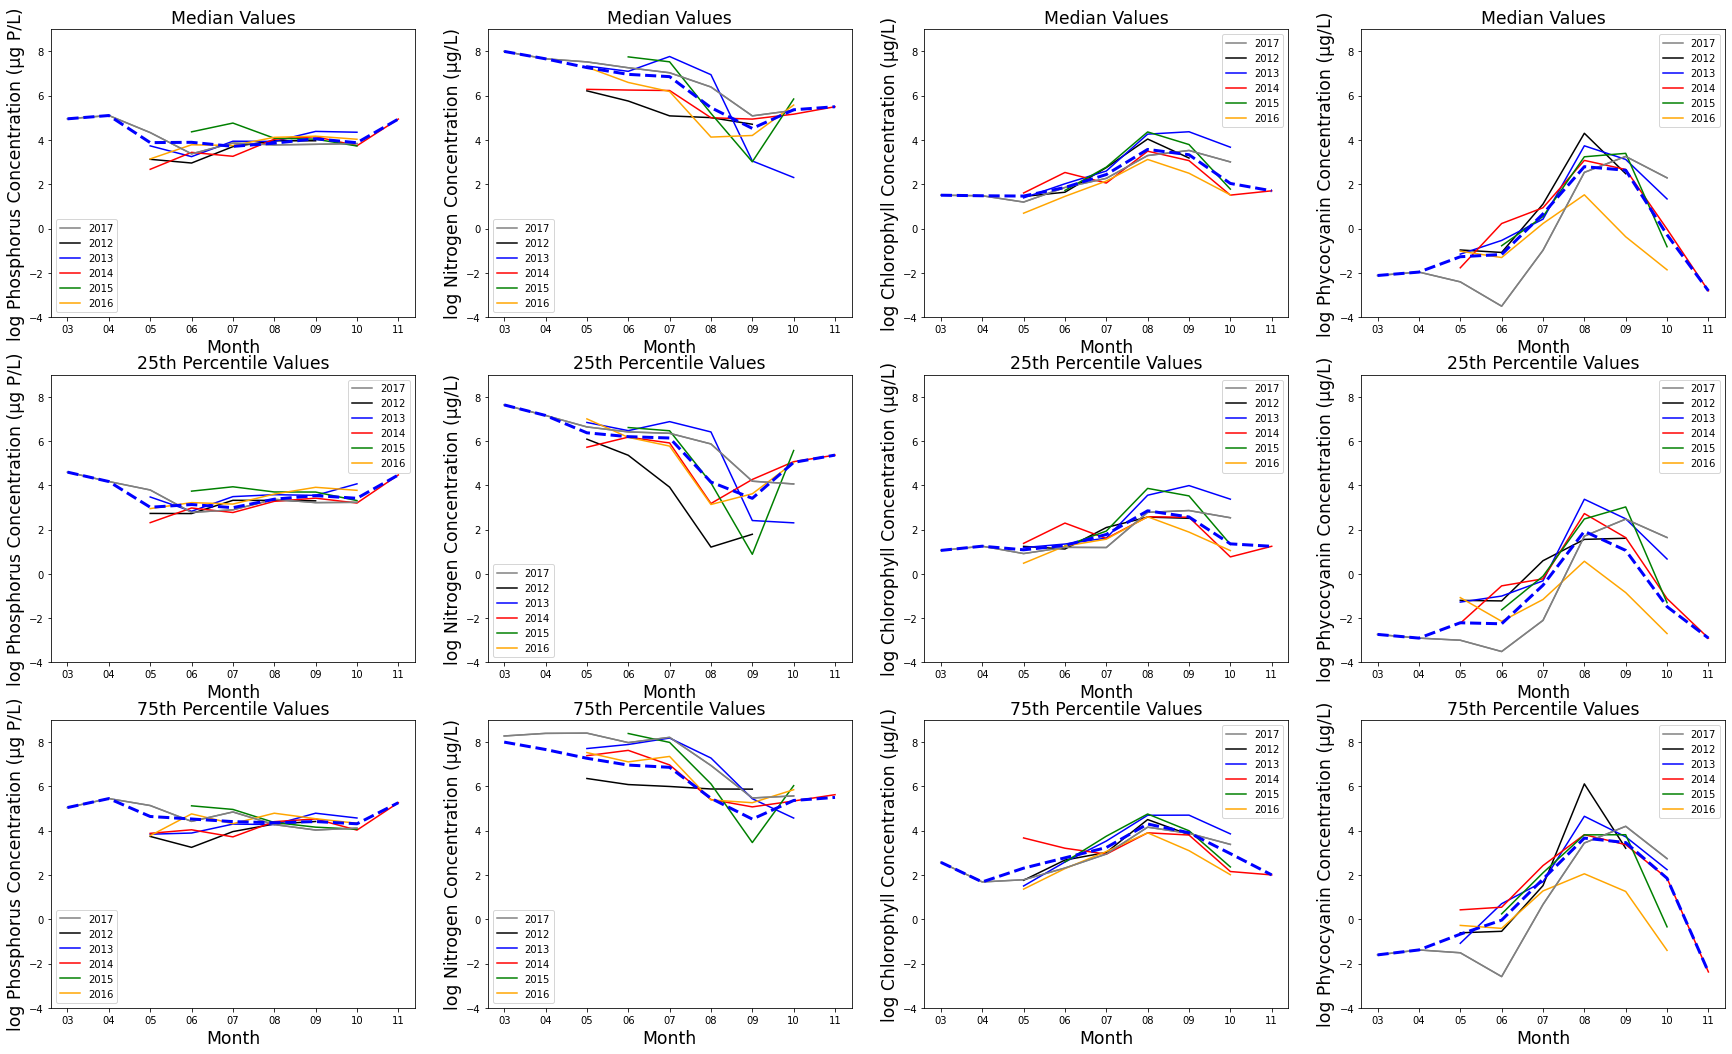

In [79]:
fig, axs = plt.subplots(3,4,figsize=(30,18))
axs[0, 0].plot(df_2017_month,np.log(df_2017_tot_phos_med),'gray')
axs[0, 0].plot(df_2012_month,np.log(df_2012_tot_phos_med),'black')
axs[0, 0].plot(df_2013_month,np.log(df_2013_tot_phos_med),'blue')
axs[0, 0].plot(df_2014_month,np.log(df_2014_tot_phos_med),'red')
axs[0, 0].plot(df_2015_month,np.log(df_2015_tot_phos_med),'green')
axs[0, 0].plot(df_2016_month,np.log(df_2016_tot_phos_med),'orange')
axs[0, 0].plot(df_2017_month,np.log(df_2017_tot_phos_med),'gray')
axs[0, 0].plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_med),'b--',linewidth = 3)
axs[0, 0].set_title('Median Values',fontsize='xx-large')
axs[0, 0].set_ylabel('log Phosphorus Concentration (μg P/L)',fontsize='xx-large')
axs[0, 0].set_xlabel('Month',fontsize='xx-large')
axs[0, 0].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[0, 0].set_ylim([-4,9])

axs[0, 1].plot(df_2017_month,np.log(df_2017_tot_nitr_med),'gray')
axs[0, 1].plot(df_2012_month,np.log(df_2012_tot_nitr_med),'black')
axs[0, 1].plot(df_2013_month,np.log(df_2013_tot_nitr_med),'blue')
axs[0, 1].plot(df_2014_month,np.log(df_2014_tot_nitr_med),'red')
axs[0, 1].plot(df_2015_month,np.log(df_2015_tot_nitr_med),'green')
axs[0, 1].plot(df_2016_month,np.log(df_2016_tot_nitr_med),'orange')
axs[0, 1].plot(df_2017_month,np.log(df_2017_tot_nitr_med),'gray')
axs[0, 1].plot(site_date_sorted_month,np.log(site_date_sorted_nitr_med),'b--',linewidth = 3)
axs[0, 1].set_title('Median Values',fontsize='xx-large')
axs[0, 1].set_ylabel('log Nitrogen Concentration (μg/L)',fontsize='xx-large')
axs[0, 1].set_xlabel('Month',fontsize='xx-large')
axs[0, 1].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[0, 1].set_ylim([-4,9])

axs[0, 2].plot(df_2017_month,np.log(df_2017_tot_chlor_med),'gray')
axs[0, 2].plot(df_2012_month,np.log(df_2012_tot_chlor_med),'black')
axs[0, 2].plot(df_2013_month,np.log(df_2013_tot_chlor_med),'blue')
axs[0, 2].plot(df_2014_month,np.log(df_2014_tot_chlor_med),'red')
axs[0, 2].plot(df_2015_month,np.log(df_2015_tot_chlor_med),'green')
axs[0, 2].plot(df_2016_month,np.log(df_2016_tot_chlor_med),'orange')
axs[0, 2].plot(df_2017_month,np.log(df_2017_tot_chlor_med),'gray')
axs[0, 2].plot(site_date_sorted_month,np.log(site_date_sorted_chlor_med),'b--',linewidth = 3)
axs[0, 2].set_title('Median Values',fontsize='xx-large')
axs[0, 2].set_ylabel('log Chlorophyll Concentration (μg/L)',fontsize='xx-large')
axs[0, 2].set_xlabel('Month',fontsize='xx-large')
axs[0, 2].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[0, 2].set_ylim([-4,9])

axs[0, 3].plot(df_2017_month,np.log(df_2017_tot_phyc_med),'gray')
axs[0, 3].plot(df_2012_month,np.log(df_2012_tot_phyc_med),'black')
axs[0, 3].plot(df_2013_month,np.log(df_2013_tot_phyc_med),'blue')
axs[0, 3].plot(df_2014_month,np.log(df_2014_tot_phyc_med),'red')
axs[0, 3].plot(df_2015_month,np.log(df_2015_tot_phyc_med),'green')
axs[0, 3].plot(df_2016_month,np.log(df_2016_tot_phyc_med),'orange')
axs[0, 3].plot(df_2017_month,np.log(df_2017_tot_phyc_med),'gray')
axs[0, 3].plot(site_date_sorted_month,np.log(site_date_sorted_phyc_med),'b--',linewidth = 3)
axs[0, 3].set_title('Median Values',fontsize='xx-large')
axs[0, 3].set_ylabel('log Phycocyanin Concentration (μg/L)',fontsize='xx-large')
axs[0, 3].set_xlabel('Month',fontsize='xx-large')
axs[0, 3].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[0, 3].set_ylim([-4,9])

axs[1, 0].plot(df_2017_month,np.log(df_2017_tot_phos_25),'gray')
axs[1, 0].plot(df_2012_month,np.log(df_2012_tot_phos_25),'black')
axs[1, 0].plot(df_2013_month,np.log(df_2013_tot_phos_25),'blue')
axs[1, 0].plot(df_2014_month,np.log(df_2014_tot_phos_25),'red')
axs[1, 0].plot(df_2015_month,np.log(df_2015_tot_phos_25),'green')
axs[1, 0].plot(df_2016_month,np.log(df_2016_tot_phos_25),'orange')
axs[1, 0].plot(df_2017_month,np.log(df_2017_tot_phos_25),'gray')
axs[1, 0].plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_25),'b--',linewidth = 3)
axs[1, 0].set_title('25th Percentile Values',fontsize='xx-large')
axs[1, 0].set_ylabel('log Phosphorus Concentration (μg P/L)',fontsize='xx-large')
axs[1, 0].set_xlabel('Month',fontsize='xx-large')
axs[1, 0].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[1, 0].set_ylim([-4,9])

axs[1, 1].plot(df_2017_month,np.log(df_2017_tot_nitr_25),'gray')
axs[1, 1].plot(df_2012_month,np.log(df_2012_tot_nitr_25),'black')
axs[1, 1].plot(df_2013_month,np.log(df_2013_tot_nitr_25),'blue')
axs[1, 1].plot(df_2014_month,np.log(df_2014_tot_nitr_25),'red')
axs[1, 1].plot(df_2015_month,np.log(df_2015_tot_nitr_25),'green')
axs[1, 1].plot(df_2016_month,np.log(df_2016_tot_nitr_25),'orange')
axs[1, 1].plot(df_2017_month,np.log(df_2017_tot_nitr_25),'gray')
axs[1, 1].plot(site_date_sorted_month,np.log(site_date_sorted_nitr_25),'b--',linewidth = 3)
axs[1, 1].set_title('25th Percentile Values',fontsize='xx-large')
axs[1, 1].set_ylabel('log Nitrogen Concentration (μg/L)',fontsize='xx-large')
axs[1, 1].set_xlabel('Month',fontsize='xx-large')
axs[1, 1].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[1, 1].set_ylim([-4,9])

axs[1, 2].plot(df_2017_month,np.log(df_2017_tot_chlor_25),'gray')
axs[1, 2].plot(df_2012_month,np.log(df_2012_tot_chlor_25),'black')
axs[1, 2].plot(df_2013_month,np.log(df_2013_tot_chlor_25),'blue')
axs[1, 2].plot(df_2014_month,np.log(df_2014_tot_chlor_25),'red')
axs[1, 2].plot(df_2015_month,np.log(df_2015_tot_chlor_25),'green')
axs[1, 2].plot(df_2016_month,np.log(df_2016_tot_chlor_25),'orange')
axs[1, 2].plot(df_2017_month,np.log(df_2017_tot_chlor_25),'gray')
axs[1, 2].plot(site_date_sorted_month,np.log(site_date_sorted_chlor_25),'b--',linewidth = 3)
axs[1, 2].set_title('25th Percentile Values',fontsize='xx-large')
axs[1, 2].set_ylabel('log Chlorophyll Concentration (μg/L)',fontsize='xx-large')
axs[1, 2].set_xlabel('Month',fontsize='xx-large')
axs[1, 2].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[1, 2].set_ylim([-4,9])

axs[1, 3].plot(df_2017_month,np.log(df_2017_tot_phyc_25),'gray')
axs[1, 3].plot(df_2012_month,np.log(df_2012_tot_phyc_25),'black')
axs[1, 3].plot(df_2013_month,np.log(df_2013_tot_phyc_25),'blue')
axs[1, 3].plot(df_2014_month,np.log(df_2014_tot_phyc_25),'red')
axs[1, 3].plot(df_2015_month,np.log(df_2015_tot_phyc_25),'green')
axs[1, 3].plot(df_2016_month,np.log(df_2016_tot_phyc_25),'orange')
axs[1, 3].plot(df_2017_month,np.log(df_2017_tot_phyc_25),'gray')
axs[1, 3].plot(site_date_sorted_month,np.log(site_date_sorted_phyc_25),'b--',linewidth = 3)
axs[1, 3].set_title('25th Percentile Values',fontsize='xx-large')
axs[1, 3].set_ylabel('log Phycocyanin Concentration (μg/L)',fontsize='xx-large')
axs[1, 3].set_xlabel('Month',fontsize='xx-large')
axs[1, 3].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[1, 3].set_ylim([-4,9])

axs[2, 0].plot(df_2017_month,np.log(df_2017_tot_phos_75),'gray')
axs[2, 0].plot(df_2012_month,np.log(df_2012_tot_phos_75),'black')
axs[2, 0].plot(df_2013_month,np.log(df_2013_tot_phos_75),'blue')
axs[2, 0].plot(df_2014_month,np.log(df_2014_tot_phos_75),'red')
axs[2, 0].plot(df_2015_month,np.log(df_2015_tot_phos_75),'green')
axs[2, 0].plot(df_2016_month,np.log(df_2016_tot_phos_75),'orange')
axs[2, 0].plot(df_2017_month,np.log(df_2017_tot_phos_75),'gray')
axs[2, 0].plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_75),'b--',linewidth = 3)
axs[2, 0].set_title('75th Percentile Values',fontsize='xx-large')
axs[2, 0].set_ylabel('log Phosphorus Concentration (μg P/L)',fontsize='xx-large')
axs[2, 0].set_xlabel('Month',fontsize='xx-large')
axs[2, 0].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[2, 0].set_ylim([-4,9])

axs[2, 1].plot(df_2017_month,np.log(df_2017_tot_nitr_75),'gray')
axs[2, 1].plot(df_2012_month,np.log(df_2012_tot_nitr_75),'black')
axs[2, 1].plot(df_2013_month,np.log(df_2013_tot_nitr_75),'blue')
axs[2, 1].plot(df_2014_month,np.log(df_2014_tot_nitr_75),'red')
axs[2, 1].plot(df_2015_month,np.log(df_2015_tot_nitr_75),'green')
axs[2, 1].plot(df_2016_month,np.log(df_2016_tot_nitr_75),'orange')
axs[2, 1].plot(df_2017_month,np.log(df_2017_tot_nitr_75),'gray')
axs[2, 1].plot(site_date_sorted_month,np.log(site_date_sorted_nitr_med),'b--',linewidth = 3)
axs[2, 1].set_title('75th Percentile Values',fontsize='xx-large')
axs[2, 1].set_ylabel('log Nitrogen Concentration (μg/L)',fontsize='xx-large')
axs[2, 1].set_xlabel('Month',fontsize='xx-large')
axs[2, 1].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[2, 1].set_ylim([-4,9])

axs[2, 2].plot(df_2017_month,np.log(df_2017_tot_chlor_75),'gray')
axs[2, 2].plot(df_2012_month,np.log(df_2012_tot_chlor_75),'black')
axs[2, 2].plot(df_2013_month,np.log(df_2013_tot_chlor_75),'blue')
axs[2, 2].plot(df_2014_month,np.log(df_2014_tot_chlor_75),'red')
axs[2, 2].plot(df_2015_month,np.log(df_2015_tot_chlor_75),'green')
axs[2, 2].plot(df_2016_month,np.log(df_2016_tot_chlor_75),'orange')
axs[2, 2].plot(df_2017_month,np.log(df_2017_tot_chlor_75),'gray')
axs[2, 2].plot(site_date_sorted_month,np.log(site_date_sorted_chlor_75),'b--',linewidth = 3)
axs[2, 2].set_title('75th Percentile Values',fontsize='xx-large')
axs[2, 2].set_ylabel('log Chlorophyll Concentration (μg/L)',fontsize='xx-large')
axs[2, 2].set_xlabel('Month',fontsize='xx-large')
axs[2, 2].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[2, 2].set_ylim([-4,9])

axs[2, 3].plot(df_2017_month,np.log(df_2017_tot_phyc_75),'gray')
axs[2, 3].plot(df_2012_month,np.log(df_2012_tot_phyc_75),'black')
axs[2, 3].plot(df_2013_month,np.log(df_2013_tot_phyc_75),'blue')
axs[2, 3].plot(df_2014_month,np.log(df_2014_tot_phyc_75),'red')
axs[2, 3].plot(df_2015_month,np.log(df_2015_tot_phyc_75),'green')
axs[2, 3].plot(df_2016_month,np.log(df_2016_tot_phyc_75),'orange')
axs[2, 3].plot(df_2017_month,np.log(df_2017_tot_phyc_75),'gray')
axs[2, 3].plot(site_date_sorted_month,np.log(site_date_sorted_phyc_75),'b--',linewidth = 3)
axs[2, 3].set_title('75th Percentile Values',fontsize='xx-large')
axs[2, 3].set_ylabel('log Phycocyanin Concentration (μg/L)',fontsize='xx-large')
axs[2, 3].set_xlabel('Month',fontsize='xx-large')
axs[2, 3].legend(('2017', '2012', '2013', '2014', '2015', '2016'), loc='best')
axs[2, 3].set_ylim([-4,9])



Text(0, 0.5, 'Log Concentration μg/L')

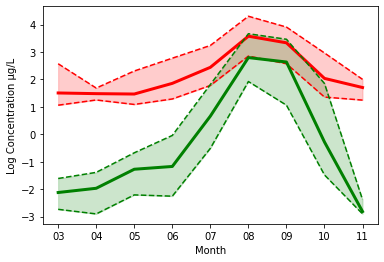

In [80]:
#plt.plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_med), 'black', linewidth = 3)
#plt.plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_25), 'black', linestyle='dashed')
#plt.plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_75),'black', linestyle='dashed')
#plt.fill_between(site_date_sorted_month,np.log(site_date_sorted_tot_phos_75),np.log(site_date_sorted_tot_phos_25),color='gray', alpha=0.2)

#plt.plot(site_date_sorted_month,np.log(site_date_sorted_nitr_med), 'blue', linewidth = 3)
#plt.plot(site_date_sorted_month,np.log(site_date_sorted_nitr_25), 'b--')
#plt.plot(site_date_sorted_month,np.log(site_date_sorted_nitr_75),'b--')
#plt.fill_between(site_date_sorted_month,np.log(site_date_sorted_nitr_75),np.log(site_date_sorted_nitr_25),color='blue', alpha=0.2)

plt.plot(site_date_sorted_month,np.log(site_date_sorted_chlor_med), 'red', linewidth = 3)
plt.plot(site_date_sorted_month,np.log(site_date_sorted_chlor_25), 'r--')
plt.plot(site_date_sorted_month,np.log(site_date_sorted_chlor_75),'r--')
plt.fill_between(site_date_sorted_month,np.log(site_date_sorted_chlor_75),np.log(site_date_sorted_chlor_25),color='red', alpha=0.2)

plt.plot(site_date_sorted_month,np.log(site_date_sorted_phyc_med), 'green', linewidth = 3)
plt.plot(site_date_sorted_month,np.log(site_date_sorted_phyc_25), 'g--')
plt.plot(site_date_sorted_month,np.log(site_date_sorted_phyc_75),'g--')
plt.fill_between(site_date_sorted_month,np.log(site_date_sorted_phyc_75),np.log(site_date_sorted_phyc_25),color='green', alpha=0.2)

plt.xlabel('Month')
plt.ylabel('Log Concentration μg/L')
#plt.legend(('Phosphorus', 'Nitrogen', 'Chlorophyll', 'Phycocyanin'), loc = 'best')


0.6931471805599453 1.0986122886681098


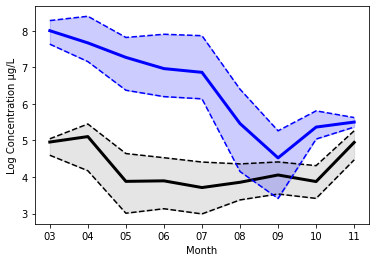

In [81]:
plt.plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_med), 'black', linewidth = 3)
plt.plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_25), 'black', linestyle='dashed')
plt.plot(site_date_sorted_month,np.log(site_date_sorted_tot_phos_75),'black', linestyle='dashed')
plt.fill_between(site_date_sorted_month,np.log(site_date_sorted_tot_phos_75),np.log(site_date_sorted_tot_phos_25),color='gray', alpha=0.2)

plt.plot(site_date_sorted_month,np.log(site_date_sorted_nitr_med), 'blue', linewidth = 3)
plt.plot(site_date_sorted_month,np.log(site_date_sorted_nitr_25), 'b--')
plt.plot(site_date_sorted_month,np.log(site_date_sorted_nitr_75),'b--')
plt.fill_between(site_date_sorted_month,np.log(site_date_sorted_nitr_75),np.log(site_date_sorted_nitr_25),color='blue', alpha=0.2)

plt.xlabel('Month')
plt.ylabel('Log Concentration μg/L')

#phosphorus black
#nitrogen blue
a= np.log(2)
b = np.log(3)
print(a,b)

(0.0, 3000.0)

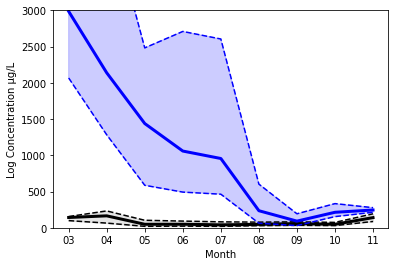

In [82]:
plt.plot(site_date_sorted_month,site_date_sorted_tot_phos_med, 'black', linewidth = 3)
plt.plot(site_date_sorted_month,site_date_sorted_tot_phos_25, 'black', linestyle='dashed')
plt.plot(site_date_sorted_month,site_date_sorted_tot_phos_75,'black', linestyle='dashed')
plt.fill_between(site_date_sorted_month,site_date_sorted_tot_phos_75,site_date_sorted_tot_phos_25,color='gray', alpha=0.2)

plt.plot(site_date_sorted_month,site_date_sorted_nitr_med, 'blue', linewidth = 3)
plt.plot(site_date_sorted_month,site_date_sorted_nitr_25, 'b--')
plt.plot(site_date_sorted_month,site_date_sorted_nitr_75,'b--')
plt.fill_between(site_date_sorted_month,site_date_sorted_nitr_75,site_date_sorted_nitr_25,color='blue', alpha=0.2)

plt.xlabel('Month')
plt.ylabel('Log Concentration μg/L')
plt.ylim([0,3000])
#phosphorus black
#nitrogen blue
# month 7 nitrogen to phosphorus ratio: 1000/50 = 20:1
# month 8 nitrogen to phosphorus ratio: 225/50 = 4.5:1

In [83]:
print(site_date_sorted_phyc_med)

phyco_to_chlor_ratio = 4.07

phycocyanin1 = []
for i in range(0,9):
    phycocyanin1.append(site_date_sorted_phyc_med[i]*phyco_to_chlor_ratio)
print(phycocyanin1)

print(site_date_sorted_chlor_med)
chlor_without_cyanobac_med1 = []
for i in range(0,9):
    chlor_without_cyanobac_med1.append(site_date_sorted_chlor_med[i]-phycocyanin1[i])
print(chlor_without_cyanobac_med1)


phycocyanin_75_1 = []
for i in range(0,9):
    phycocyanin_75_1.append(site_date_sorted_phyc_75[i]*phyco_to_chlor_ratio)
print(phycocyanin_75_1)

print(site_date_sorted_chlor_75)
chlor_without_cyanobac_75_1 = []
for i in range(0,9):
    chlor_without_cyanobac_75_1.append(site_date_sorted_chlor_75[i]-phycocyanin_75_1[i])
print(chlor_without_cyanobac_75_1)


phycocyanin_25_1 = []
for i in range(0,9):
    phycocyanin_25_1.append(site_date_sorted_phyc_25[i]*phyco_to_chlor_ratio)
print(phycocyanin_25_1)

print(site_date_sorted_chlor_25)
chlor_without_cyanobac_25_1 = []
for i in range(0,9):
    chlor_without_cyanobac_25_1.append(site_date_sorted_chlor_25[i]-phycocyanin_25_1[i])
print(chlor_without_cyanobac_25_1)

phycocyanin = []
for i in range(0,9):
    phycocyanin.append(site_date_sorted_phyc_med[i]/phyco_to_chlor_ratio)
print(phycocyanin)

print(site_date_sorted_chlor_med)
chlor_without_cyanobac_med = []
for i in range(0,9):
    chlor_without_cyanobac_med.append(site_date_sorted_chlor_med[i]-phycocyanin[i])
print(chlor_without_cyanobac_med)


phycocyanin_75 = []
for i in range(0,9):
    phycocyanin_75.append(site_date_sorted_phyc_75[i]/phyco_to_chlor_ratio)
print(phycocyanin_75)

print(site_date_sorted_chlor_75)
chlor_without_cyanobac_75 = []
for i in range(0,9):
    chlor_without_cyanobac_75.append(site_date_sorted_chlor_75[i]-phycocyanin_75[i])
print(chlor_without_cyanobac_75)


phycocyanin_25 = []
for i in range(0,9):
    phycocyanin_25.append(site_date_sorted_phyc_25[i]/phyco_to_chlor_ratio)
print(phycocyanin_25)

print(site_date_sorted_chlor_25)
chlor_without_cyanobac_25 = []
for i in range(0,9):
    chlor_without_cyanobac_25.append(site_date_sorted_chlor_25[i]-phycocyanin_25[i])
print(chlor_without_cyanobac_25)

[0.12, 0.14, 0.28, 0.31, 1.94, 16.38, 13.93, 0.755, 0.06]
[0.4884, 0.5698000000000001, 1.1396000000000002, 1.2617, 7.8958, 66.6666, 56.695100000000004, 3.0728500000000003, 0.2442]
[4.51, 4.4, 4.34, 6.4, 11.48, 35.7, 28.04, 7.67, 5.5]
[4.021599999999999, 3.8302000000000005, 3.2003999999999997, 5.1383, 3.5842, -30.9666, -28.655100000000004, 4.597149999999999, 5.2558]
[0.8140000000000001, 1.0175, 2.0757000000000003, 3.9072, 24.9898, 159.0556, 129.9958, 25.915725000000002, 0.376475]
[13.075, 5.395, 10.05, 16.025, 25.48, 73.8475, 49.79, 19.377499999999998, 7.4125]
[12.261, 4.3774999999999995, 7.9743, 12.117799999999999, 0.4902000000000015, -85.2081, -80.20580000000001, -6.538225000000004, 7.0360249999999995]
[0.26455, 0.22385000000000002, 0.44770000000000004, 0.42735000000000006, 2.442, 27.85915, 11.762300000000002, 0.9259250000000001, 0.22385000000000002]
[2.8899999999999997, 3.495, 2.97, 3.625, 5.93, 17.302500000000002, 13.09, 3.8850000000000002, 3.48]
[2.62545, 3.27115, 2.5223, 3.19765, 

Text(0, 0.5, 'Concentration μg/L')

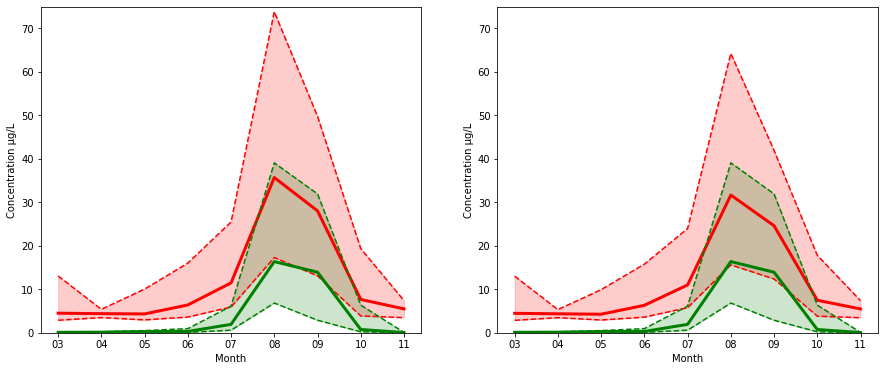

In [84]:
f, axs = plt.subplots(1,2,figsize=(15,6))
axs[0].plot(site_date_sorted_month,site_date_sorted_chlor_med, 'red', linewidth = 3)
axs[0].plot(site_date_sorted_month,site_date_sorted_chlor_25, 'r--')
axs[0].plot(site_date_sorted_month,site_date_sorted_chlor_75,'r--')
axs[0].fill_between(site_date_sorted_month,site_date_sorted_chlor_75,site_date_sorted_chlor_25,color='red', alpha=0.2)

axs[0].plot(site_date_sorted_month,site_date_sorted_phyc_med, 'green', linewidth = 3)
axs[0].plot(site_date_sorted_month,site_date_sorted_phyc_25, 'g--')
axs[0].plot(site_date_sorted_month,site_date_sorted_phyc_75,'g--')
axs[0].fill_between(site_date_sorted_month,site_date_sorted_phyc_75,site_date_sorted_phyc_25,color='green', alpha=0.2)




axs[1].plot(site_date_sorted_month,chlor_without_cyanobac_med, 'red', linewidth = 3)
axs[1].plot(site_date_sorted_month,chlor_without_cyanobac_25, 'r--')
axs[1].plot(site_date_sorted_month,chlor_without_cyanobac_75,'r--')
axs[1].fill_between(site_date_sorted_month,chlor_without_cyanobac_75,chlor_without_cyanobac_25,color='red', alpha=0.2)

axs[1].plot(site_date_sorted_month,site_date_sorted_phyc_med, 'green', linewidth = 3)
axs[1].plot(site_date_sorted_month,site_date_sorted_phyc_25, 'g--')
axs[1].plot(site_date_sorted_month,site_date_sorted_phyc_75,'g--')
axs[1].fill_between(site_date_sorted_month,site_date_sorted_phyc_75,site_date_sorted_phyc_25,color='green', alpha=0.2)

axs[0].set_ylim([0,75])
axs[1].set_ylim([0,75])

axs[0].set_xlabel('Month')
axs[1].set_xlabel('Month')
axs[0].set_ylabel('Concentration μg/L')
axs[1].set_ylabel('Concentration μg/L')
#plt.xlabel('Month')
#plt.ylabel('Concentration μg/L')
#plt.legend(('Phosphorus', 'Nitrogen', 'Chlorophyll', 'Phycocyanin'), loc = 'best')

In [85]:
site_date_sorted['PC:Chla']= site_date_sorted['Extracted Phycocyanin (mug/L)']/site_date_sorted['Extracted Chlorophyll a (mug/L)']

In [86]:
pc_chla_ratio_monthly_avg = []
pc_chla_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '03']['PC:Chla']))
pc_chla_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '04']['PC:Chla']))
pc_chla_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '05']['PC:Chla']))
pc_chla_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '06']['PC:Chla']))
pc_chla_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '07']['PC:Chla']))
pc_chla_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '08']['PC:Chla']))
pc_chla_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '09']['PC:Chla']))
pc_chla_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '10']['PC:Chla']))
pc_chla_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '11']['PC:Chla']))

In [87]:
site_date_sorted['N:P']= (site_date_sorted['Nitrogen (mug/L)'])/(site_date_sorted['Total Phosphorus (mug P/L)'])*94/62
site_date_sorted.head()

Date Site  Station Depth (m)  Sample Depth (m)  \
788 2017-03-23  WE6               2.96              0.75   
787 2017-03-23  WE2               5.18              0.75   
790 2017-03-23  WE9               2.98              0.75   
793 2017-04-25  WE6               2.97              0.75   
794 2017-04-25  WE8               4.86              0.75   

     Latitude (decimal deg)  Longitude (decimal deg)  \
788                 41.7055                 -83.3853   
787                 41.7654                 -83.3320   
790                 41.7162                 -83.4231   
793                 41.7066                 -83.3858   
794                 42.0020                 -83.3576   

     Extracted Phycocyanin (mug/L)  Extracted Chlorophyll a (mug/L)  \
788                           0.12                             4.51   
787                           0.01                             1.27   
790                           0.28                            21.64   
793                           0.34                             4.40   
794                           0.08                             6.20   

     Total Phosphorus (mug P/L)  Ammonia (mug N/L)  \
788                      168.37              95.91   
787                       56.02             138.16   
790                      142.23              91.49   
793                      325.19             277.85   
794                       89.83             328.69   

     Nitrate + Nitrite (mg N/L)  Year  DayofYear  Depth  \
788                        2.89  2017         82   3.71   
787                        1.01  2017         82   5.93   
790                        4.80  2017         82   3.73   
793                        3.99  2017        115   3.72   
794                        1.07  2017        115   5.61   

     Nitrate + Nitrite (mug N/L)  Nitrogen (mug/L) Month   PC:Chla        N:P  
788                       2890.0           2985.91    03  0.026608  26.887360  
787                       1010.0           1148.16    03  0.007874  31.073879  
790                       4800.0           4891.49    03  0.012939  52.141813  
793                       3990.0           4267.85    04  0.077273  19.897941  
794                       1070.0           1398.69    04  0.012903  23.606752

In [88]:
site_date_sorted['N:P_mass']= (site_date_sorted['Nitrogen (mug/L)'])/(site_date_sorted['Total Phosphorus (mug P/L)'])
site_date_sorted.head()

Date Site  Station Depth (m)  Sample Depth (m)  \
788 2017-03-23  WE6               2.96              0.75   
787 2017-03-23  WE2               5.18              0.75   
790 2017-03-23  WE9               2.98              0.75   
793 2017-04-25  WE6               2.97              0.75   
794 2017-04-25  WE8               4.86              0.75   

     Latitude (decimal deg)  Longitude (decimal deg)  \
788                 41.7055                 -83.3853   
787                 41.7654                 -83.3320   
790                 41.7162                 -83.4231   
793                 41.7066                 -83.3858   
794                 42.0020                 -83.3576   

     Extracted Phycocyanin (mug/L)  Extracted Chlorophyll a (mug/L)  \
788                           0.12                             4.51   
787                           0.01                             1.27   
790                           0.28                            21.64   
793                           0.34                             4.40   
794                           0.08                             6.20   

     Total Phosphorus (mug P/L)  Ammonia (mug N/L)  \
788                      168.37              95.91   
787                       56.02             138.16   
790                      142.23              91.49   
793                      325.19             277.85   
794                       89.83             328.69   

     Nitrate + Nitrite (mg N/L)  Year  DayofYear  Depth  \
788                        2.89  2017         82   3.71   
787                        1.01  2017         82   5.93   
790                        4.80  2017         82   3.73   
793                        3.99  2017        115   3.72   
794                        1.07  2017        115   5.61   

     Nitrate + Nitrite (mug N/L)  Nitrogen (mug/L) Month   PC:Chla        N:P  \
788                       2890.0           2985.91    03  0.026608  26.887360   
787                       1010.0           1148.16    03  0.007874  31.073879   
790                       4800.0           4891.49    03  0.012939  52.141813   
793                       3990.0           4267.85    04  0.077273  19.897941   
794                       1070.0           1398.69    04  0.012903  23.606752   

      N:P_mass  
788  17.734216  
787  20.495537  
790  34.391408  
793  13.124174  
794  15.570411

In [89]:
n_p_ratio_monthly_avg = []
n_p_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '03']['N:P']))
n_p_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '04']['N:P']))
n_p_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '05']['N:P']))
n_p_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '06']['N:P']))
n_p_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '07']['N:P']))
n_p_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '08']['N:P']))
n_p_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '09']['N:P']))
n_p_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '10']['N:P']))
n_p_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '11']['N:P']))

In [90]:
n_p_mass_ratio_monthly_avg = []
n_p_mass_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '03']['N:P_mass']))
n_p_mass_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '04']['N:P_mass']))
n_p_mass_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '05']['N:P_mass']))
n_p_mass_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '06']['N:P_mass']))
n_p_mass_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '07']['N:P_mass']))
n_p_mass_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '08']['N:P_mass']))
n_p_mass_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '09']['N:P_mass']))
n_p_mass_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '10']['N:P_mass']))
n_p_mass_ratio_monthly_avg.append(np.mean(site_date_sorted[site_date_sorted['Month']== '11']['N:P_mass']))

In [91]:
ratios = pd.DataFrame({'Month' : site_date_sorted_month, 'Molar N:P Ratio' : n_p_ratio_monthly_avg, 'Mass N:P Ratio' : n_p_mass_ratio_monthly_avg, 'PC: Chl a Ratio' : pc_chla_ratio_monthly_avg})    

In [92]:
ratios

Month  Molar N:P Ratio  Mass N:P Ratio  PC: Chl a Ratio
0    03        36.701017       24.207054         0.015807
1    04        31.098565       20.511820         0.030392
2    05        46.991787       30.994583         0.081912
3    06        46.642990       30.764526         0.083291
4    07        44.618819       29.429434         0.290339
5    08        15.023705        9.909252         0.853273
6    09         5.214089        3.439080         0.568227
7    10        10.206752        6.732113         0.247493
8    11         3.381040        2.230047         0.016938

Text(0, 0.5, 'N:P Molar Ratio')

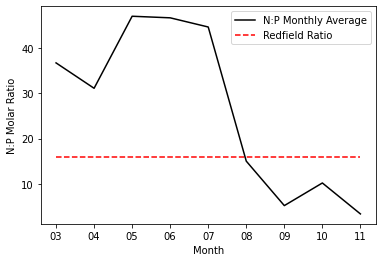

In [93]:
plt.plot(site_date_sorted_month,n_p_ratio_monthly_avg, 'black')
plt.hlines(16,0,8,color = 'red', linestyle = 'dashed')
plt.legend(['N:P Monthly Average','Redfield Ratio'], loc = 'best')
plt.xlabel('Month')
plt.ylabel('N:P Molar Ratio')

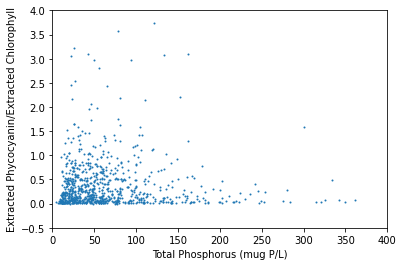

In [94]:
ratio = site_date_sorted['Extracted Phycocyanin (mug/L)']/site_date_sorted['Extracted Chlorophyll a (mug/L)']
plt.scatter(site_date_sorted['Total Phosphorus (mug P/L)'],ratio, s=1)
plt.xlim(0,400)
plt.ylim(-0.5,4)
plt.xlabel('Total Phosphorus (mug P/L)')
plt.ylabel('Extracted Phycocyanin/Extracted Chlorophyll')
plt.savefig("ratio_compare", bbox_inches='tight', dpi=300)

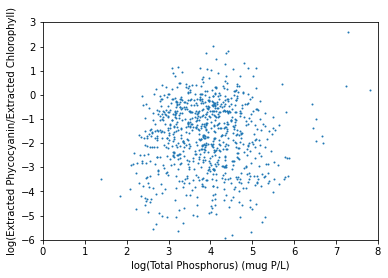

In [95]:
ratio = np.log(site_date_sorted['Extracted Phycocyanin (mug/L)']/site_date_sorted['Extracted Chlorophyll a (mug/L)'])
plt.scatter(np.log(site_date_sorted['Total Phosphorus (mug P/L)']),ratio, s=1)
plt.xlim(0,8)
plt.ylim(-6,3)
plt.xlabel('log(Total Phosphorus) (mug P/L)')
plt.ylabel('log(Extracted Phycocyanin/Extracted Chlorophyll)')
plt.savefig("ratio_compare_log", bbox_inches='tight', dpi=300)

Text(0, 0.5, 'log(Extracted Phycocyanin) (mug/L)')

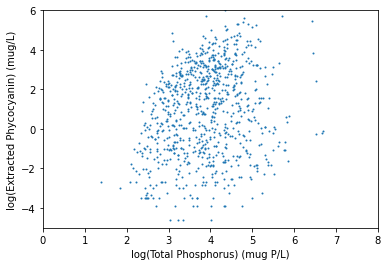

In [96]:
plt.scatter(np.log(site_date_sorted['Total Phosphorus (mug P/L)']),np.log(site_date_sorted['Extracted Phycocyanin (mug/L)']), s=1)
plt.xlim(0,8)
plt.ylim(-5,6)
plt.xlabel('log(Total Phosphorus) (mug P/L)')
plt.ylabel('log(Extracted Phycocyanin) (mug/L)')

Text(0, 0.5, 'log(Extracted /Chlorophyll a) (mug/L)')

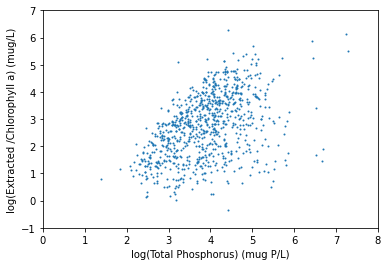

In [97]:
plt.scatter(np.log(site_date_sorted['Total Phosphorus (mug P/L)']),np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)']), s=1)
plt.xlim(0,8)
plt.ylim(-1,7)
plt.xlabel('log(Total Phosphorus) (mug P/L)')
plt.ylabel('log(Extracted /Chlorophyll a) (mug/L)')

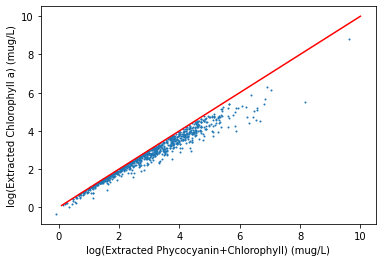

In [98]:
plt.scatter(np.log(site_date_sorted['Extracted Phycocyanin (mug/L)']+site_date_sorted['Extracted Chlorophyll a (mug/L)']),np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)']), s=1)
x = np.logspace(-1,1)
plt.plot(x,x, color = 'red')
plt.xlabel('log(Extracted Phycocyanin+Chlorophyll) (mug/L)')
plt.ylabel('log(Extracted Chlorophyll a) (mug/L)')
plt.savefig("compare_pigment_log", bbox_inches='tight', dpi=300)

/usr/local/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'log(Extracted Chlorophyll a) (mug/L)')

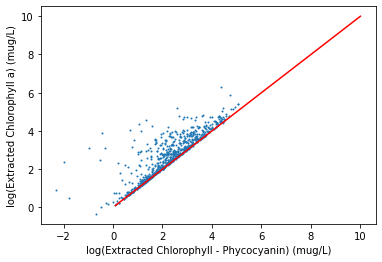

In [99]:
plt.scatter(np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)']-site_date_sorted['Extracted Phycocyanin (mug/L)']),np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)']), s=1)
x = np.logspace(-1,1)
plt.plot(x,x, color = 'red')
plt.xlabel('log(Extracted Chlorophyll - Phycocyanin) (mug/L)')
plt.ylabel('log(Extracted Chlorophyll a) (mug/L)')
#plt.savefig("compare_pigment_log", bbox_inches='tight', dpi=300)

R-squared: 0.7055603594228197
intercept: [2.31396944]
slope: [[0.43343776]]
Covariance Matrix: [[11.49107255 11.13655838]
 [11.13655838 10.93345549]]
Variance: 11.491072552772831
Covariance: 11.136558383936467
Mean:  1.032396664660931 
Standard deviation:  2.3296916827001235
Correlation Coefficient: 3.976440044559847


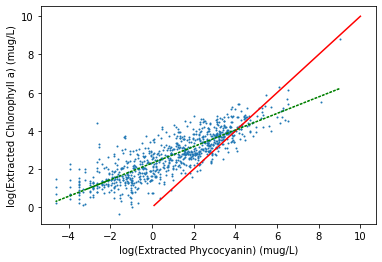

In [100]:
plt.scatter(np.log(site_date_sorted['Extracted Phycocyanin (mug/L)']),np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)']), s=1)
x = np.logspace(-1,1)
plt.plot(x,x, color = 'red')
plt.xlabel('log(Extracted Phycocyanin) (mug/L)')
plt.ylabel('log(Extracted Chlorophyll a) (mug/L)')

X = np.log(site_date_sorted['Extracted Phycocyanin (mug/L)'])
X = X.values.reshape(-1, 1)
y = np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)'])
y = y.values.reshape(-1, 1)



linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions
plt.plot(X, Y_pred, ':g')
r_sq = linear_regressor.score(X, y)

print('R-squared:', r_sq)
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)
print('Covariance Matrix:', np.log(np.cov(site_date_sorted['Extracted Phycocyanin (mug/L)'],site_date_sorted['Extracted Chlorophyll a (mug/L)'])))
print('Variance:', np.log(np.cov(site_date_sorted['Extracted Phycocyanin (mug/L)'],site_date_sorted['Extracted Chlorophyll a (mug/L)']))[0,0])
print('Covariance:', np.log(np.cov(site_date_sorted['Extracted Phycocyanin (mug/L)'],site_date_sorted['Extracted Chlorophyll a (mug/L)']))[0,1])
print('Mean: ',np.mean(X),'\nStandard deviation: ',np.std(X))
print('Correlation Coefficient:', np.log(np.cov(site_date_sorted['Extracted Phycocyanin (mug/L)'],site_date_sorted['Extracted Chlorophyll a (mug/L)']))[0,1]/((np.std(X)*np.std(y))))

R-squared: 0.7055603594228197
intercept: [-3.46275629]
slope: [[1.62782392]]
Covariance Matrix: [[10.93345549 11.13655838]
 [11.13655838 11.49107255]]
Variance: 10.933455486743094
Covariance: 11.136558383936467
Mean:  2.761449137414212 
Standard deviation:  1.2021484763579988
Correlation Coefficient: 3.976440044559847


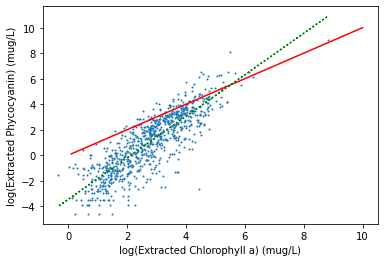

In [101]:
plt.scatter(np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)']),np.log(site_date_sorted['Extracted Phycocyanin (mug/L)']), s=1)
x = np.logspace(-1,1)
plt.plot(x,x, color = 'red')
plt.ylabel('log(Extracted Phycocyanin) (mug/L)')
plt.xlabel('log(Extracted Chlorophyll a) (mug/L)')

X = np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)'])
X = X.values.reshape(-1, 1)
y = np.log(site_date_sorted['Extracted Phycocyanin (mug/L)'])
y = y.values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions
plt.plot(X, Y_pred, ':g')
r_sq = linear_regressor.score(X, y)

print('R-squared:', r_sq)
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)
print('Covariance Matrix:', np.log(np.cov(site_date_sorted['Extracted Chlorophyll a (mug/L)'],site_date_sorted['Extracted Phycocyanin (mug/L)'])))
print('Variance:', np.log(np.cov(site_date_sorted['Extracted Chlorophyll a (mug/L)'],site_date_sorted['Extracted Phycocyanin (mug/L)']))[0,0])
print('Covariance:', np.log(np.cov(site_date_sorted['Extracted Chlorophyll a (mug/L)'],site_date_sorted['Extracted Phycocyanin (mug/L)']))[0,1])
print('Mean: ',np.mean(X),'\nStandard deviation: ',np.std(X))
print('Correlation Coefficient:', np.log(np.cov(site_date_sorted['Extracted Chlorophyll a (mug/L)'],site_date_sorted['Extracted Phycocyanin (mug/L)']))[0,1]/((np.std(X)*np.std(y))))


R-squared: 0.2166627439365132
intercept: [0.18472881]
slope: [[0.66189149]]
Covariance Matrix: [[ 9.753529    9.96065778]
 [ 9.96065778 10.93345549]]
Variance: 9.753528995700602
Covariance: 9.960657777425187
Mean:  3.892964893300354 
Standard deviation:  0.8454023159092187
Correlation Coefficient: 9.800911679266257


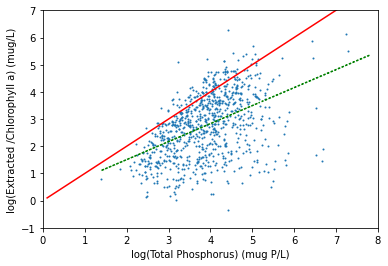

In [102]:
plt.scatter(np.log(site_date_sorted['Total Phosphorus (mug P/L)']),np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)']), s=1)
plt.xlim(0,8)
plt.ylim(-1,7)

x = np.logspace(-1,1)
plt.plot(x,x, color = 'red')
plt.xlabel('log(Total Phosphorus) (mug P/L)')
plt.ylabel('log(Extracted /Chlorophyll a) (mug/L)')

X = np.log(site_date_sorted['Total Phosphorus (mug P/L)'])
X = X.values.reshape(-1, 1)
y = np.log(site_date_sorted['Extracted Chlorophyll a (mug/L)'])
y = y.values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions
plt.plot(X, Y_pred, ':g')
r_sq = linear_regressor.score(X, y)

print('R-squared:', r_sq)
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)
print('Covariance Matrix:', np.log(np.cov(site_date_sorted['Total Phosphorus (mug P/L)'],site_date_sorted['Extracted Chlorophyll a (mug/L)'])))
print('Variance:', np.log(np.cov(site_date_sorted['Total Phosphorus (mug P/L)'],site_date_sorted['Extracted Chlorophyll a (mug/L)']))[0,0])
print('Covariance:', np.log(np.cov(site_date_sorted['Total Phosphorus (mug P/L)'],site_date_sorted['Extracted Chlorophyll a (mug/L)']))[0,1])
print('Mean: ',np.mean(X),'\nStandard deviation: ',np.std(X))
print('Correlation Coefficient:', np.log(np.cov(site_date_sorted['Total Phosphorus (mug P/L)'],site_date_sorted['Extracted Chlorophyll a (mug/L)']))[0,1]/((np.std(X)*np.std(y))))


R-squared: 0.06929228802184129
intercept: [-1.79155952]
slope: [[0.72539986]]
Covariance Matrix: [[ 9.753529   10.32215758]
 [10.32215758 11.49107255]]
Variance: 9.753528995700602
Covariance: 10.322157580279363
Mean:  3.892964893300354 
Standard deviation:  0.8454023159092187
Correlation Coefficient: 5.240932935894985


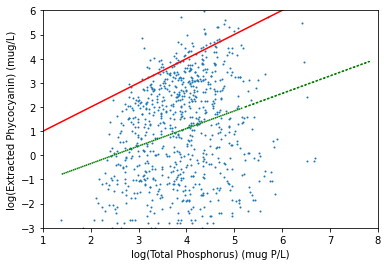

In [103]:
plt.scatter(np.log(site_date_sorted['Total Phosphorus (mug P/L)']),np.log(site_date_sorted['Extracted Phycocyanin (mug/L)']), s=1)
plt.xlim(1,8)
plt.ylim(-3,6)

x = np.logspace(-1,1)
plt.plot(x,x, color = 'red')
plt.xlabel('log(Total Phosphorus) (mug P/L)')
plt.ylabel('log(Extracted Phycocyanin) (mug/L)')

X = np.log(site_date_sorted['Total Phosphorus (mug P/L)'])
X = X.values.reshape(-1, 1)
y = np.log(site_date_sorted['Extracted Phycocyanin (mug/L)'])
y = y.values.reshape(-1, 1)

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,y) # perform linear regression
Y_pred = linear_regressor.predict(X) # make predictions
plt.plot(X, Y_pred, ':g')
r_sq = linear_regressor.score(X, y)

print('R-squared:', r_sq)
print('intercept:', linear_regressor.intercept_)
print('slope:', linear_regressor.coef_)
print('Covariance Matrix:', np.log(np.cov(site_date_sorted['Total Phosphorus (mug P/L)'],site_date_sorted['Extracted Phycocyanin (mug/L)'])))
print('Variance:', np.log(np.cov(site_date_sorted['Total Phosphorus (mug P/L)'],site_date_sorted['Extracted Phycocyanin (mug/L)']))[0,0])
print('Covariance:', np.log(np.cov(site_date_sorted['Total Phosphorus (mug P/L)'],site_date_sorted['Extracted Phycocyanin (mug/L)']))[0,1])
print('Mean: ',np.mean(X),'\nStandard deviation: ',np.std(X))
print('Correlation Coefficient:', np.log(np.cov(site_date_sorted['Total Phosphorus (mug P/L)'],site_date_sorted['Extracted Phycocyanin (mug/L)']))[0,1]/((np.std(X)*np.std(y))))


In [104]:
#plt.contourf(site_date_sorted['Nitrogen (mug/L)'],site_date_sorted['Total Phosphorus (mug P/L)'],site_date_sorted['Extracted Chlorophyll a (mug/L)'],cmap = 'plasma')
#plt.contourf(nitrogen,phosphorus,phycocyanin,cmap = 'plasma')